## Clustering:

### Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.
The following three features are commonly used in digital marketing:
CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 
CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 
CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset. 
The Data Dictionary and the detailed description of the formulas for CPM, CPC and CTR are given in the sheet 2 of the Clustering Clean ads_data Excel File. 

Perform the following in given order:

Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.
Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Solution FileView in a new window to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing. 
 Check if there are any outliers.
 Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).
Perform z-score scaling and discuss how it affects the speed of the algorithm.
Perform clustering and do the following:
Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.
Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.
Print silhouette scores for up to 10 clusters and identify optimum number of clusters.
Profile the ads based on optimum number of clusters using silhouette score and your domain understanding
[Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.]
Conclude the project by providing summary of your learnings.

In [61]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score, silhouette_samples

import warnings
warnings.filterwarnings("ignore")

In [193]:
data_df = pd.read_excel("Clustering+Clean+Ads_Data.xlsx")

In [194]:
data_df

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0       2020-9-2-17       Format1          300        250    75000  Inter222   
1       2020-9-2-10       Format1          300        250    75000  Inter227   
2       2020-9-1-22       Format1          300        250    75000  Inter222   
3       2020-9-3-20       Format1          300        250    75000  Inter228   
4       2020-9-4-15       Format1          300        250    75000  Inter217   
...             ...           ...          ...        ...      ...       ...   
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0        Video     Desktop  Display                   1806              325   
1          App      Mobile    Video                   1780              285   
2        Video     Desktop  Display                   2727              356   
3        Video      Mobile    Video                   2430              497   
4          Web     Desktop    Video                   1218              242   
...        ...         ...      ...                    ...              ...   
23061      Web      Mobile    Video                      1                1   
23062      Web     Desktop    Video                      3                2   
23063      App      Mobile    Video                      2                1   
23064    Video      Mobile    Video                      7                1   
23065      App      Mobile    Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0              323       1   0.00  0.35   0.0000  0.0031  0.0  0.0  
1              285       1   0.00  0.35   0.0000  0.0035  0.0  0.0  
2              355       1   0.00  0.35   0.0000  0.0028  0.0  0.0  
3              495       1   0.00  0.35   0.0000  0.0020  0.0  0.0  
4              242       1   0.00  0.35   0.0000  0.0041  0.0  0.0  
...            ...     ...    ...   ...      ...     ...  ...  ...  
23061            1       1   0.07  0.35   0.0455     NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260     NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325     NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455     NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585     NaN  NaN  NaN  

[23066 rows x 19 columns]

## Part 1: Clustering: Define the problem and perform Exploratory Data Analysis
## Part 1: Clustering: Data Preprocessing

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

### There are 23066 entries out of which there are few missing values for CPM, CTR and CPC

In [7]:
data_df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [8]:
data_df.tail()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
23061   2020-9-13-7       Format5          720        300   216000  Inter220   
23062   2020-11-2-7       Format5          720        300   216000  Inter224   
23063  2020-9-14-22       Format5          720        300   216000  Inter218   
23064  2020-11-18-2       Format4          120        600    72000  inter230   
23065   2020-9-14-0       Format5          720        300   216000  Inter221   

      Platform Device Type Format  Available_Impressions  Matched_Queries  \
23061      Web      Mobile  Video                      1                1   
23062      Web     Desktop  Video                      3                2   
23063      App      Mobile  Video                      2                1   
23064    Video      Mobile  Video                      7                1   
23065      App      Mobile  Video                      2                2   

       Impressions  Clicks  Spend   Fee  Revenue  CTR  CPM  CPC  
23061            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23062            2       1   0.04  0.35   0.0260  NaN  NaN  NaN  
23063            1       1   0.05  0.35   0.0325  NaN  NaN  NaN  
23064            1       1   0.07  0.35   0.0455  NaN  NaN  NaN  
23065            2       1   0.09  0.35   0.0585  NaN  NaN  NaN

In [5]:
data_df.shape

(23066, 19)

In [195]:
data_df.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    18330.0  7.366054e-02  7.515992e-02      0.0001   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.0000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.0000   

                                25%           50%           75%          max  
Ad - Length              120.000000     300.00000  7.200000e+02       728.00  
Ad- Width                250.000000     300.00000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.00000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.00000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.50000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.00000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.00000  1.279375e+04    143049.00  
Spend                     85.180000    1425.12500  3.121400e+03     26931.87  
Fee                        0.330000       0.35000  3.500000e-01         0.35  
Revenue                   55.365375     926.33500  2.091338e+03     21276.18  
CTR                        0.002600       0.08255  1.300000e-01         1.00  
CPM                        1.710000       7.66000  1.251000e+01        81.56  
CPC                        0.090000       0.16000  5.700000e-01         7.26

In [9]:
data_df.duplicated().sum()

0

In [10]:
data_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

## Treat the missing values in CTR, CPM, CPC

In [11]:
def calculate_CPM(x):
    TotalCampaignSpend = data_df.Spend
    NumberofImpressions = data_df.Impressions
    CPM = (TotalCampaignSpend/NumberofImpressions) * 1000
    return CPM

In [12]:
def calculate_CPC(x):
    TotalCost = data_df.Spend
    NumberofClicks = data_df.Clicks
    CPC = TotalCost/NumberofClicks
    return CPC

In [13]:
def calculate_CTR(x):
    TotalMeasuredClicks = data_df.Clicks
    TotalMeasuredAdImpressions = data_df.Impressions
    CTR = (TotalMeasuredClicks/TotalMeasuredAdImpressions) * 100
    return CTR

In [14]:
data_df['CPM']= data_df[['CPM']].apply(lambda x: calculate_CPM(x))

In [15]:
data_df['CPC']= data_df[['CPC']].apply(lambda x: calculate_CPC(x))

In [16]:
data_df['CTR']= data_df[['CTR']].apply(lambda x: calculate_CTR(x))

In [17]:
data_df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [21]:
data_df_num = data_df.select_dtypes(['int64', 'float64'])
data_df_cat = data_df.select_dtypes(['object'])

## Univariant Analysis

Ad- Width


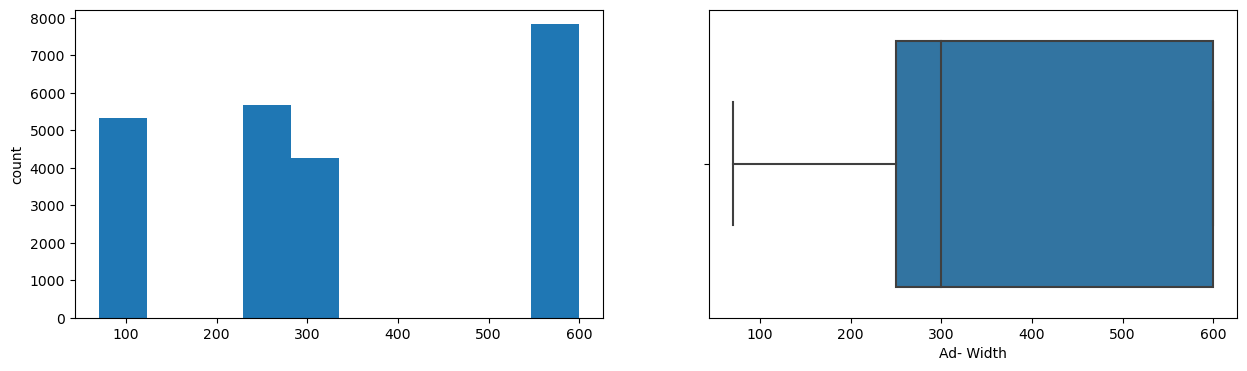

Ad Size


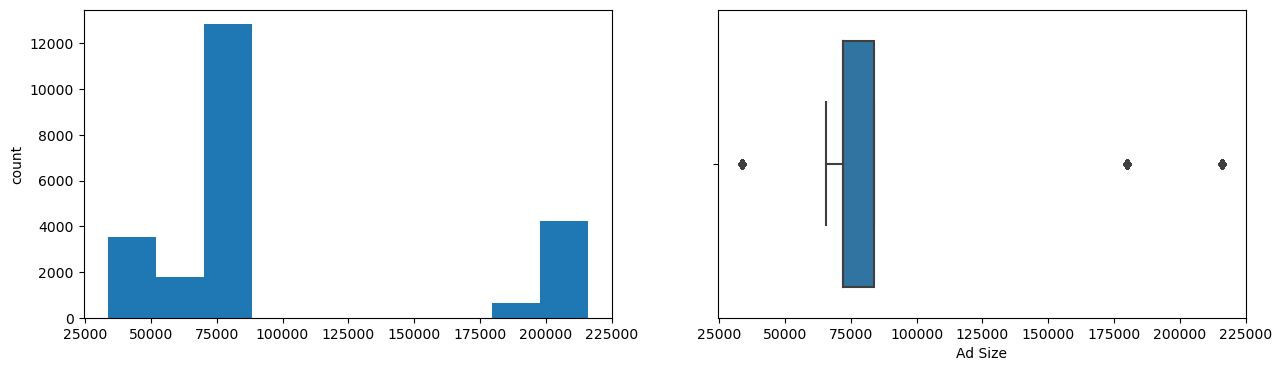

Available_Impressions


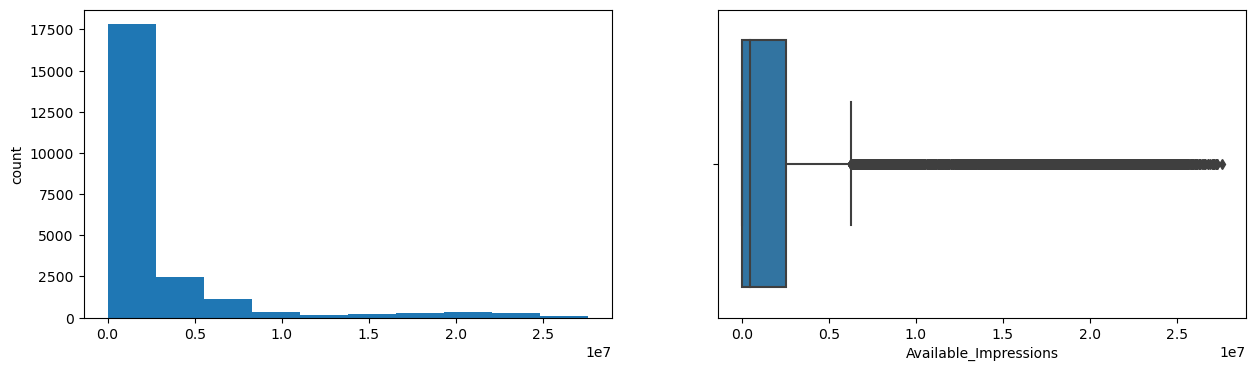

Matched_Queries


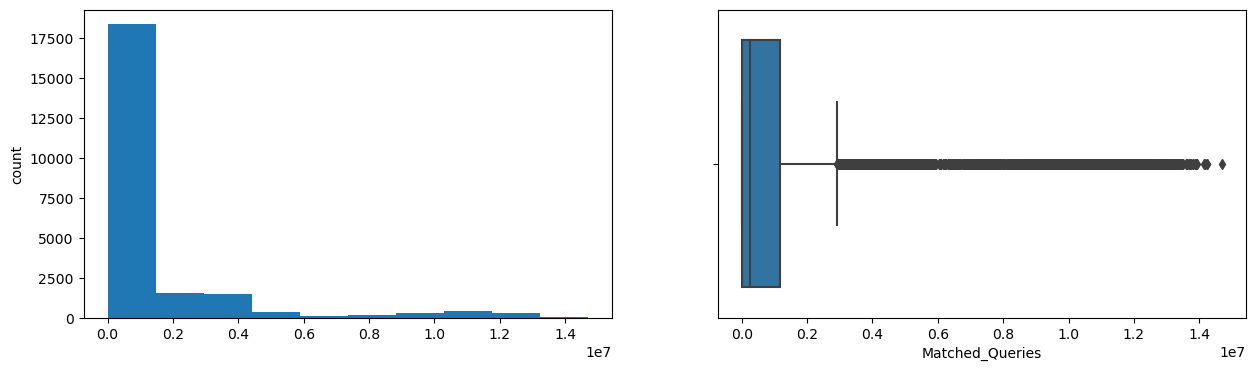

Impressions


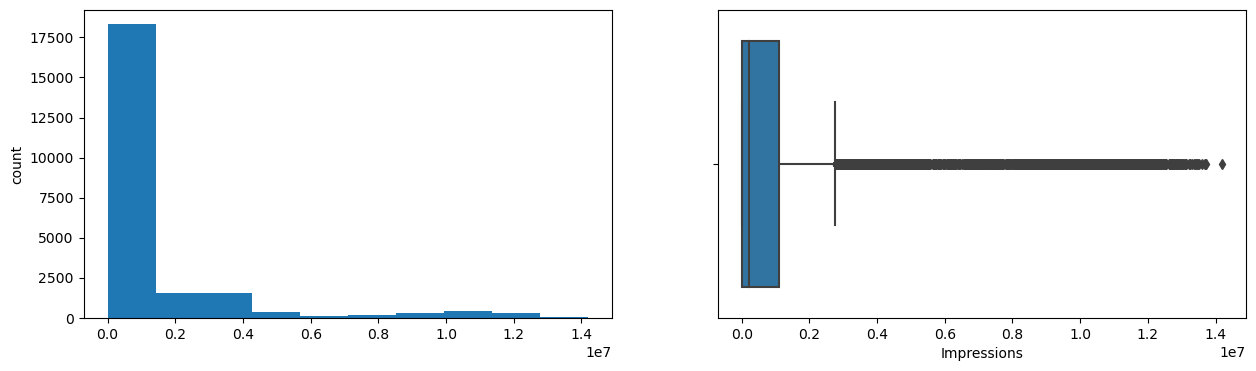

Clicks


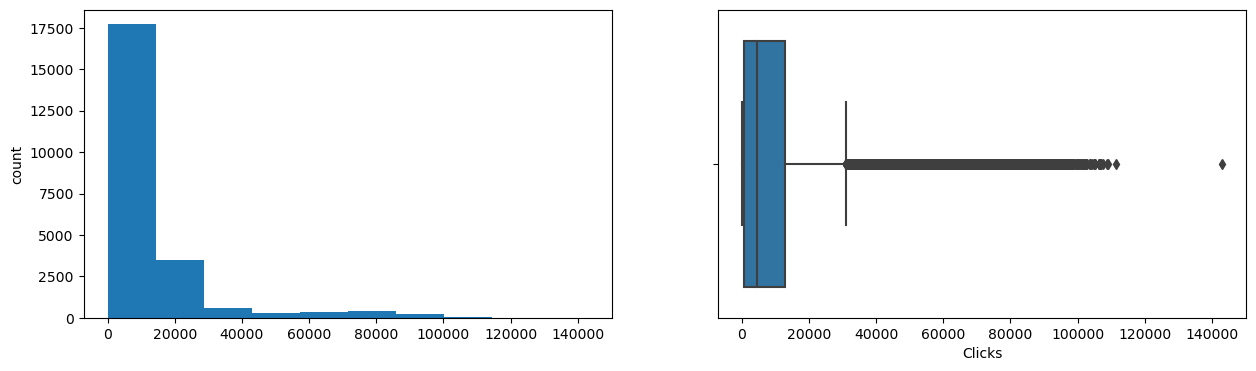

Spend


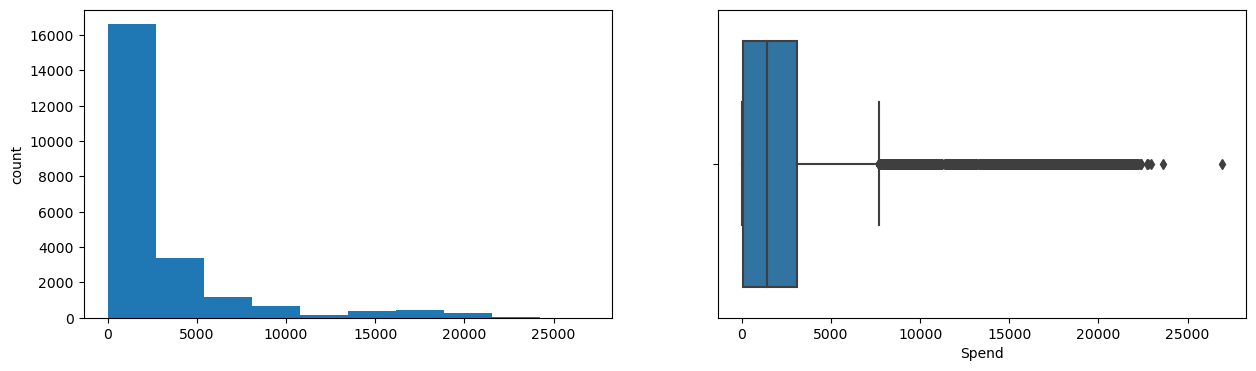

Fee


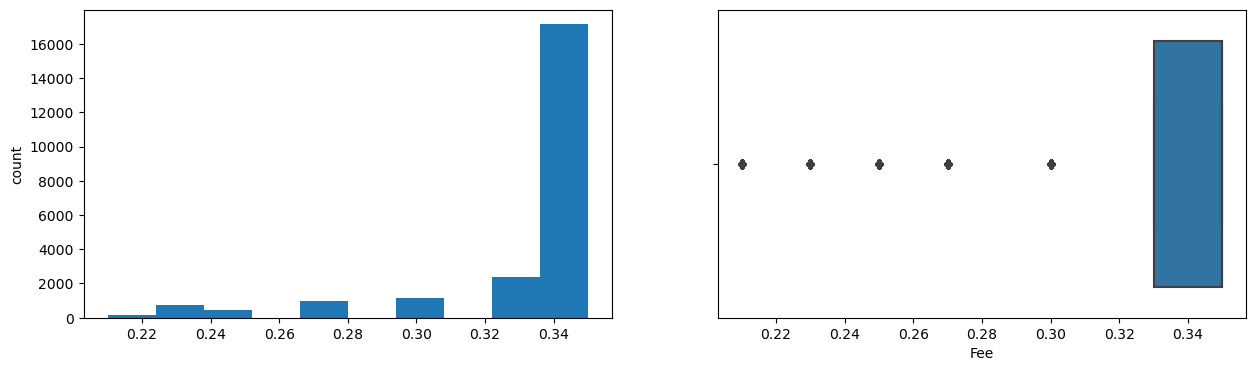

Revenue


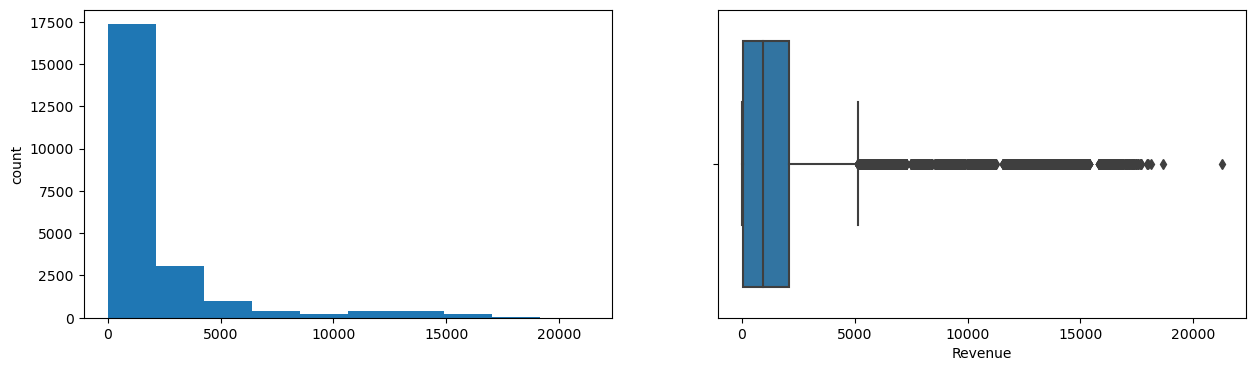

CTR


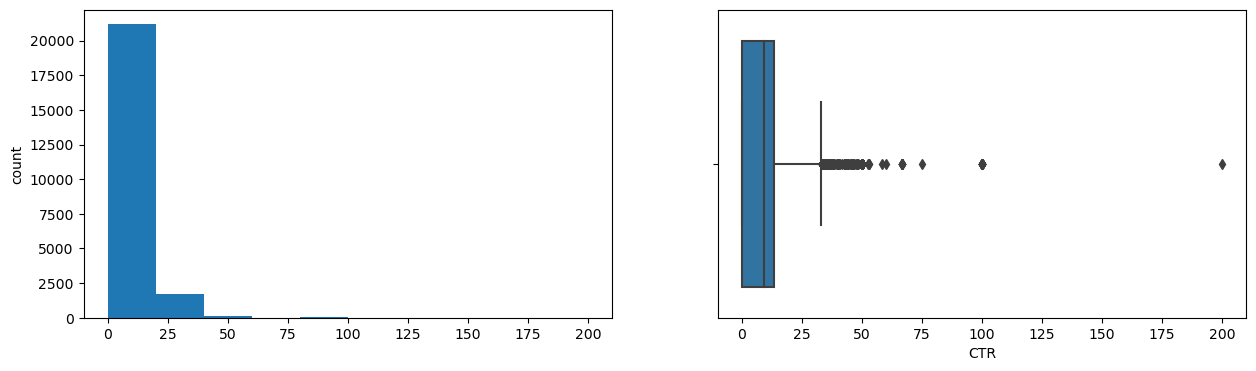

CPM


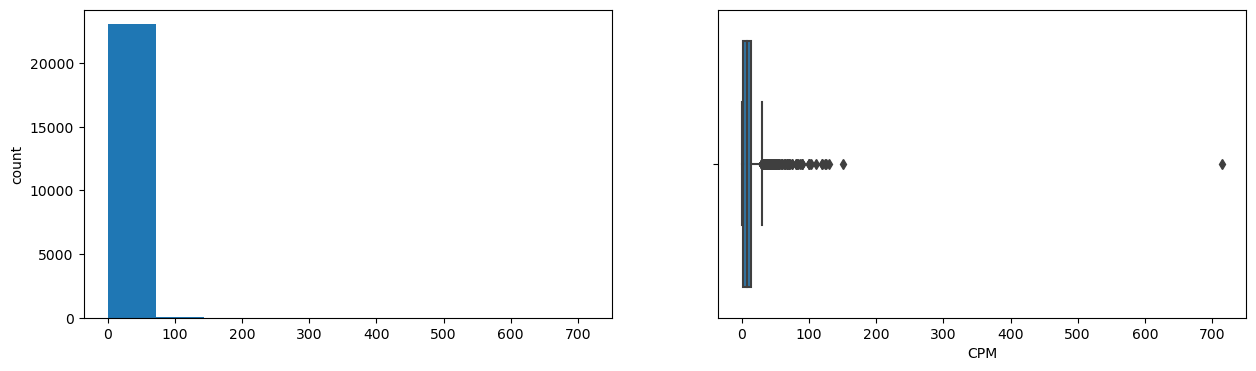

CPC


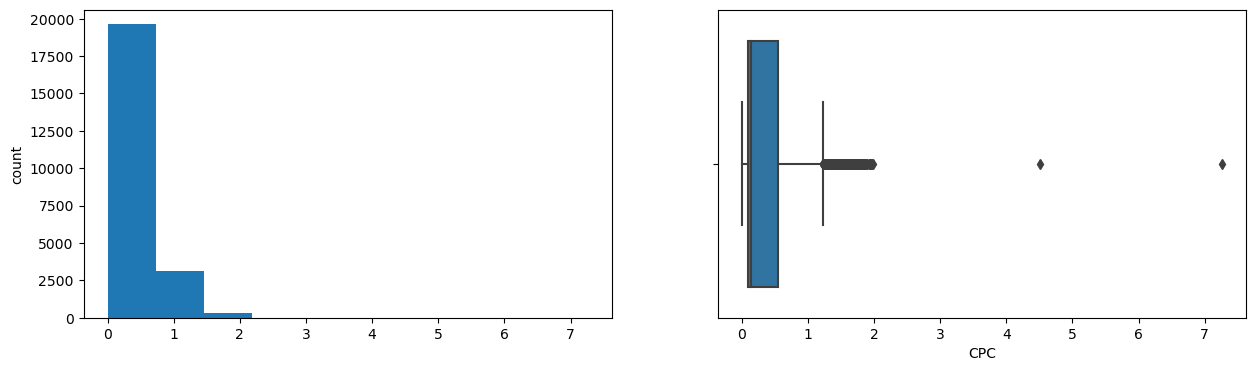

In [29]:
for col in data_df_num.columns[1:]:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.hist(x=data_df_num[col], bins=10)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data_df_num[col])
    plt.show()

### Observations:
    1)Ad-width is left skewed with no outliers. Rest all the columns have outliers.

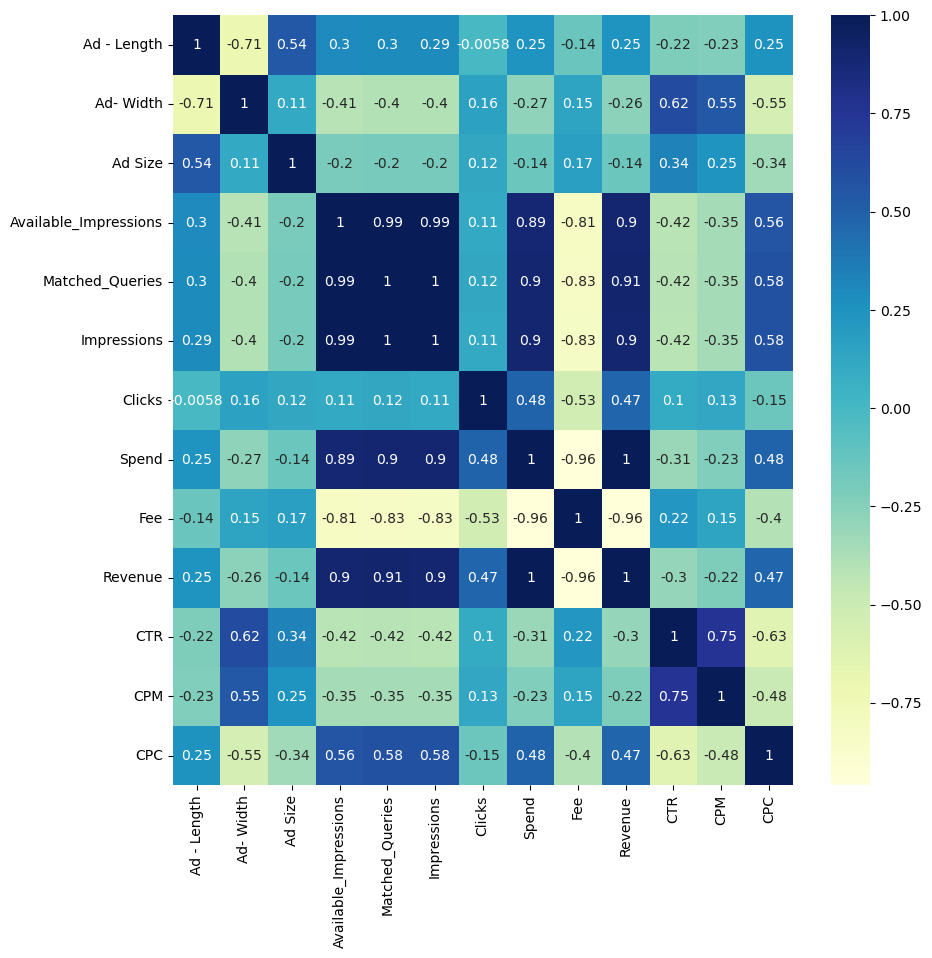

In [31]:
plt.figure(figsize  = (10,10))
sns.heatmap(data_df_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Outlier treatment

In [66]:
#Boxplot technique to treat outliers
def remove_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lower range -780.0 and upper range 1620.0


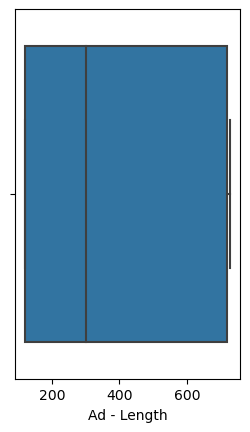

lower range -275.0 and upper range 1125.0


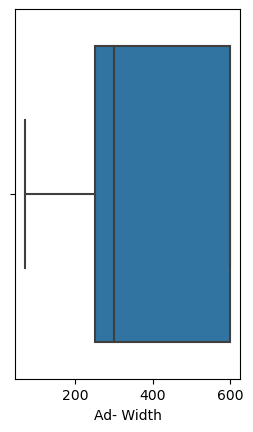

lower range 54000.0 and upper range 102000.0


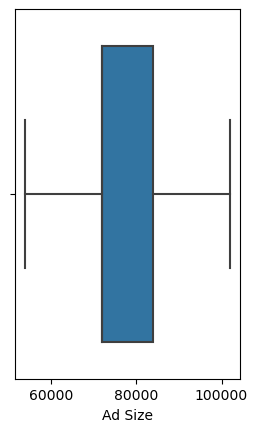

lower range -3707387.0 and upper range 6268771.0


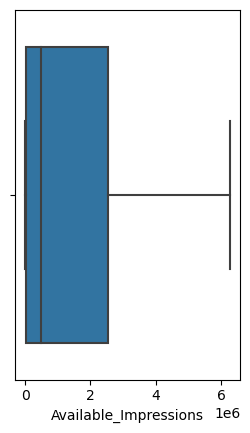

lower range -1725343.75 and upper range 2924326.25


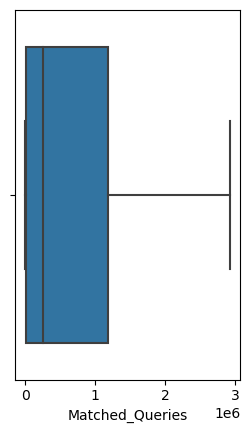

lower range -1648666.5 and upper range 2769085.5


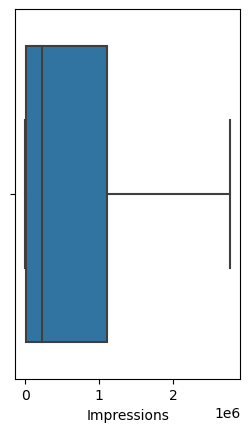

lower range -17415.625 and upper range 30919.375


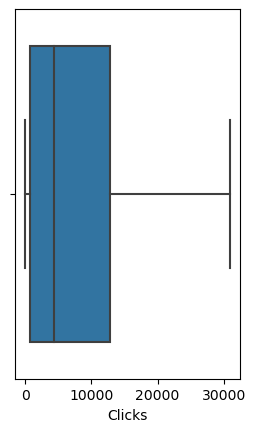

lower range -4469.15 and upper range 7675.73


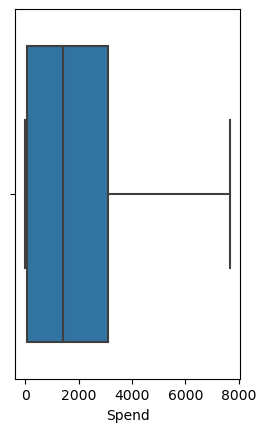

lower range 0.30000000000000004 and upper range 0.3799999999999999


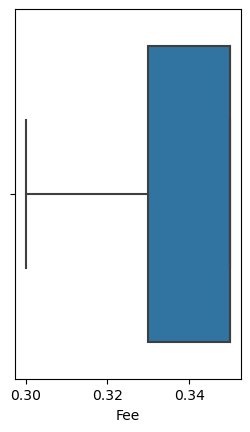

lower range -2998.5937874999995 and upper range 5145.297312499999


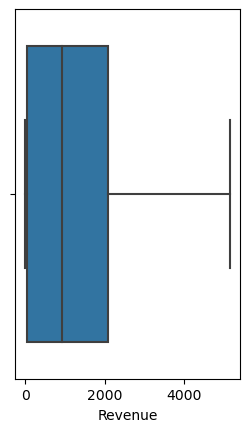

lower range -19.543087778859437 and upper range 33.27876617457427


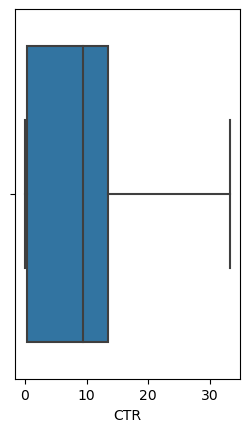

lower range -15.19031633320633 and upper range 29.981418178163874


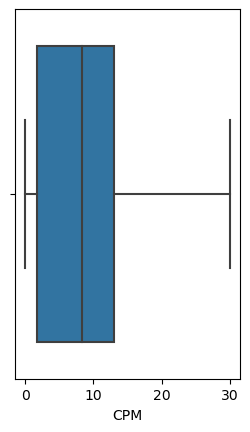

lower range -0.5950238218287072 and upper range 1.2310015773280991


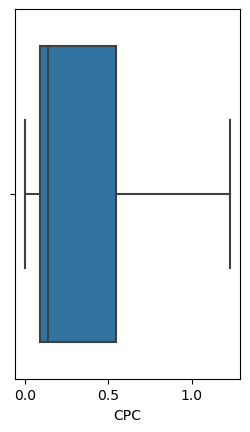

In [78]:
for col in data_df_num[1:]:
    #data_df_num['col_1'] = data_df_num[col]
    lr, ur = remove_outliers(data_df_num[col])
    print("lower range",lr, "and upper range", ur)
    data_df_num[col] = np.where(data_df_num[col]> ur,ur,data_df_num[col])
    data_df_num[col] = np.where(data_df_num[col]<lr,lr,data_df_num[col])
    plt.subplot(1,2,1)
    sns.boxplot(x=data_df_num[col])
    plt.show()

In [79]:
data_df_num

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0            300.0      250.0   75000.0                 1806.0   
1            300.0      250.0   75000.0                 1780.0   
2            300.0      250.0   75000.0                 2727.0   
3            300.0      250.0   75000.0                 2430.0   
4            300.0      250.0   75000.0                 1218.0   
...            ...        ...       ...                    ...   
23061        720.0      300.0  102000.0                    1.0   
23062        720.0      300.0  102000.0                    3.0   
23063        720.0      300.0  102000.0                    2.0   
23064        120.0      600.0   72000.0                    7.0   
23065        720.0      300.0  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue        CTR  \
0                325.0        323.0     1.0   0.00  0.35   0.0000   0.309598   
1                285.0        285.0     1.0   0.00  0.35   0.0000   0.350877   
2                356.0        355.0     1.0   0.00  0.35   0.0000   0.281690   
3                497.0        495.0     1.0   0.00  0.35   0.0000   0.202020   
4                242.0        242.0     1.0   0.00  0.35   0.0000   0.413223   
...                ...          ...     ...    ...   ...      ...        ...   
23061              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  33.278766   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  33.278766   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  33.278766   

             CPM   CPC  
0       0.000000  0.00  
1       0.000000  0.00  
2       0.000000  0.00  
3       0.000000  0.00  
4       0.000000  0.00  
...          ...   ...  
23061  29.981418  0.07  
23062  20.000000  0.04  
23063  29.981418  0.05  
23064  29.981418  0.07  
23065  29.981418  0.09  

[23066 rows x 13 columns]

## Univariant analysis for Categorical variable  

Timestamp


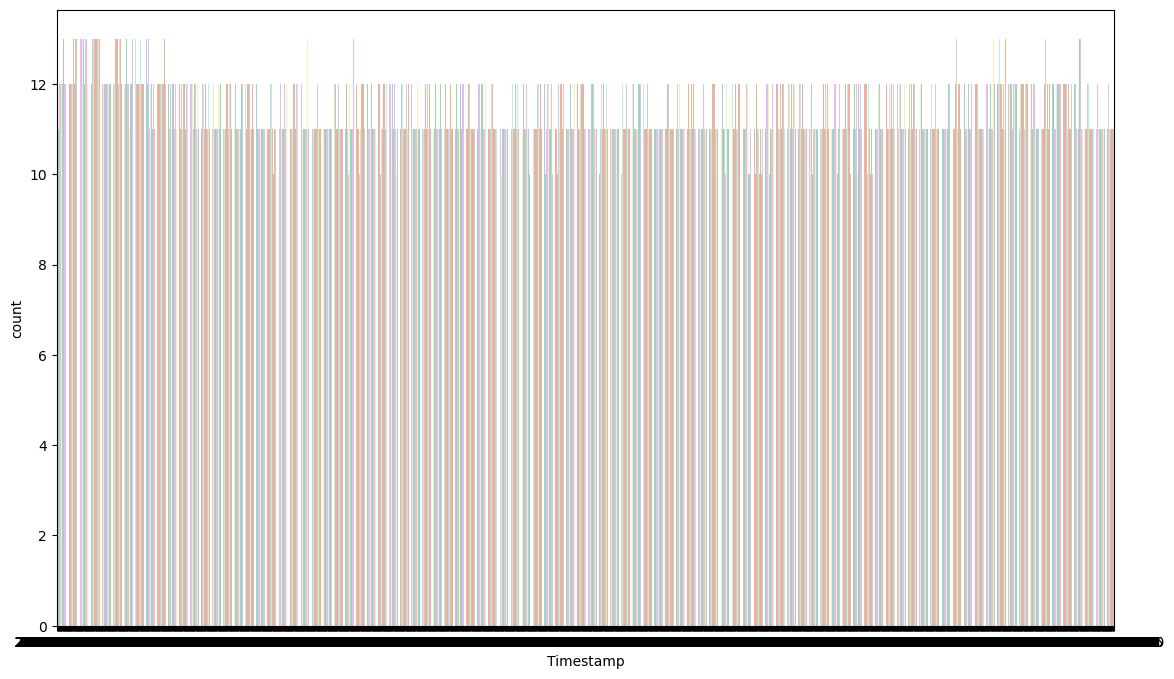

InventoryType


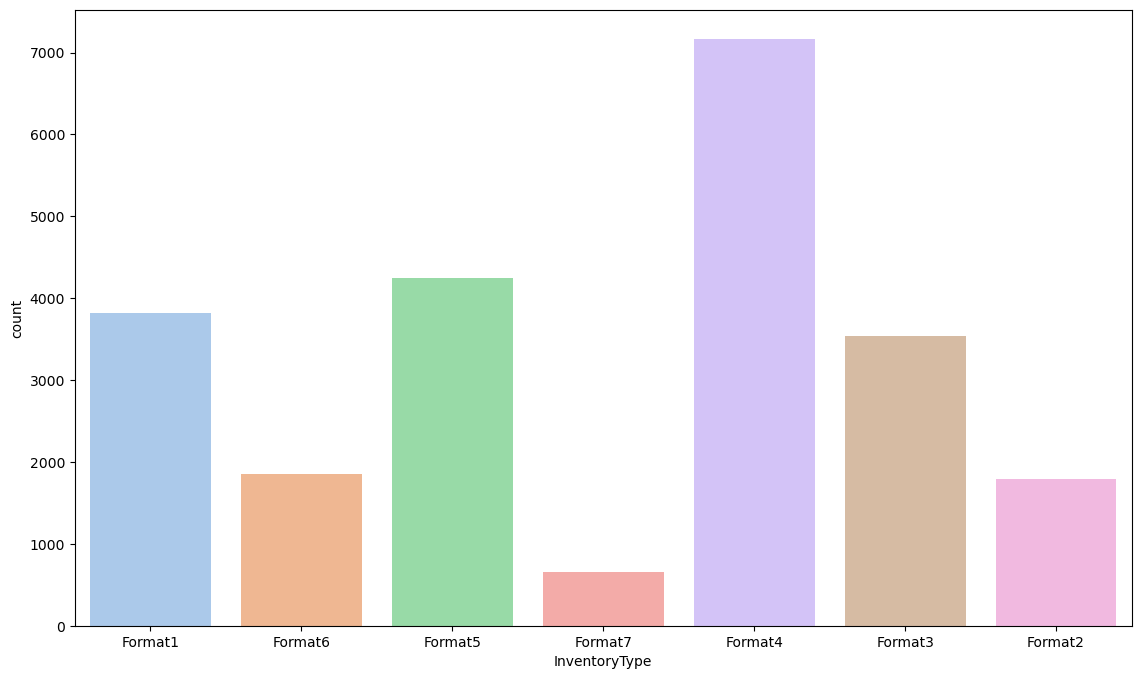

Ad Type


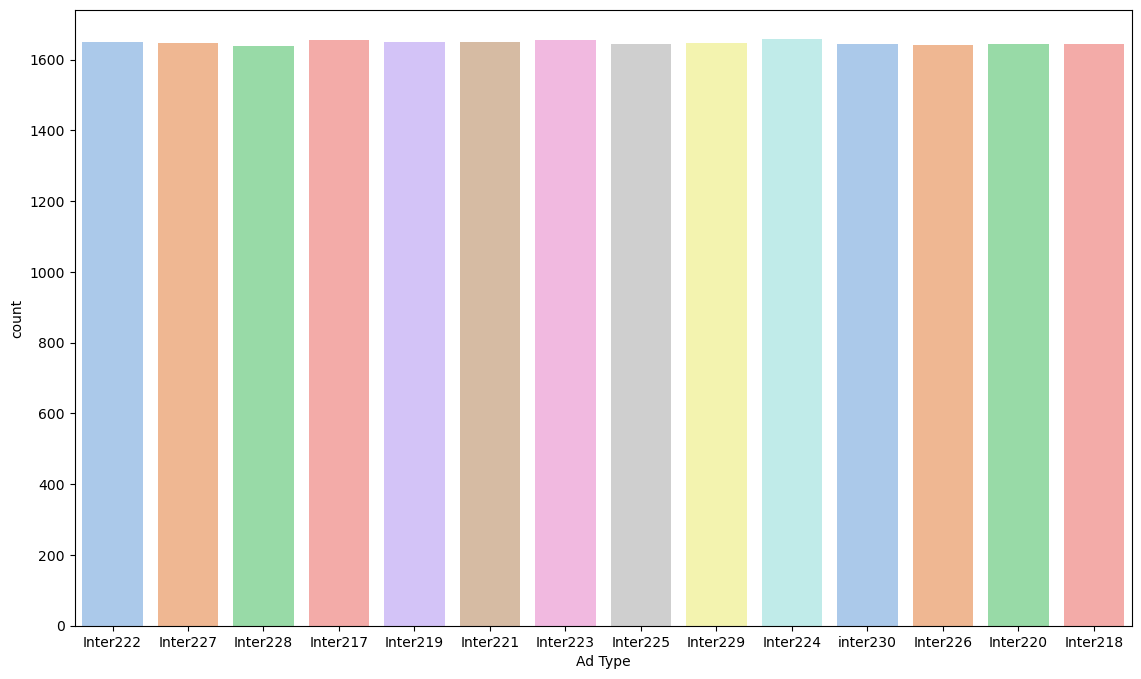

Platform


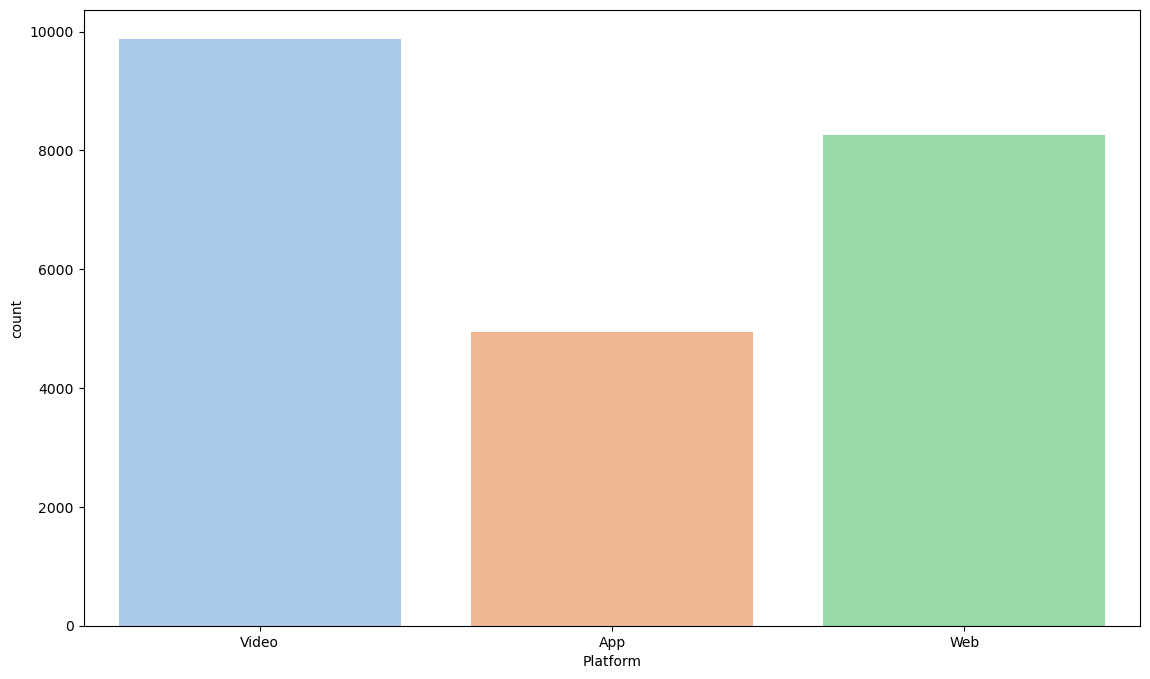

Device Type


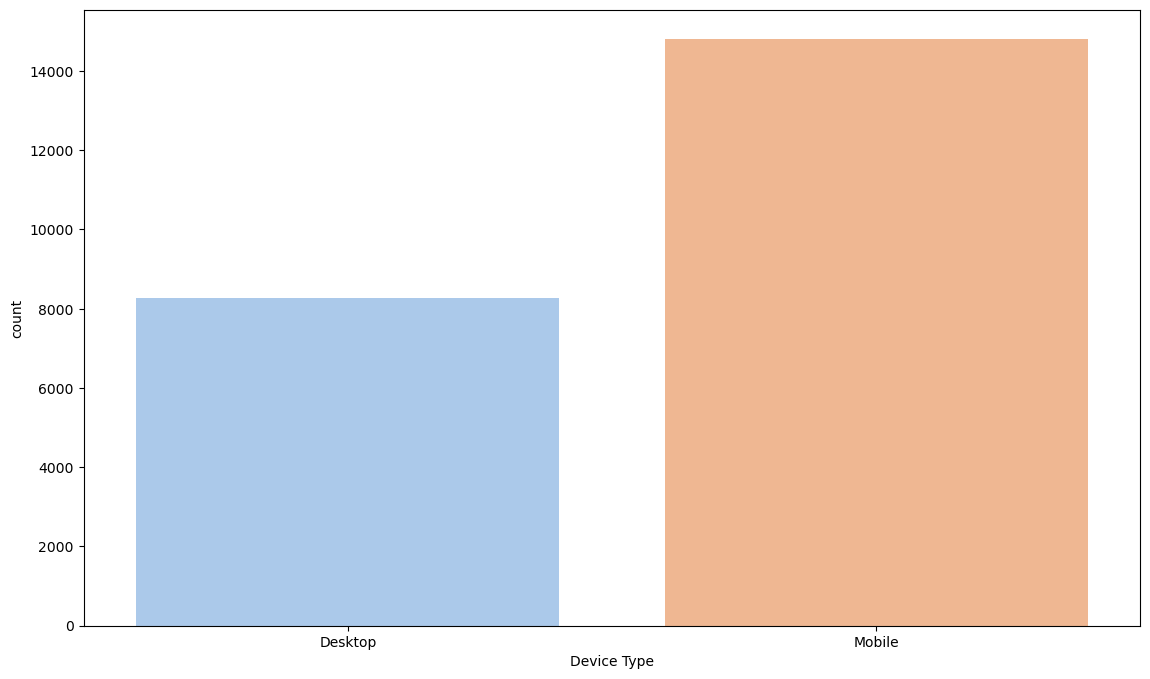

Format


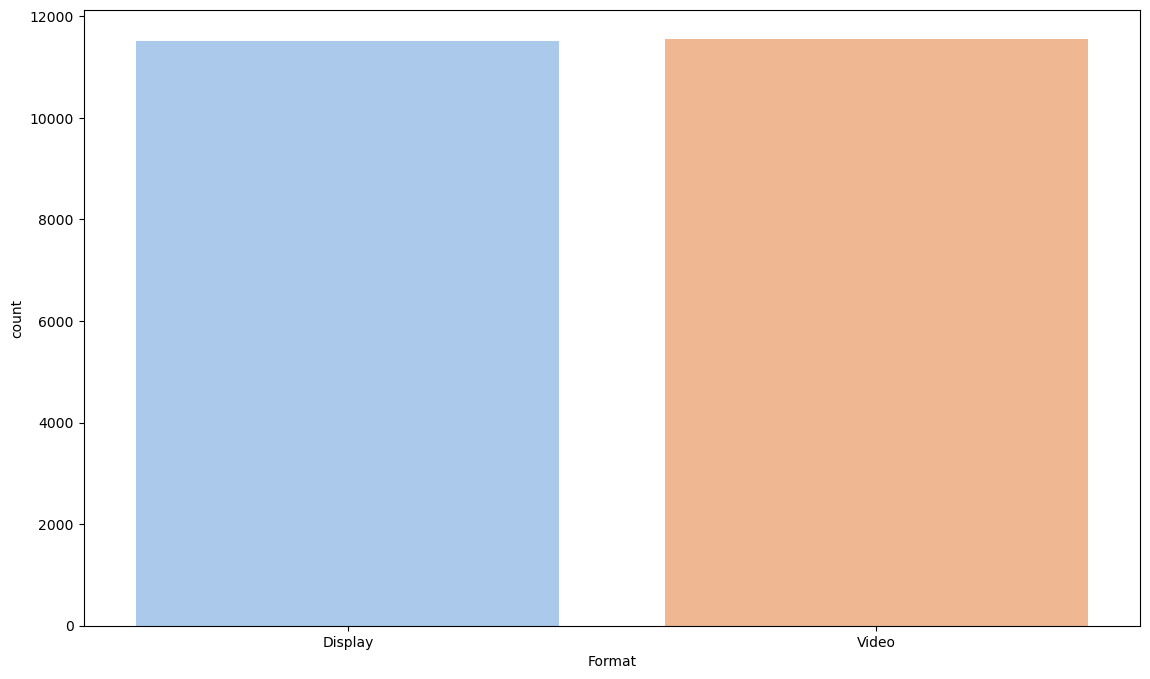

In [44]:
for col in data_df_cat[1:]:
    print(col)
    plt.figure(figsize=(30,8))
    plt.subplot(1,2,1)
    sns.countplot(x=data_df_cat[col],  palette='pastel')
    plt.show()

## Bivariant analysis

<Axes: xlabel='CTR', ylabel='CPM'>

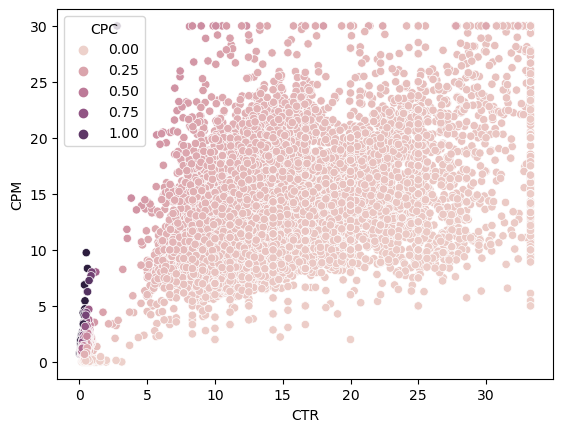

In [159]:
# numeric vs numeric
sns.scatterplot(data=data_df_num, x='CTR', y='CPM', hue='CPC')

<Axes: xlabel='Ad - Length', ylabel='Ad- Width'>

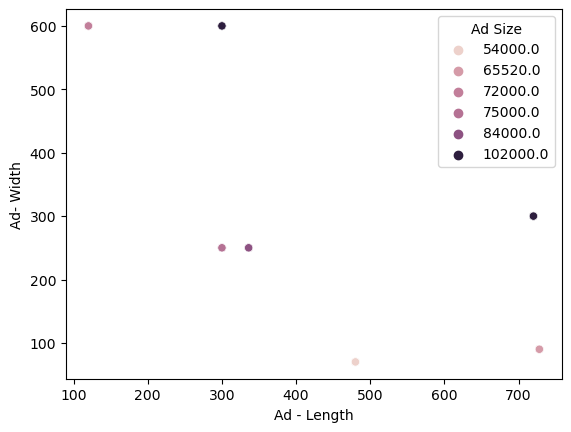

In [160]:
sns.scatterplot(data=data_df_num, x='Ad - Length', y='Ad- Width', hue='Ad Size')

<Axes: xlabel='CTR', ylabel='Timestamp'>

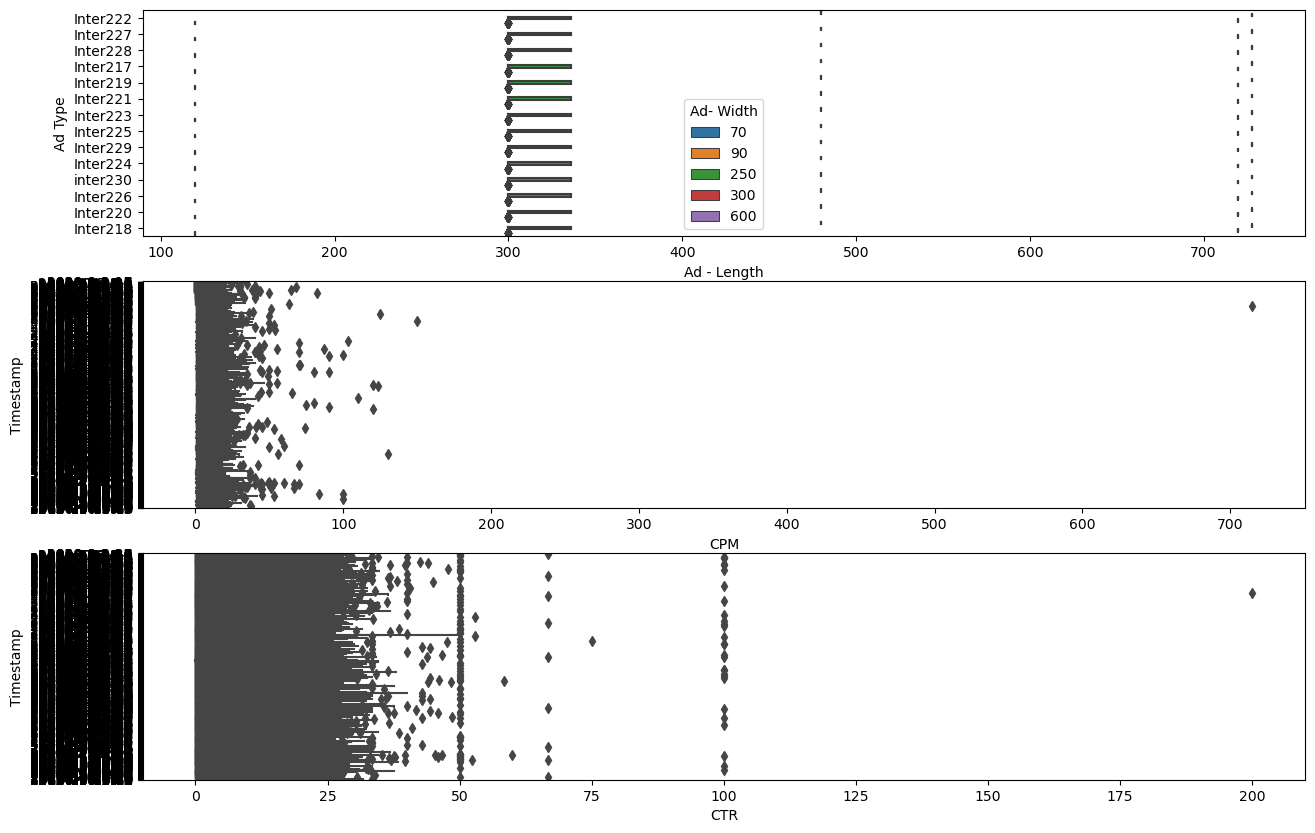

In [161]:
# categorical vs numerical
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_size_inches(15,10)
sns.boxplot(data=data_df, x='Ad - Length', y='Ad Type', ax=axes[0], hue='Ad- Width')
sns.boxplot(data=data_df, x='CPM', y='Timestamp', ax=axes[1])
sns.boxplot(data=data_df, x='CTR', y='Timestamp', ax=axes[2])

<Axes: >

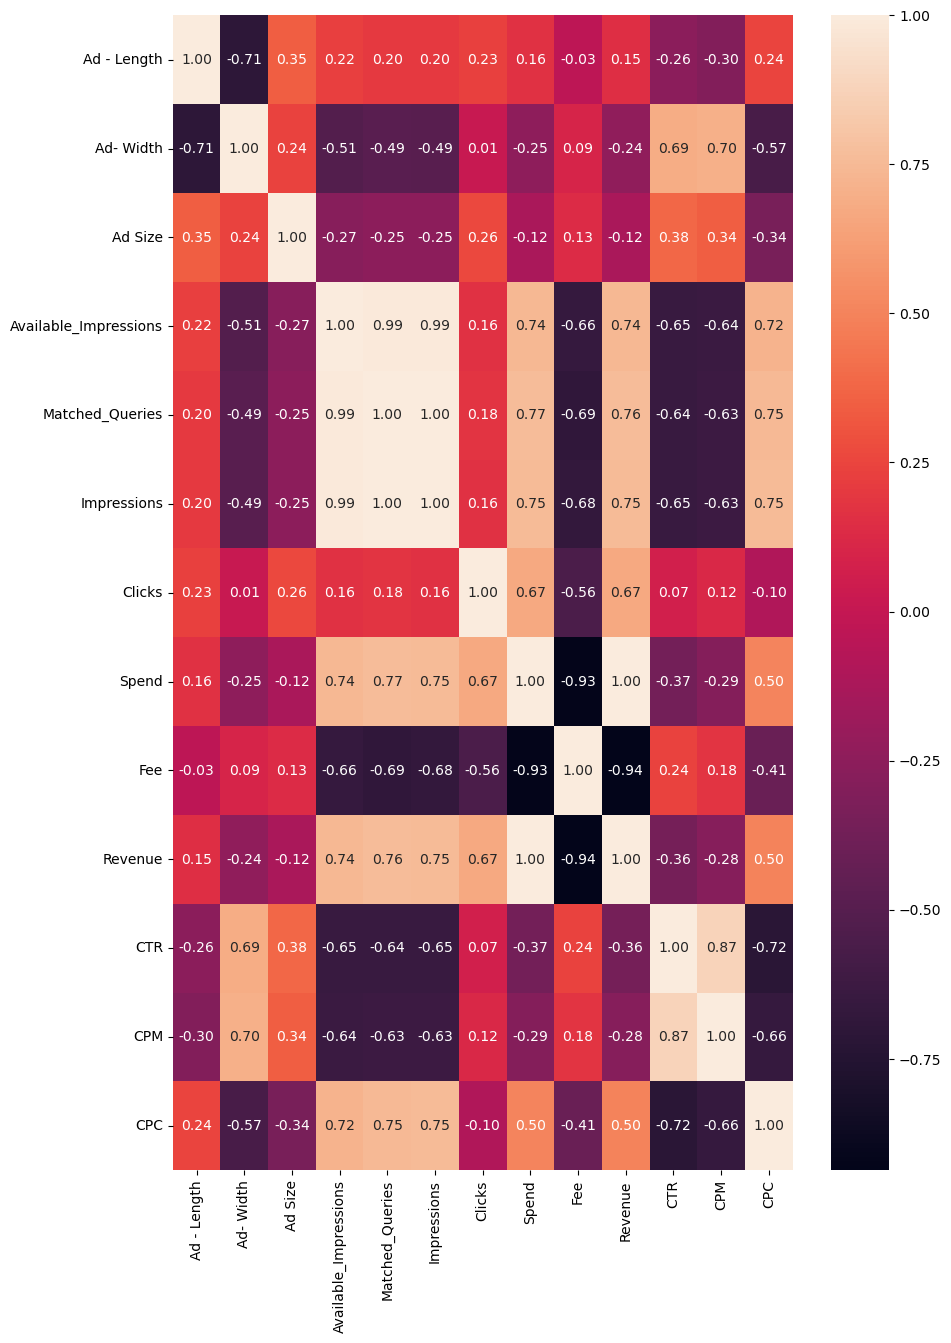

In [162]:
# relation between all numeric variables
plt.figure(figsize=(10,15))
sns.heatmap(data_df_num.corr(), annot=True, fmt='.2f')

## Scaling the data
Clustering algorithms are distance based algorithms and all distance based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering algorithms.

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
X = StandardScaler()
scaled_df = X.fit_transform(data_df_num)
scaled_df

array([[-0.3644957 , -0.43279676, -0.10251846, ..., -0.95883633,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.95383476,
        -1.19449791, -1.04256138],
       [-0.3644957 , -0.43279676, -0.10251846, ..., -0.96221767,
        -1.19449791, -1.04256138],
       ...,
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.88461411],
       [-1.13489073,  1.29058999, -0.29756446, ...,  3.03580766,
         3.16271759, -0.82143521],
       [ 1.43309269, -0.18659865,  1.65289551, ...,  3.03580766,
         3.16271759, -0.7582563 ]])

## Creating the Dendrogram

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [94]:
data_df_num.iloc[:,0:13].describe() 

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   76576.835169           1.607253e+06   
std      233.651434    203.092885   15381.320695           2.125528e+06   
min      120.000000     70.000000   54000.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  102000.000000           6.268771e+06   

       Matched_Queries   Impressions        Clicks         Spend  \
count     2.306600e+04  2.306600e+04  23066.000000  23066.000000   
mean      7.995380e+05  7.536120e+05   8306.828194   2166.060098   
std       1.026037e+06  9.802568e+05   9574.779384   2425.189632   
min       1.000000e+00  1.000000e+00      1.000000      0.000000   
25%       1.828250e+04  7.990500e+03    710.000000     85.180000   
50%       2.580875e+05  2.252900e+05   4425.000000   1425.125000   
75%       1.180700e+06  1.112428e+06  12793.750000   3121.400000   
max       2.924326e+06  2.769086e+06  30919.375000   7675.730000   

                Fee       Revenue           CTR           CPM           CPC  
count  23066.000000  23066.000000  23066.000000  23066.000000  23066.000000  
mean       0.340288   1449.388572      8.223203      8.219181      0.330035  
std        0.018129   1646.893583      8.253522      6.881016      0.316568  
min        0.300000      0.000000      0.010874      0.000000      0.000000  
25%        0.330000     55.365375      0.265107      1.749084      0.089736  
50%        0.350000    926.335000      9.391248      8.371566      0.139347  
75%        0.350000   2091.338150     13.470571     13.042018      0.546242  
max        0.350000   5145.297312     33.278766     29.981418      1.231002

In [95]:
data = data_df_num.iloc[:,0:13]
data

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0            300.0      250.0   75000.0                 1806.0   
1            300.0      250.0   75000.0                 1780.0   
2            300.0      250.0   75000.0                 2727.0   
3            300.0      250.0   75000.0                 2430.0   
4            300.0      250.0   75000.0                 1218.0   
...            ...        ...       ...                    ...   
23061        720.0      300.0  102000.0                    1.0   
23062        720.0      300.0  102000.0                    3.0   
23063        720.0      300.0  102000.0                    2.0   
23064        120.0      600.0   72000.0                    7.0   
23065        720.0      300.0  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue        CTR  \
0                325.0        323.0     1.0   0.00  0.35   0.0000   0.309598   
1                285.0        285.0     1.0   0.00  0.35   0.0000   0.350877   
2                356.0        355.0     1.0   0.00  0.35   0.0000   0.281690   
3                497.0        495.0     1.0   0.00  0.35   0.0000   0.202020   
4                242.0        242.0     1.0   0.00  0.35   0.0000   0.413223   
...                ...          ...     ...    ...   ...      ...        ...   
23061              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  33.278766   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  33.278766   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  33.278766   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  33.278766   

             CPM   CPC  
0       0.000000  0.00  
1       0.000000  0.00  
2       0.000000  0.00  
3       0.000000  0.00  
4       0.000000  0.00  
...          ...   ...  
23061  29.981418  0.07  
23062  20.000000  0.04  
23063  29.981418  0.05  
23064  29.981418  0.07  
23065  29.981418  0.09  

[23066 rows x 13 columns]

In [98]:
link_method_ward = linkage(data, method = 'ward')
link_method_ward

array([[2.28670000e+04, 2.29750000e+04, 0.00000000e+00, 2.00000000e+00],
       [2.28520000e+04, 2.29050000e+04, 0.00000000e+00, 2.00000000e+00],
       [2.14630000e+04, 2.29200000e+04, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.61210000e+04, 4.61250000e+04, 7.09637905e+07, 1.52390000e+04],
       [4.61270000e+04, 4.61280000e+04, 2.14507104e+08, 1.92090000e+04],
       [4.61260000e+04, 4.61290000e+04, 4.87757727e+08, 2.30660000e+04]])

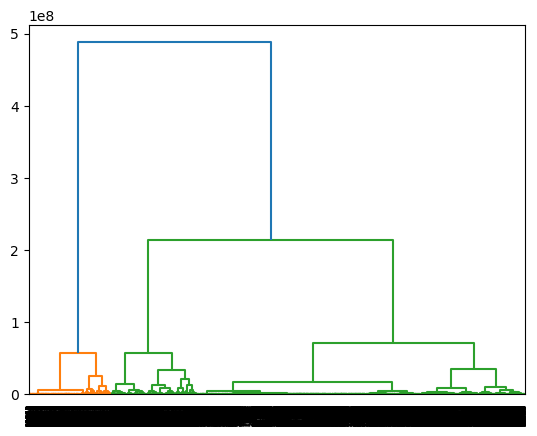

In [99]:
dend = dendrogram(link_method_ward)

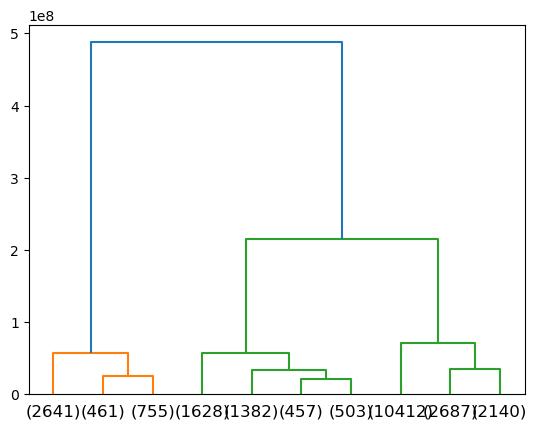

In [100]:
dend = dendrogram(link_method_ward,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [101]:
#Method 1
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(link_method_ward, 3, criterion='maxclust')
clusters

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

## Using euclidean and ward linakage type

In [102]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(data)
print(Cluster_agglo)

[0 0 0 ... 0 0 0]


## K Means Clustering

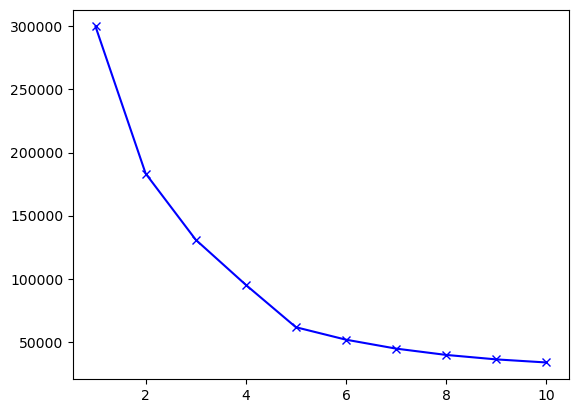

The Wss are:
 [299857.99999999866, 183349.10438404675, 130878.35241963489, 95133.94481349873, 61539.18919785395, 51676.89681600456, 44598.25849746805, 39597.85254186449, 36061.73695967227, 33618.94855158539]


In [82]:
from sklearn.cluster import KMeans 

Wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i)
    k_means.fit(scaled_df)
    Wss.append(k_means.inertia_)
## Plot for visualization:
plt.plot(range(1,11),Wss,'bx-')
plt.show()
print('The Wss are:\n',Wss)


## Observations:

We can see from the plot that there is a consistent dip from 2 to5 and there doesn't seem to be a clear 'elbow' here. We may chose any from 2 to 8 as our # of clusters.
So, let's look at another method. Create a plot with Silhouette scores to see how it varies with k.

In [83]:
for i in range(2,11):
    k_means = KMeans(n_clusters=i, max_iter=50)
    k_means.fit(scaled_df)
    cluster_labels=k_means.labels_
    sil = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, sil)) 

For n_clusters=2, the silhouette score is 0.38572769619101077
For n_clusters=3, the silhouette score is 0.3825476915535516
For n_clusters=4, the silhouette score is 0.44534519247649795
For n_clusters=5, the silhouette score is 0.5240956940501831
For n_clusters=6, the silhouette score is 0.5221533662938636
For n_clusters=7, the silhouette score is 0.5165635029478517
For n_clusters=8, the silhouette score is 0.4797334335943954
For n_clusters=9, the silhouette score is 0.4368348177394158
For n_clusters=10, the silhouette score is 0.43681584961874476


In [87]:
k_means = KMeans(n_clusters=5)
k_means.fit(scaled_df)
print('inertia',k_means.inertia_)
labels = k_means.labels_
print('lables',labels)

inertia 61539.18919785395
lables [2 2 2 ... 0 3 0]


In [89]:
data_df["Clus_kmeans5"] = labels
data_df.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  Clus_kmeans5  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0             2  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0             2  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0             2  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0             2  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0             2

# CLUSTER PROFILING

In [92]:
data_df.Clus_kmeans5.value_counts().sort_index()

0    4676
1    4054
2    6275
3    6524
4    1537
Name: Clus_kmeans5, dtype: int64

In [91]:
clust_profile=data_df.groupby('Clus_kmeans5').mean()
clust_profile['freq']=data_df.Clus_kmeans5.value_counts().sort_index()
clust_profile

Ad - Length   Ad- Width        Ad Size  Available_Impressions  \
Clus_kmeans5                                                                  
0              683.825492  303.785287  206160.821215           2.513465e+05   
1              465.781944  199.148989   75176.566354           1.038821e+07   
2              421.696255  152.001594   55008.841434           1.810314e+06   
3              143.280809  572.103004   76597.026364           3.209356e+04   
4              141.454782  572.446324   75614.834092           8.063284e+05   

              Matched_Queries   Impressions        Clicks        Spend  \
Clus_kmeans5                                                             
0                1.375509e+05  1.167714e+05  14406.540205  1252.285569   
1                5.625808e+06  5.447310e+06  11245.754810  8646.647997   
2                8.642623e+05  8.262209e+05   3263.131952  1500.090563   
3                1.962406e+04  1.349204e+04   1914.448804   209.162609   
4                5.668641e+05  4.781485e+05  65315.176318  6990.360898   

                   Fee      Revenue        CTR        CPM       CPC  freq  
Clus_kmeans5                                                               
0             0.349538   815.541831  13.857220  12.098200  0.090012  4676  
1             0.290439  6373.659814   0.217242   1.573280  0.760929  4054  
2             0.349264   977.424163   0.404392   1.788731  0.544614  6275  
3             0.349988   135.993379  16.037897  14.693481  0.102794  6524  
4             0.288302  5017.538285  13.752664  15.385753  0.111918  1537

In [93]:
silhouette_samples(scaled_df,labels).min()

-0.03709167751991964

## Cluster Observation

### Cluster 0 - Medium size cluster with highest Ad-length and width. Total Campaign Spend is on medium side. The impressions are pretty low side. The CPM came with medium range with 12.09. The cost per click is very low. The Ads have reached with good amount of people.

### Cluster 1 - Medium size cluster the spend to advertise their company is on the higher side. The revenue generated by the digital marketing is highest with 6373.6598. The Impression made by the advertisements is 2nd highest in the dataset. The CPC is 0.76 is on medium scale. CPM is very low the Ads need to get more money for thousand impressions.

### Cluster 2 - It is 2nd largest cluster with max impressions made, it will generate a low revenue when compared to the amount of spend on advertising. It has reached max people but still the revenue is low. Hence, we could improve on the Ad's targeted audience. The CPC is again on low side. The CPM is 14.69 is good. The CTR is again on low side. The Ads need more views and clicks with more display of Ads in appropriate places.

### Cluster 3 - It’s the largest cluster with least spent on advertising. Have reached good amount of people. But the revenue generates is very low it’s the least in the dataset. So should improve on the spend to quality of advertising and the company. The CPM is in good state. The Ads to be displayed should suit the age group to generate the max revenue

### Cluster 4 – It’s the smallest cluster. The Ad is shown and clicked by pretty good number. It has reached good amount of people. The CPC is 0.11 which is good for a small cluster size. The Revenue generated is 2nd highest 5017.53, The spend on the Ad is again 2nd highest in dataset. The CPM is also good for a small cluster. The CPM is highest. The Ads have reached 13.75.


# PCA
### PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [104]:
df = pd.read_excel("PCA+India+Data_Census.xlsx")

In [105]:
df

State Code  Dist.Code                     State                Area Name  \
0             1          1           Jammu & Kashmir                  Kupwara   
1             1          2           Jammu & Kashmir                   Badgam   
2             1          3           Jammu & Kashmir              Leh(Ladakh)   
3             1          4           Jammu & Kashmir                   Kargil   
4             1          5           Jammu & Kashmir                    Punch   
..          ...        ...                       ...                      ...   
635          34        636                Puducherry                     Mahe   
636          34        637                Puducherry                 Karaikal   
637          35        638  Andaman & Nicobar Island                 Nicobars   
638          35        639  Andaman & Nicobar Island  North  & Middle Andaman   
639          35        640  Andaman & Nicobar Island            South Andaman   

     No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0     7707  23388  29796  5862  6196     3  ...           1150            749   
1     6218  19585  23102  4482  3733     7  ...            525            715   
2     4452   6546  10964  1082  1018     3  ...            114            188   
3     1320   2784   4206   563   677     0  ...            194            247   
4    11654  20591  29981  5157  4587    20  ...            874           1928   
..     ...    ...    ...   ...   ...   ...  ...            ...            ...   
635   3333   8154  11781  1146  1203    21  ...             32             47   
636  10612  12346  21691  1544  1533  2234  ...            155            337   
637   1275   1549   2630   227   225     0  ...            104            134   
638   3762   5200   8012   723   664     0  ...            136            172   
639   7975  11977  18049  1470  1358     0  ...            173            122   

     MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  \
0              180            237            680            252   
1              123            229            186            148   
2               44             89              3             34   
3               61            128             13             50   
4              465           1043            205            302   
..             ...            ...            ...            ...   
635              0              0              0              0   
636              3             14             38            130   
637              9              4              2              6   
638             24             44             11             21   
639              6              2             17             17   

     MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0               32             46         258         214  
1               76            178         140         160  
2                0              4          67          61  
3                4             10         116          59  
4               24            105         180         478  
..             ...            ...         ...         ...  
635              0              0          32          47  
636              4             23         110         170  
637             17             47          76          77  
638              1              4         100         103  
639              2              4         148          99  

[640 rows x 61 columns]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [107]:
df.shape

(640, 61)

In [108]:
df.describe()

State Code   Dist.Code          No_HH          TOT_M          TOT_F  \
count  640.000000  640.000000     640.000000     640.000000     640.000000   
mean    17.114062  320.500000   51222.871875   79940.576563  122372.084375   
std      9.426486  184.896367   48135.405475   73384.511114  113600.717282   
min      1.000000    1.000000     350.000000     391.000000     698.000000   
25%      9.000000  160.750000   19484.000000   30228.000000   46517.750000   
50%     18.000000  320.500000   35837.000000   58339.000000   87724.500000   
75%     24.000000  480.250000   68892.000000  107918.500000  164251.750000   
max     35.000000  640.000000  310450.000000  485417.000000  750392.000000   

               M_06          F_06           M_SC           F_SC          M_ST  \
count    640.000000    640.000000     640.000000     640.000000    640.000000   
mean   12309.098438  11942.300000   13820.946875   20778.392188   6191.807813   
std    11500.906881  11326.294567   14426.373130   21727.887713   9912.668948   
min       56.000000     56.000000       0.000000       0.000000      0.000000   
25%     4733.750000   4672.250000    3466.250000    5603.250000    293.750000   
50%     9159.000000   8663.000000    9591.500000   13709.000000   2333.500000   
75%    16520.250000  15902.250000   19429.750000   29180.000000   7658.000000   
max    96223.000000  95129.000000  103307.000000  156429.000000  96785.000000   

       ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
count  ...     640.000000     640.000000     640.000000     640.000000   
mean   ...    1392.973438    2757.050000     250.889062     558.098438   
std    ...    1489.707052    2788.776676     453.336594    1117.642748   
min    ...       4.000000      30.000000       0.000000       0.000000   
25%    ...     489.500000     957.250000      47.000000     109.000000   
50%    ...     949.000000    1928.000000     114.500000     247.500000   
75%    ...    1714.000000    3599.750000     270.750000     568.750000   
max    ...    9875.000000   21611.000000    5775.000000   17153.000000   

       MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
count     640.000000     640.000000     640.000000     640.000000   
mean      560.690625    1293.431250      71.379688     200.742188   
std       762.578991    1585.377936     107.897627     309.740854   
min         0.000000       0.000000       0.000000       0.000000   
25%       136.500000     298.000000      14.000000      43.000000   
50%       308.000000     717.000000      35.000000     113.000000   
75%       642.000000    1710.750000      79.000000     240.000000   
max      6116.000000   13714.000000     895.000000    3354.000000   

        NON_WORK_M    NON_WORK_F  
count   640.000000    640.000000  
mean    510.014063    704.778125  
std     610.603187    910.209225  
min       0.000000      5.000000  
25%     161.000000    220.500000  
50%     326.000000    464.500000  
75%     604.500000    853.500000  
max    6456.000000  10533.000000  

[8 rows x 59 columns]

In [109]:
df.duplicated().sum()

0

## 1. Pick 5 variables out of the given 24 variables below for EDA:

In [110]:
selected_columns = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']
new_df = df[selected_columns].copy()
new_df

No_HH  TOT_M  TOT_F  M_06  F_06
0     7707  23388  29796  5862  6196
1     6218  19585  23102  4482  3733
2     4452   6546  10964  1082  1018
3     1320   2784   4206   563   677
4    11654  20591  29981  5157  4587
..     ...    ...    ...   ...   ...
635   3333   8154  11781  1146  1203
636  10612  12346  21691  1544  1533
637   1275   1549   2630   227   225
638   3762   5200   8012   723   664
639   7975  11977  18049  1470  1358

[640 rows x 5 columns]

In [111]:
new_df.shape

(640, 5)

In [112]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   No_HH   640 non-null    int64
 1   TOT_M   640 non-null    int64
 2   TOT_F   640 non-null    int64
 3   M_06    640 non-null    int64
 4   F_06    640 non-null    int64
dtypes: int64(5)
memory usage: 25.1 KB


## 2. Example questions to answer from EDA - (i) Total population Male and Female.

In [113]:
new_df['TOT_M'].value_counts().sum()

640

In [114]:
new_df['TOT_F'].value_counts().sum()

640

### (ii) Non Working Population Female

In [115]:
df['NON_WORK_F'].value_counts()

267     4
549     4
345     4
46      4
237     3
       ..
1219    1
464     1
118     1
448     1
99      1
Name: NON_WORK_F, Length: 504, dtype: int64

### Getting the male population based on district

In [116]:
df.groupby('Dist.Code')['TOT_M'].min()

Dist.Code
1      23388
2      19585
3       6546
4       2784
5      20591
       ...  
636     8154
637    12346
638     1549
639     5200
640    11977
Name: TOT_M, Length: 640, dtype: int64

In [137]:
df = df.drop(['State', 'Area Name'], axis = 1)

State Code


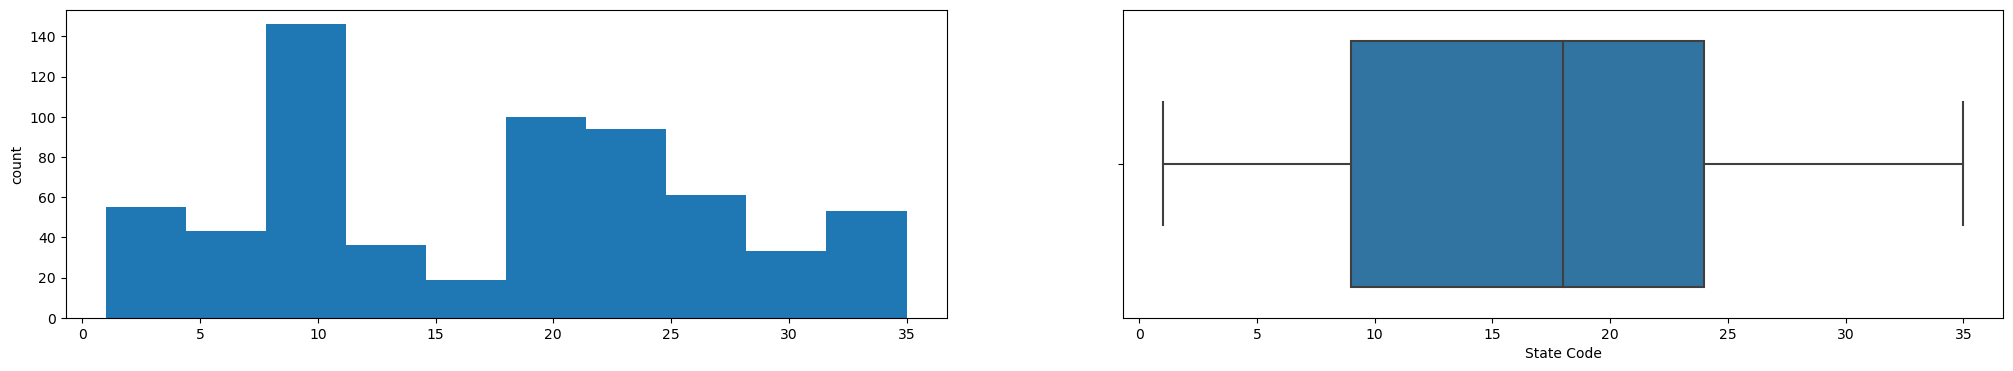

Dist.Code


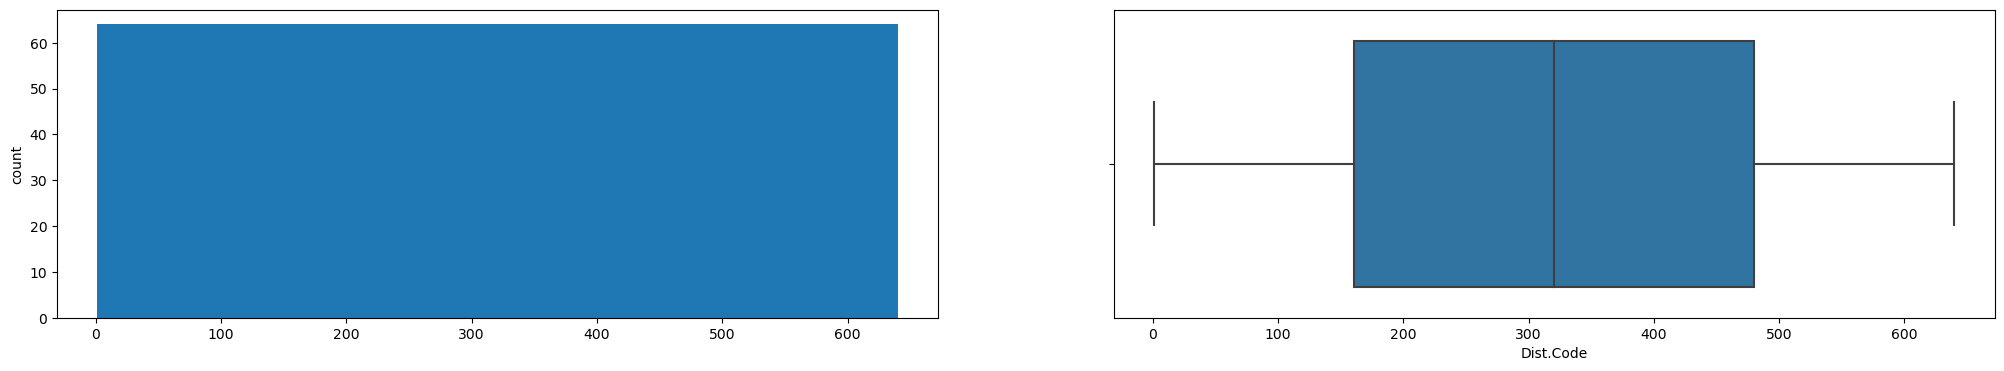

No_HH


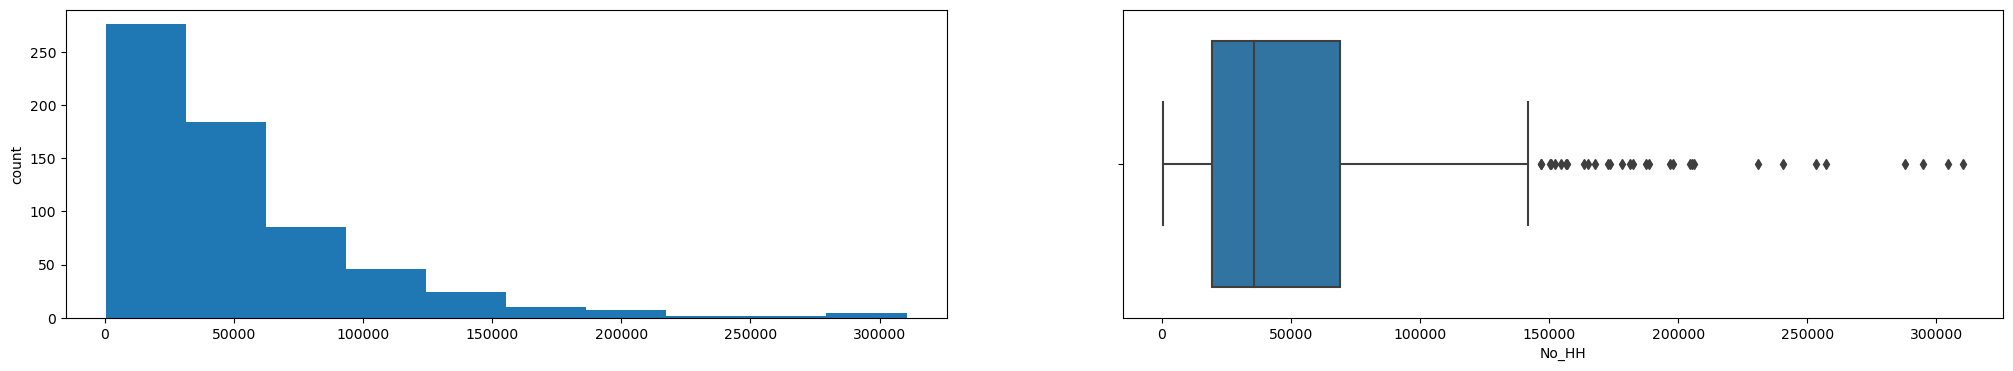

TOT_M


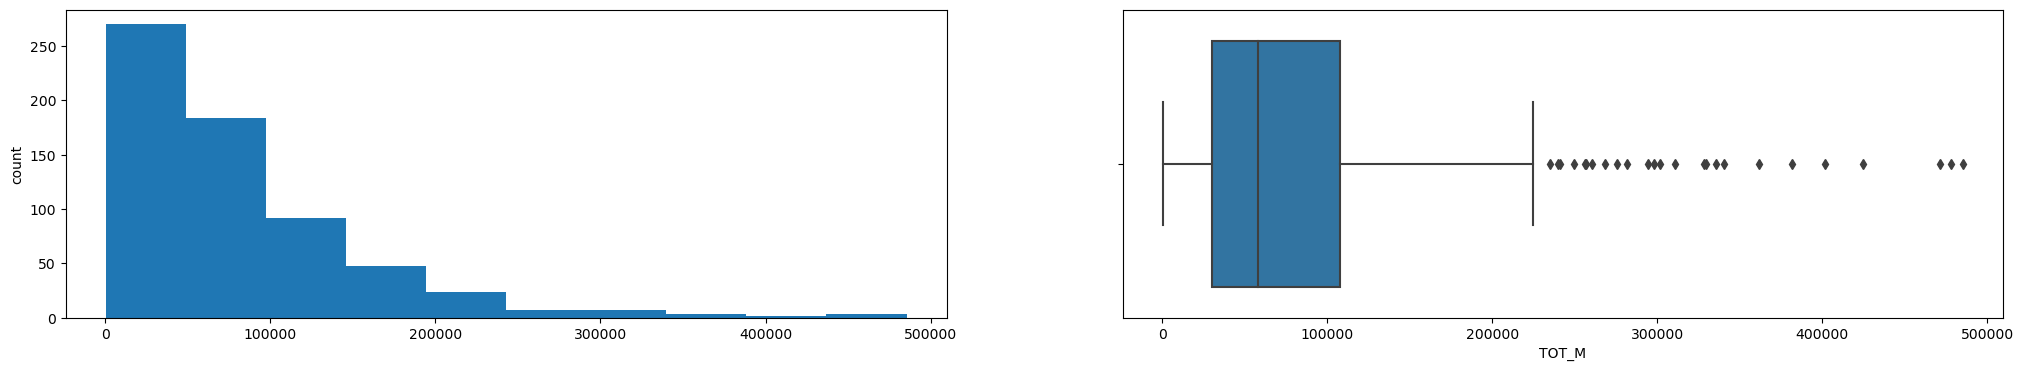

TOT_F


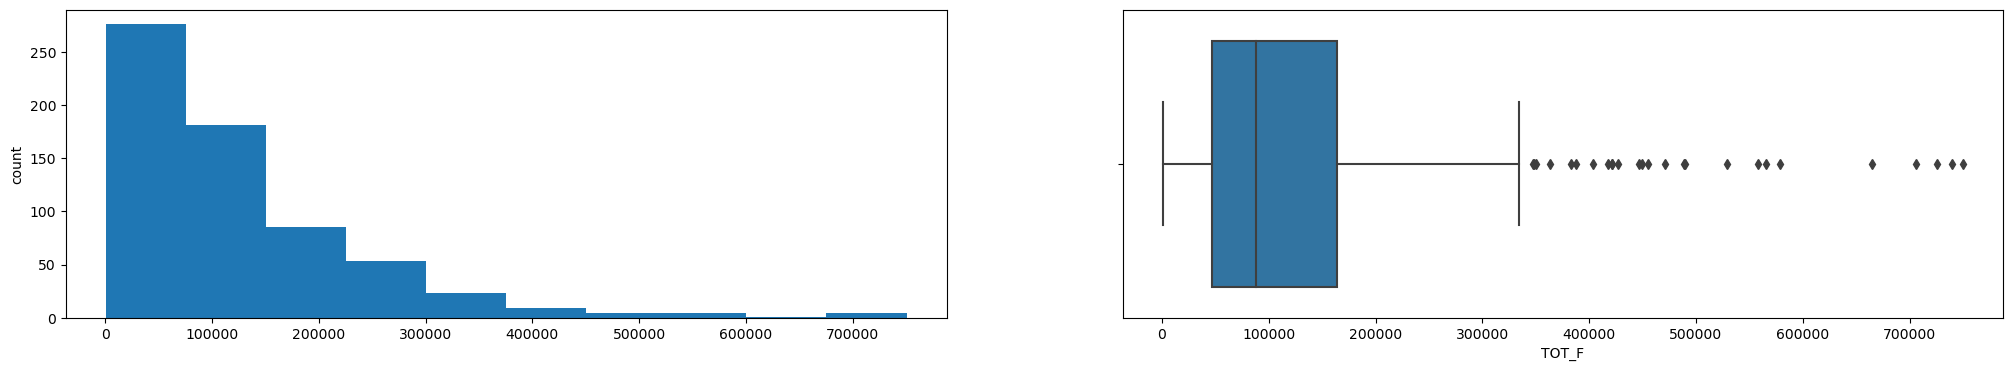

M_06


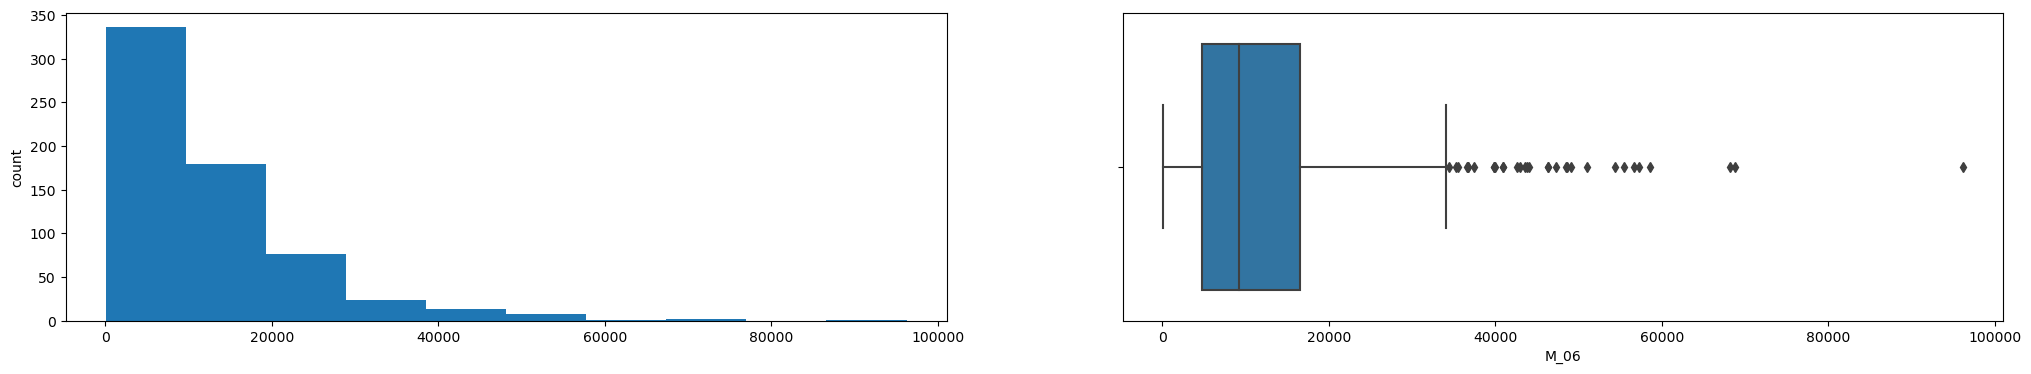

F_06


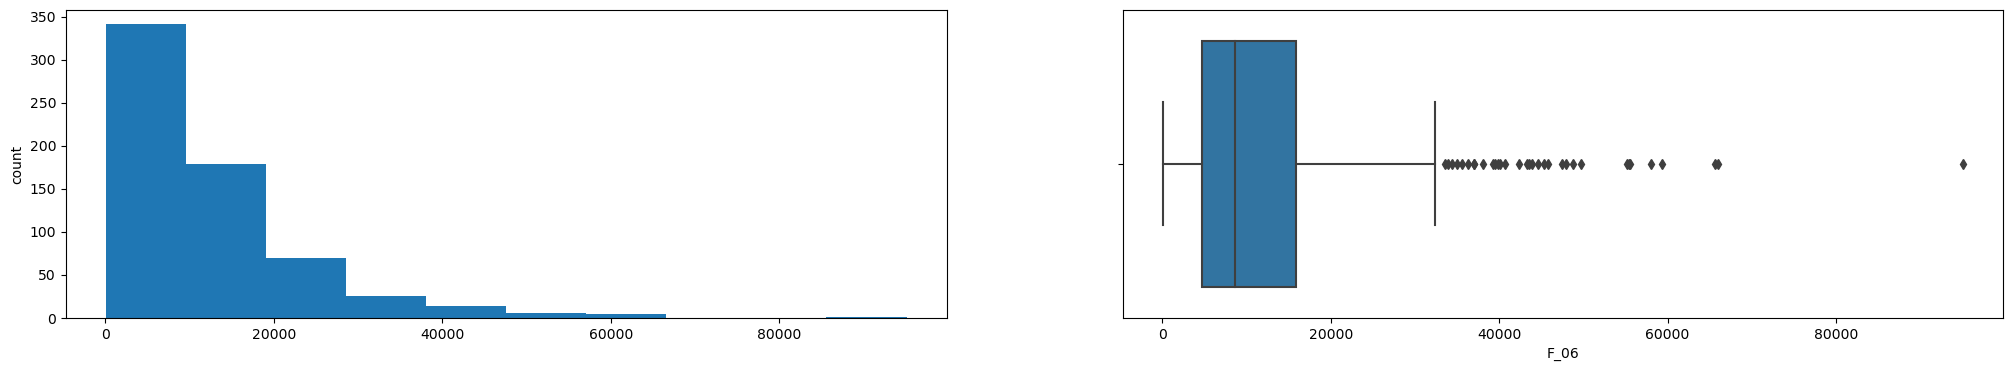

M_SC


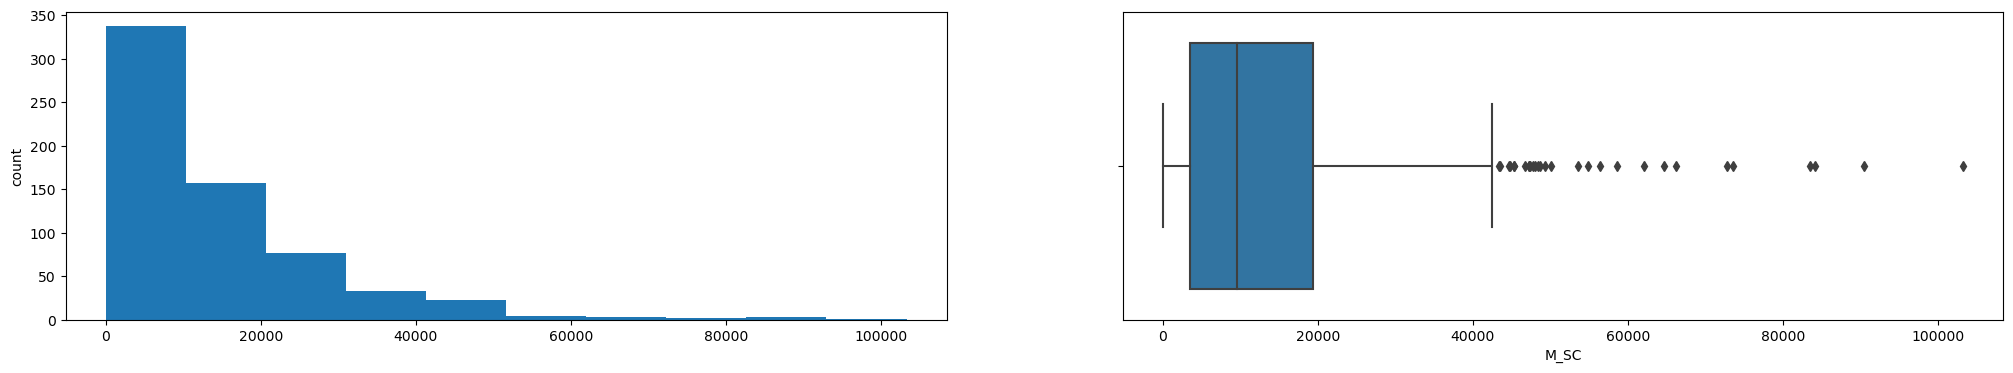

F_SC


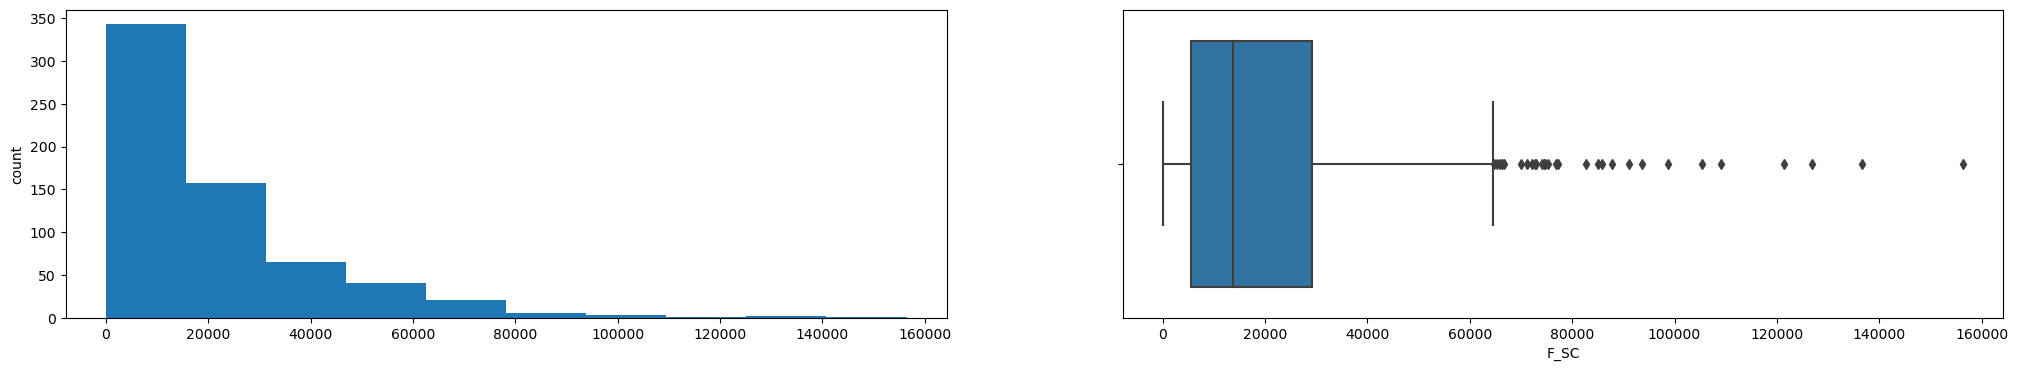

M_ST


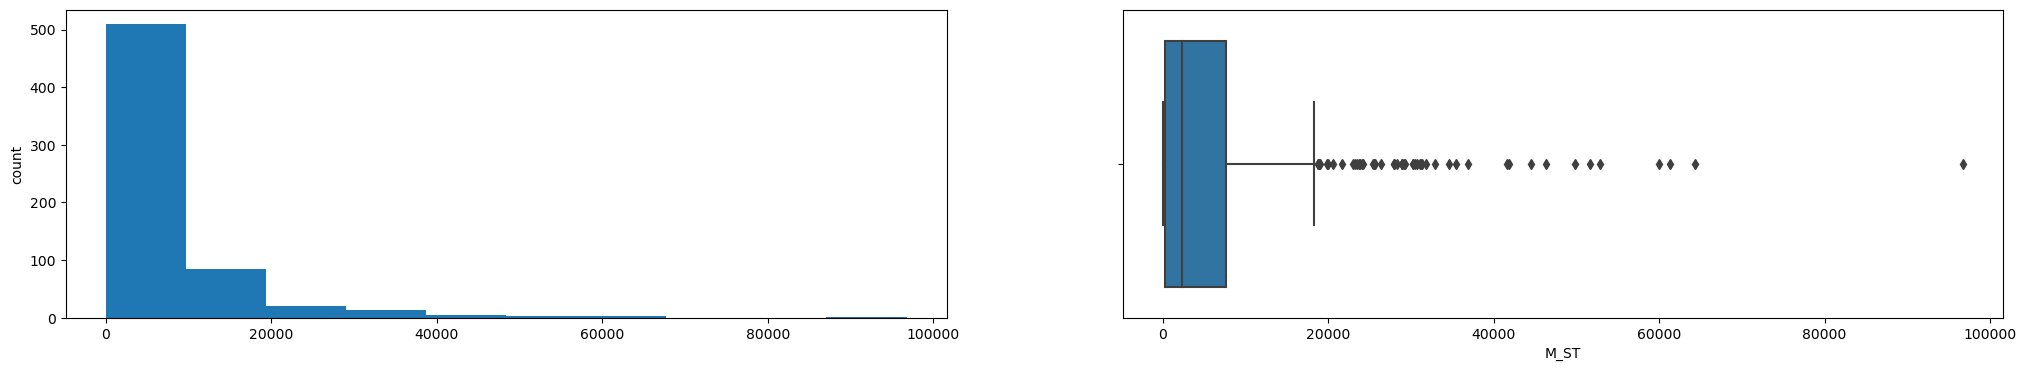

F_ST


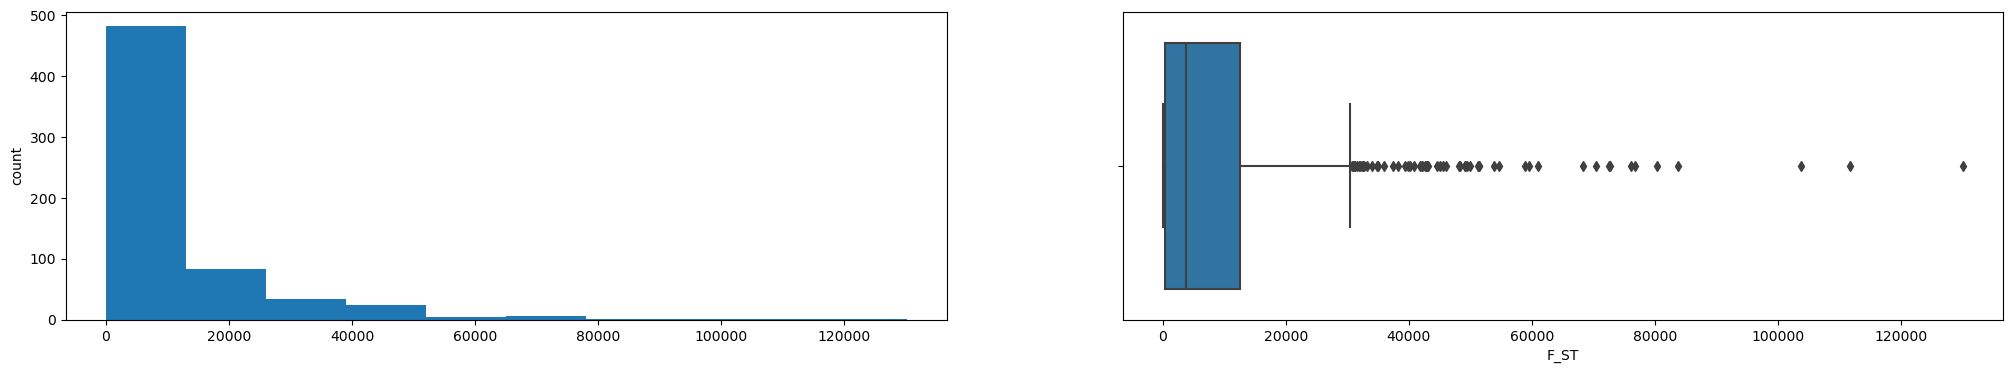

M_LIT


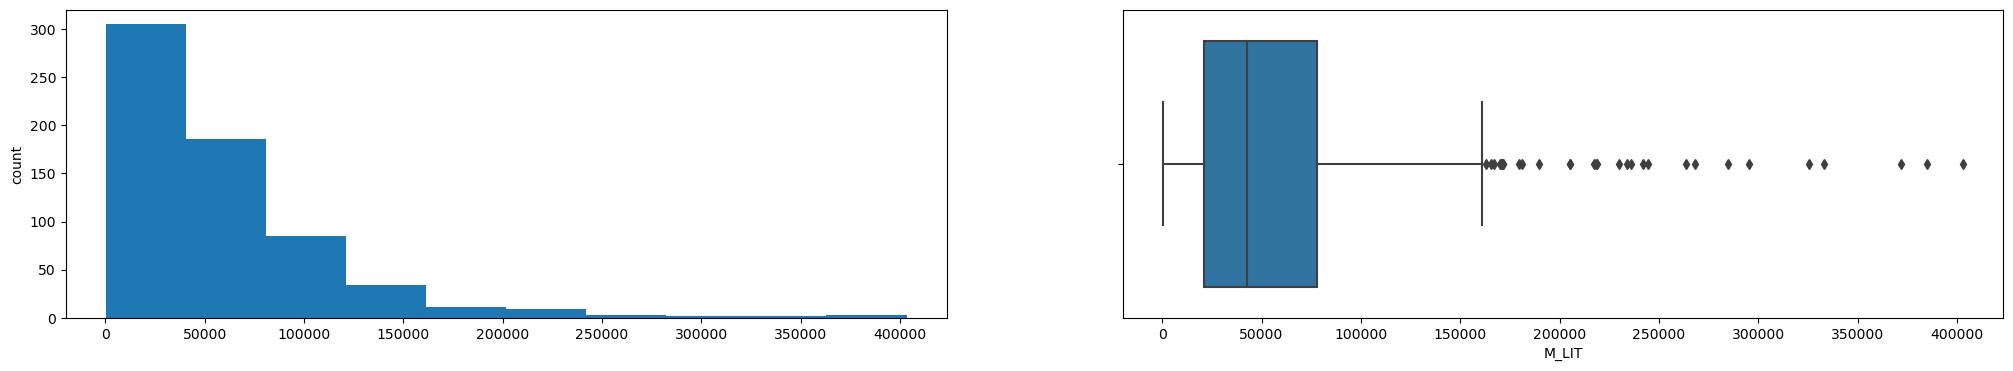

F_LIT


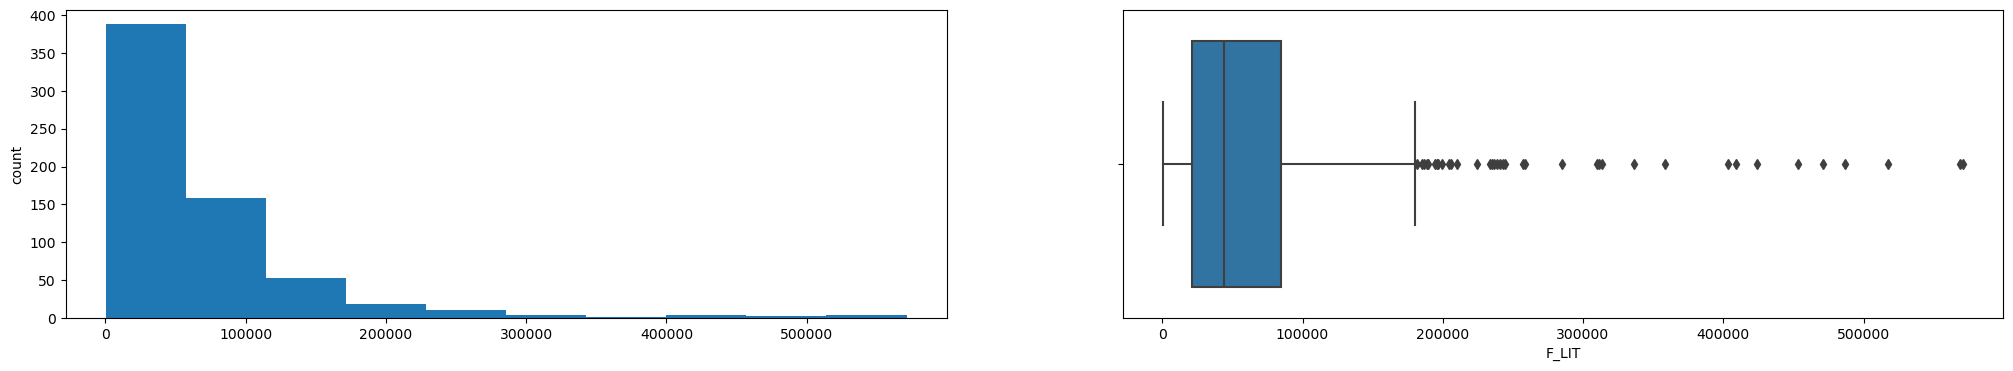

M_ILL


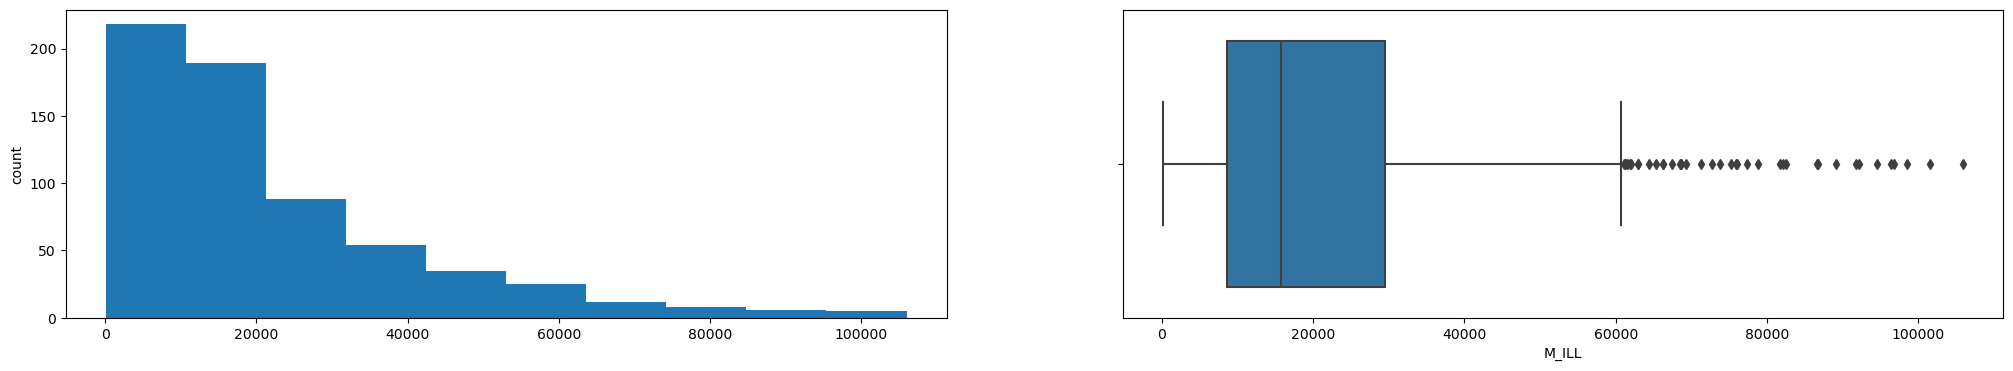

F_ILL


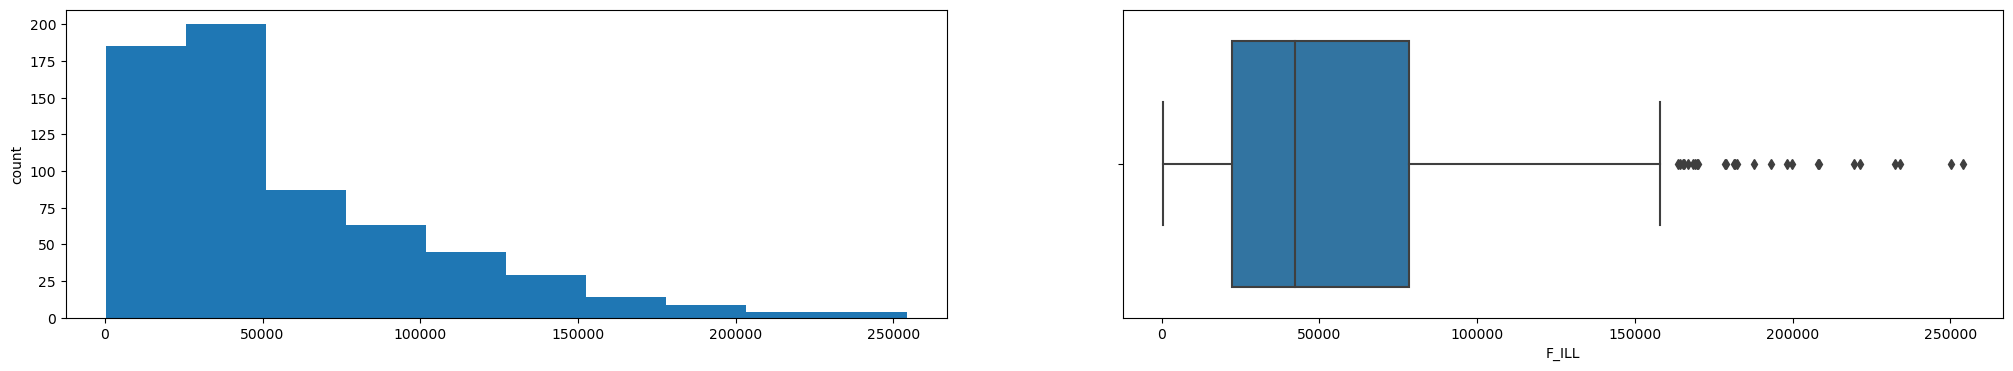

TOT_WORK_M


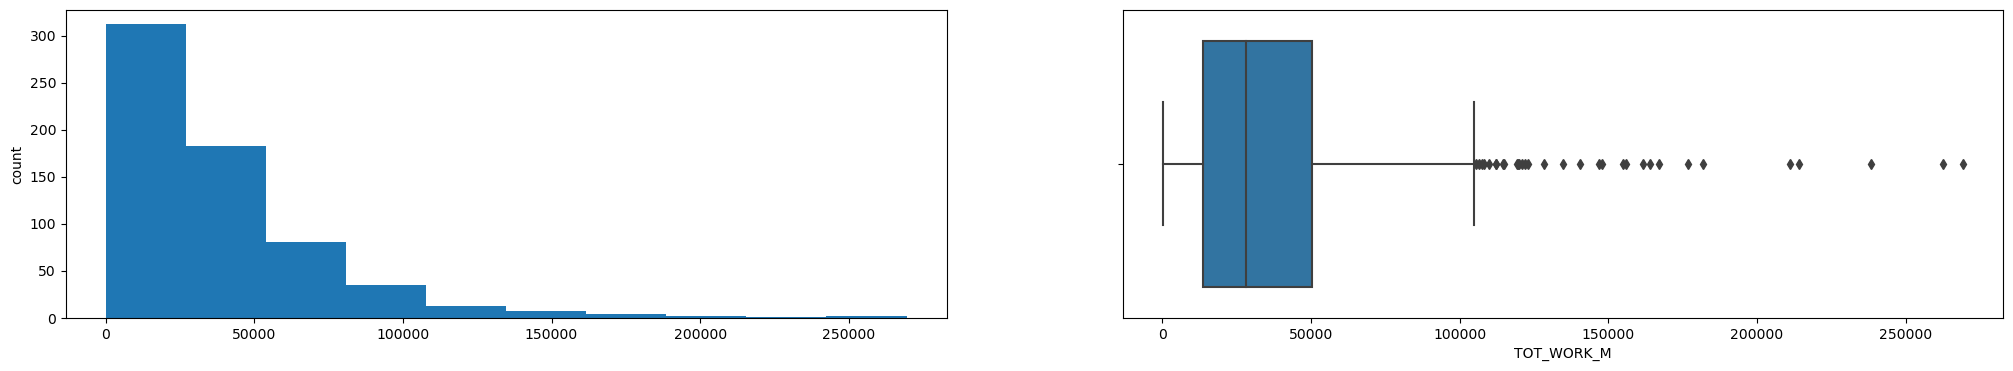

TOT_WORK_F


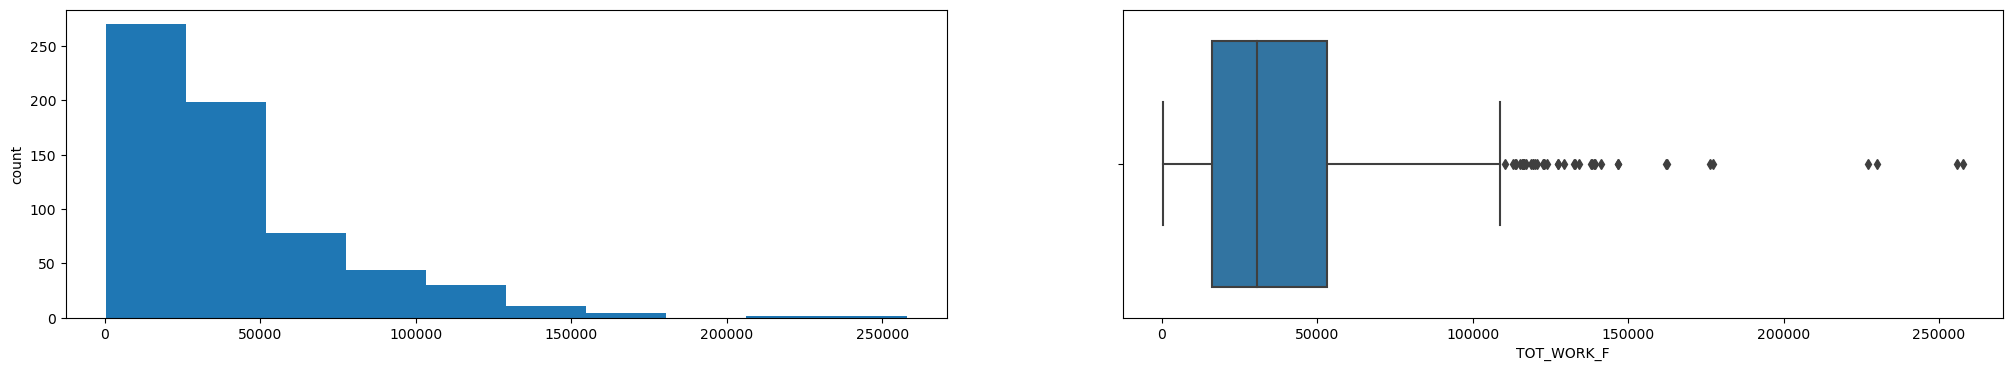

MAINWORK_M


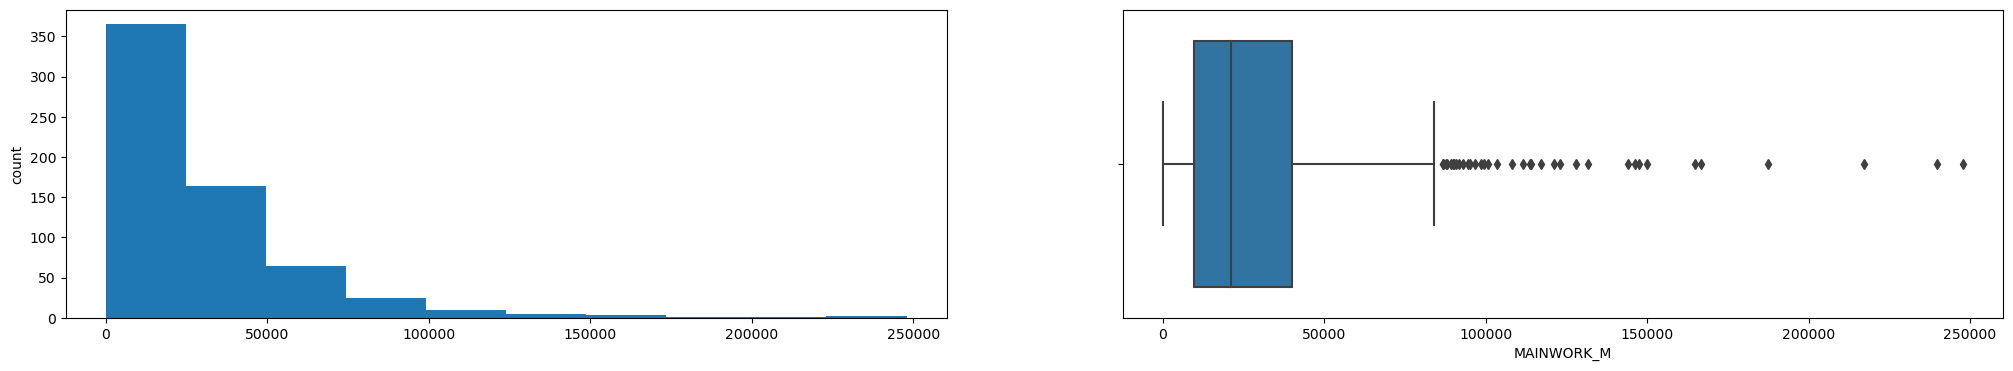

MAINWORK_F


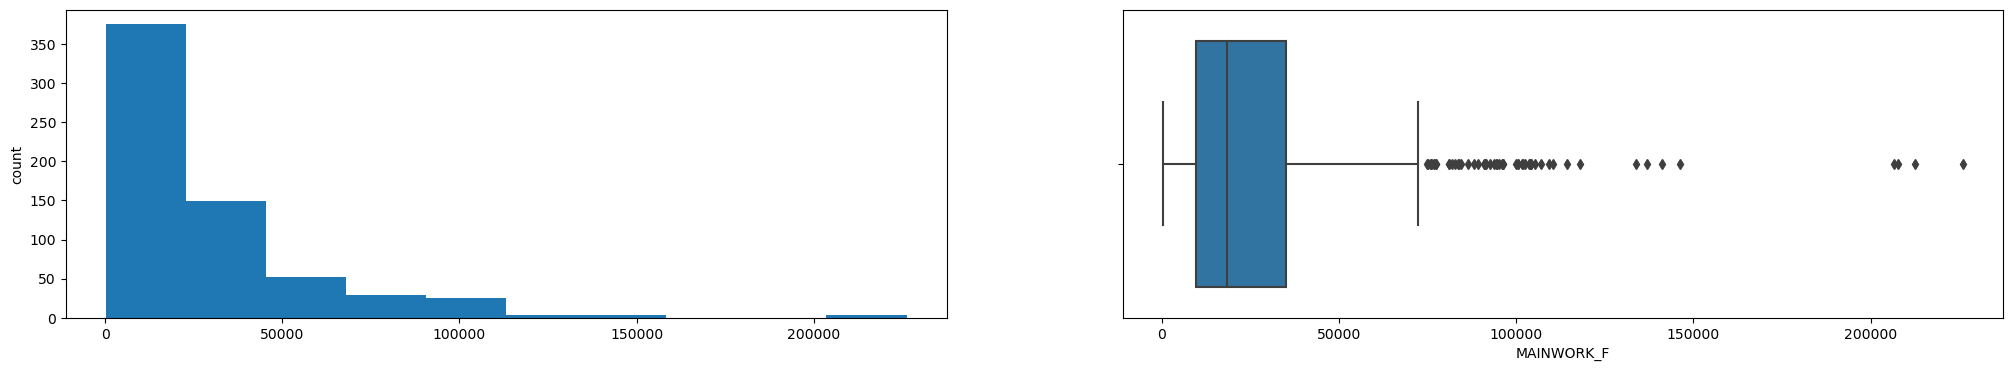

MAIN_CL_M


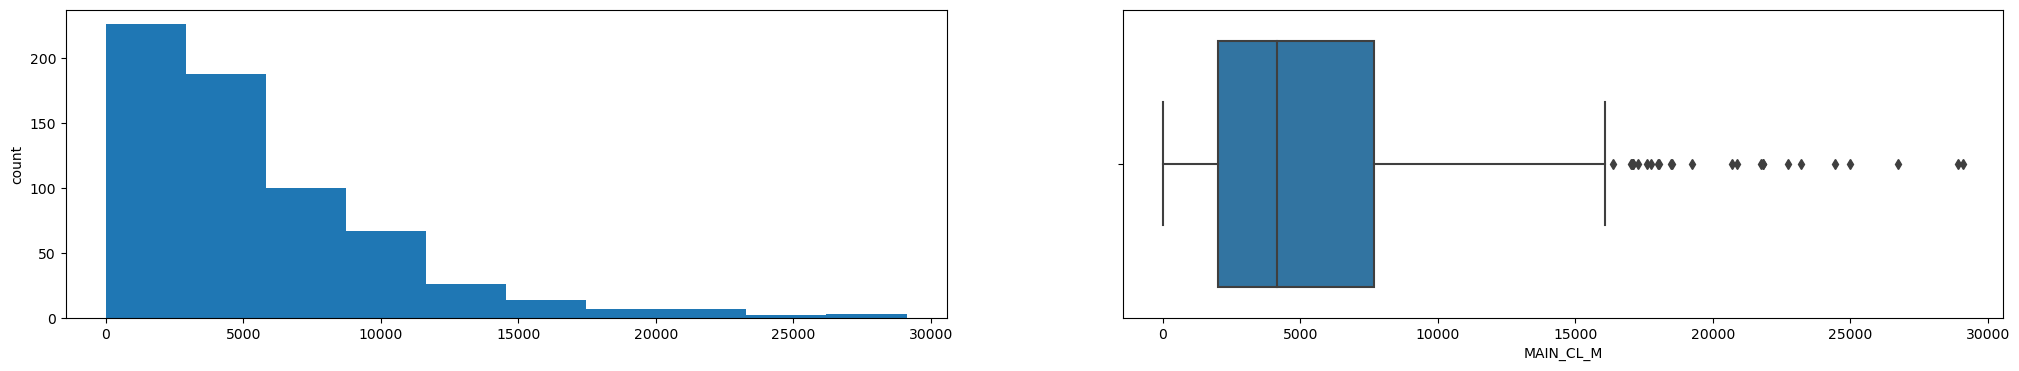

MAIN_CL_F


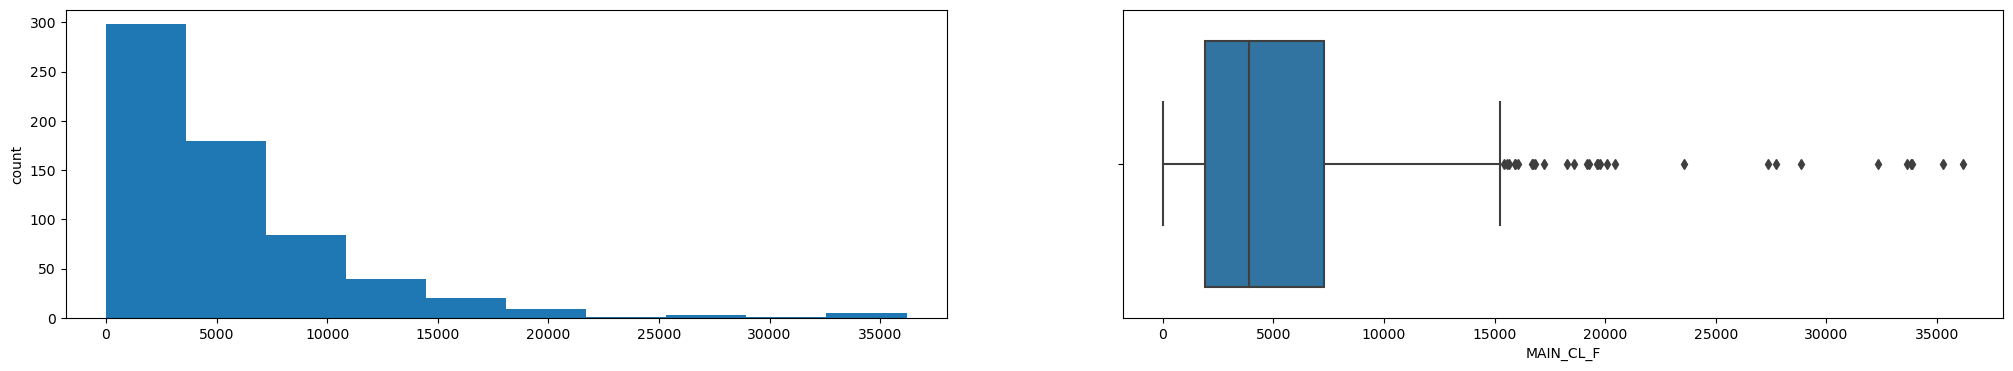

MAIN_AL_M


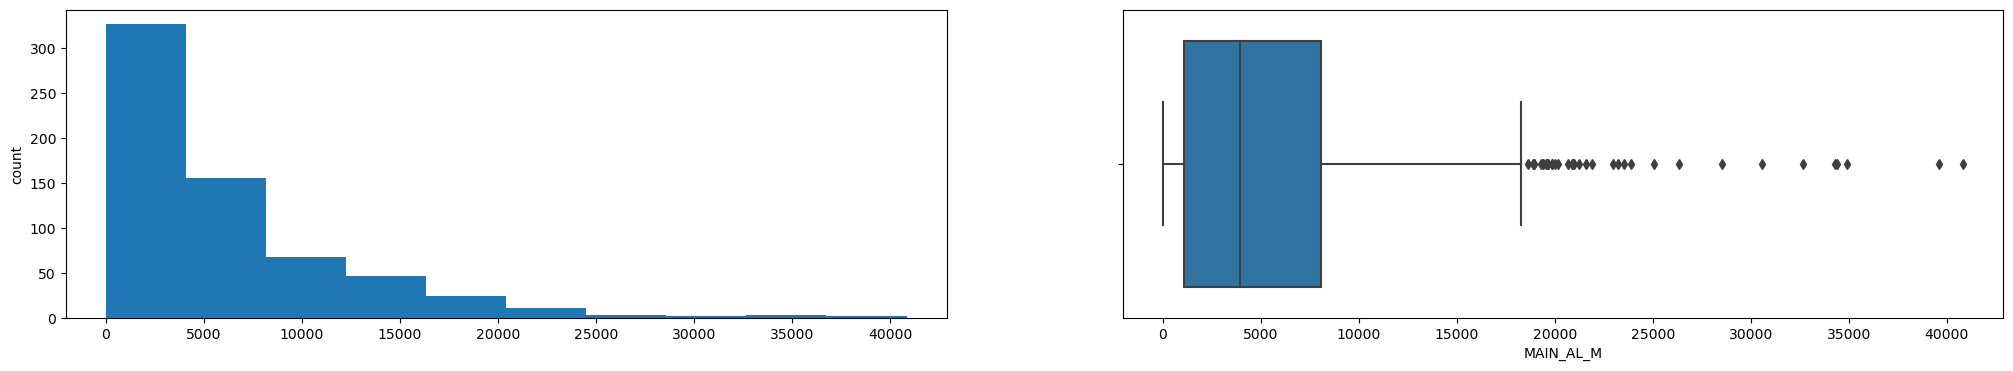

MAIN_AL_F


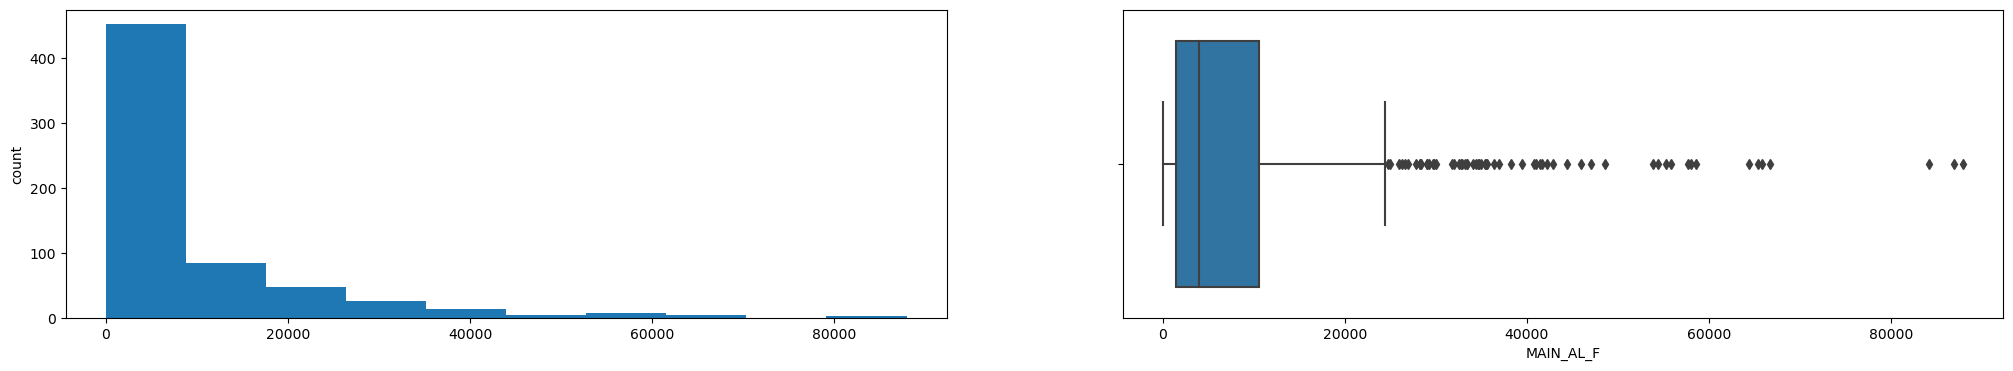

MAIN_HH_M


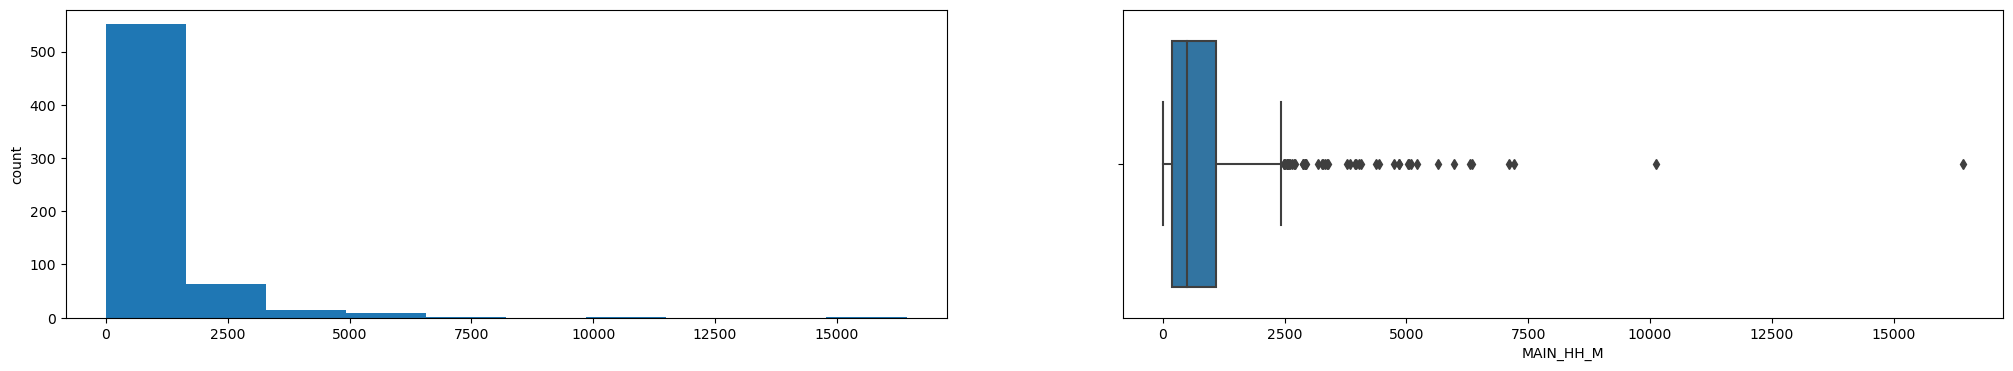

MAIN_HH_F


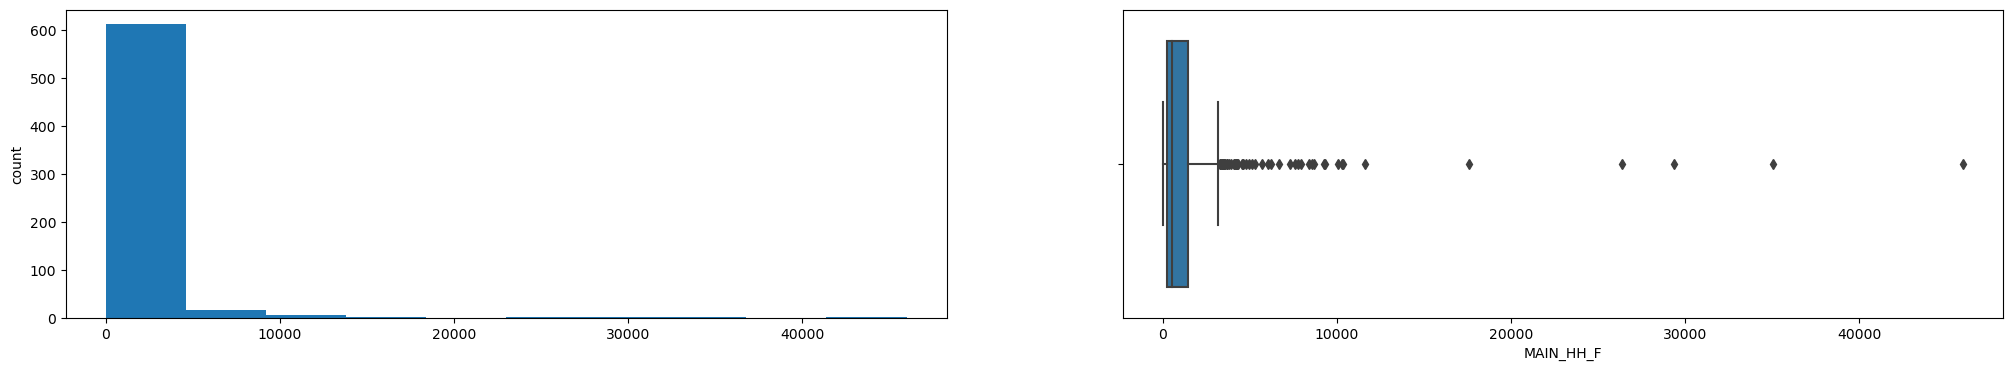

MAIN_OT_M


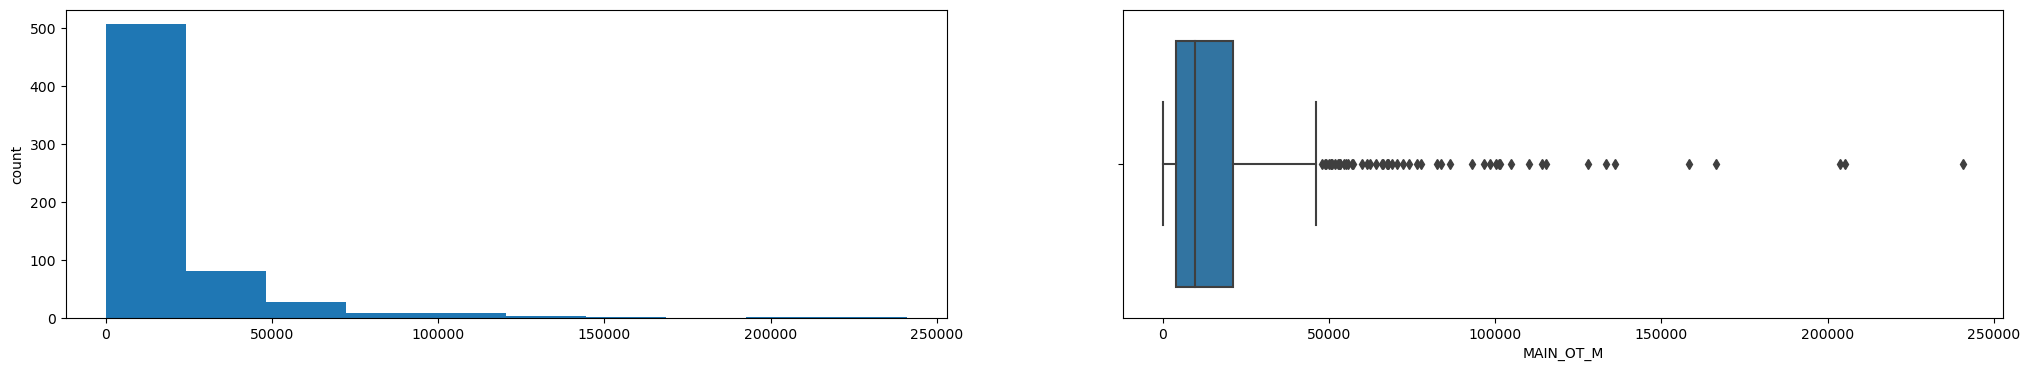

MAIN_OT_F


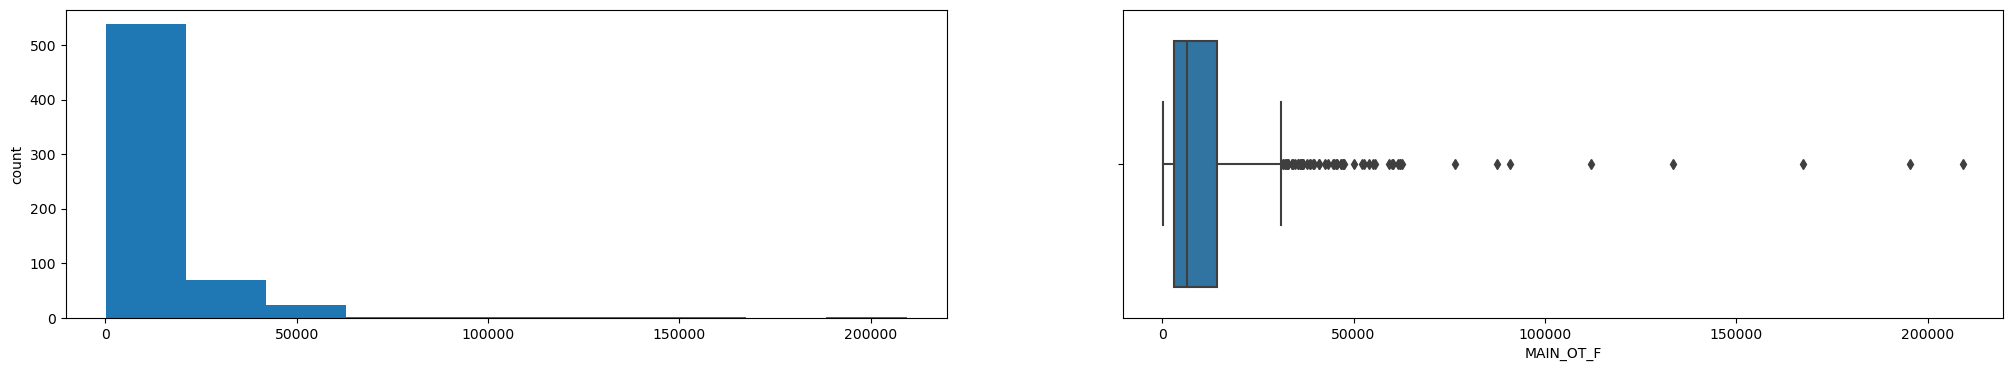

MARGWORK_M


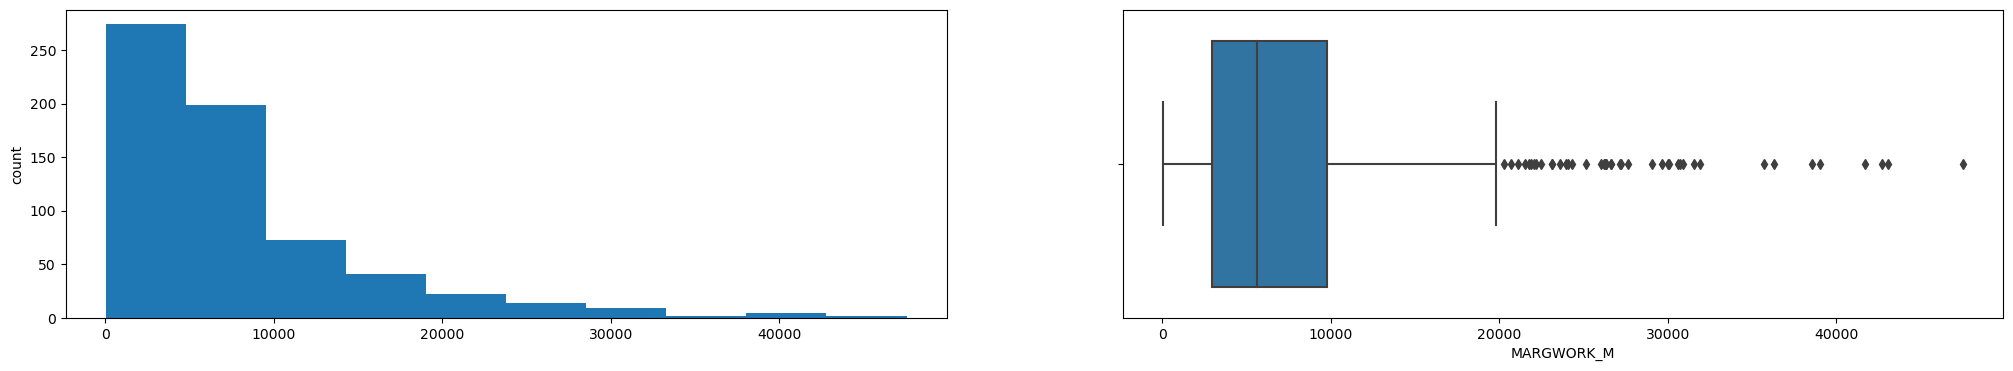

MARGWORK_F


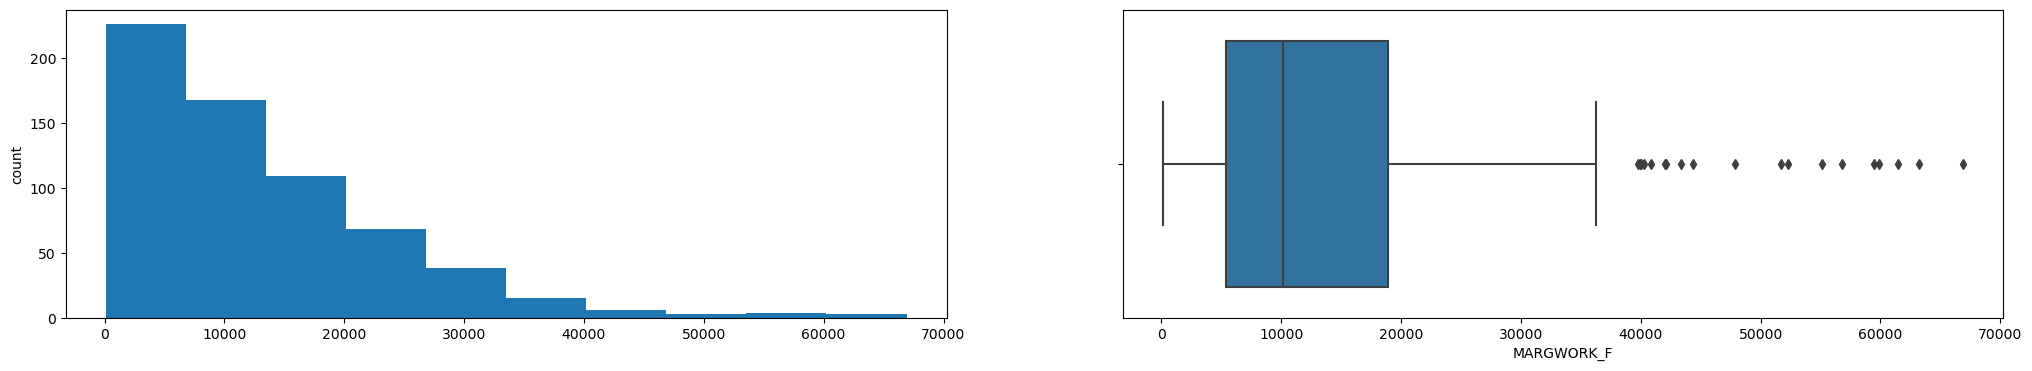

MARG_CL_M


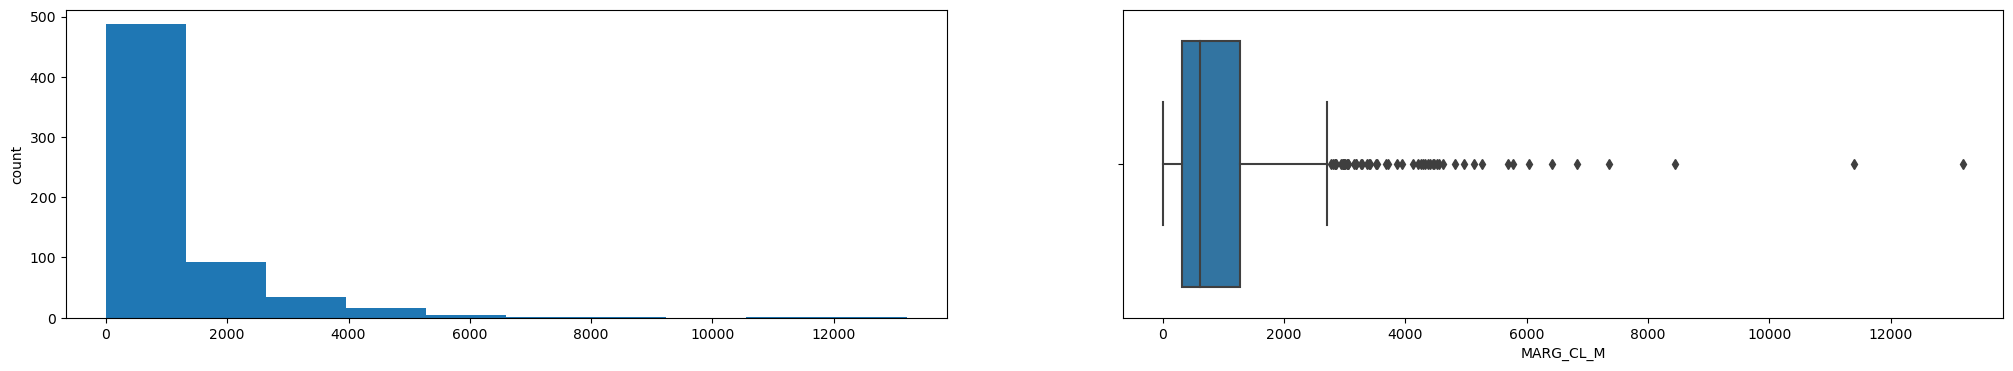

MARG_CL_F


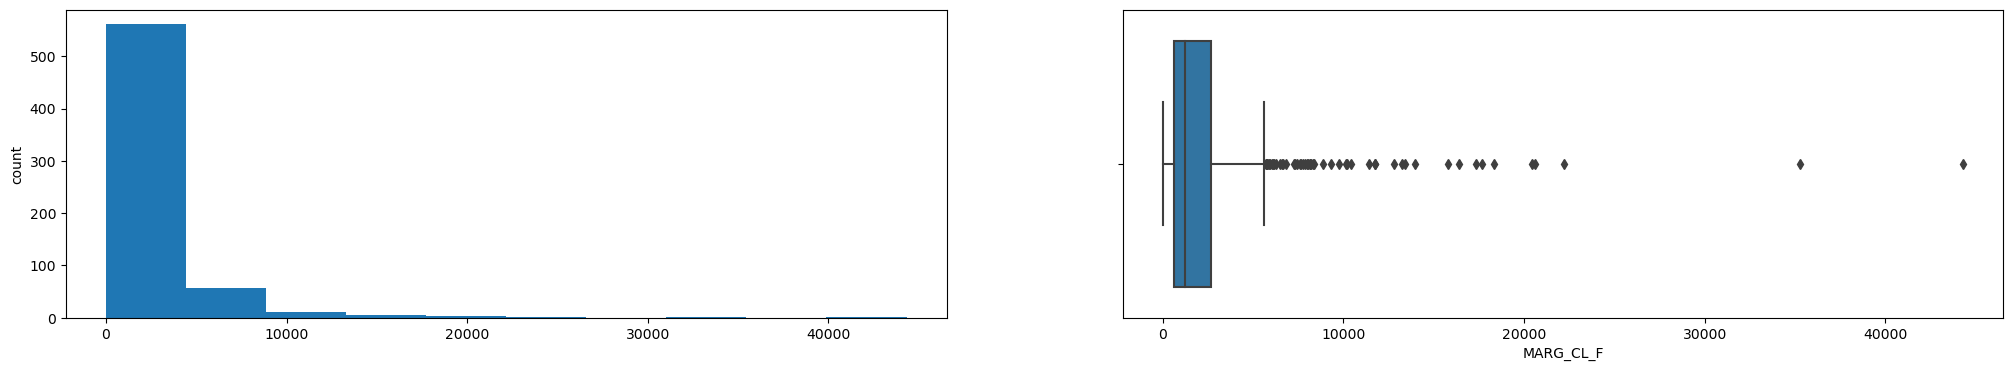

MARG_AL_M


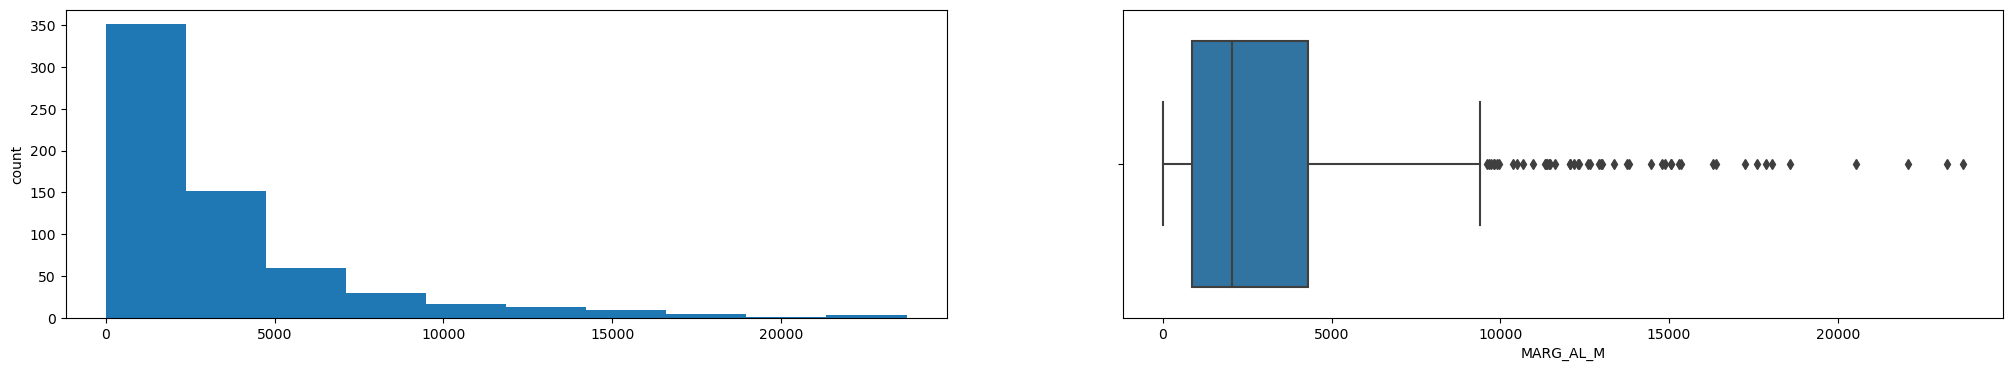

MARG_AL_F


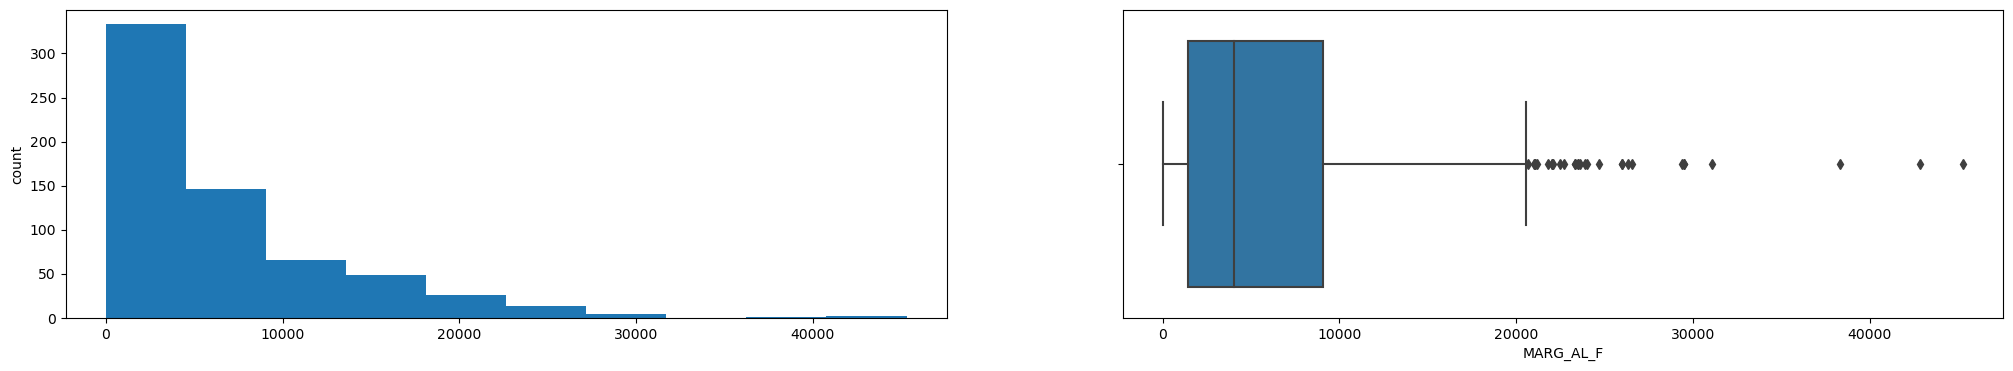

MARG_HH_M


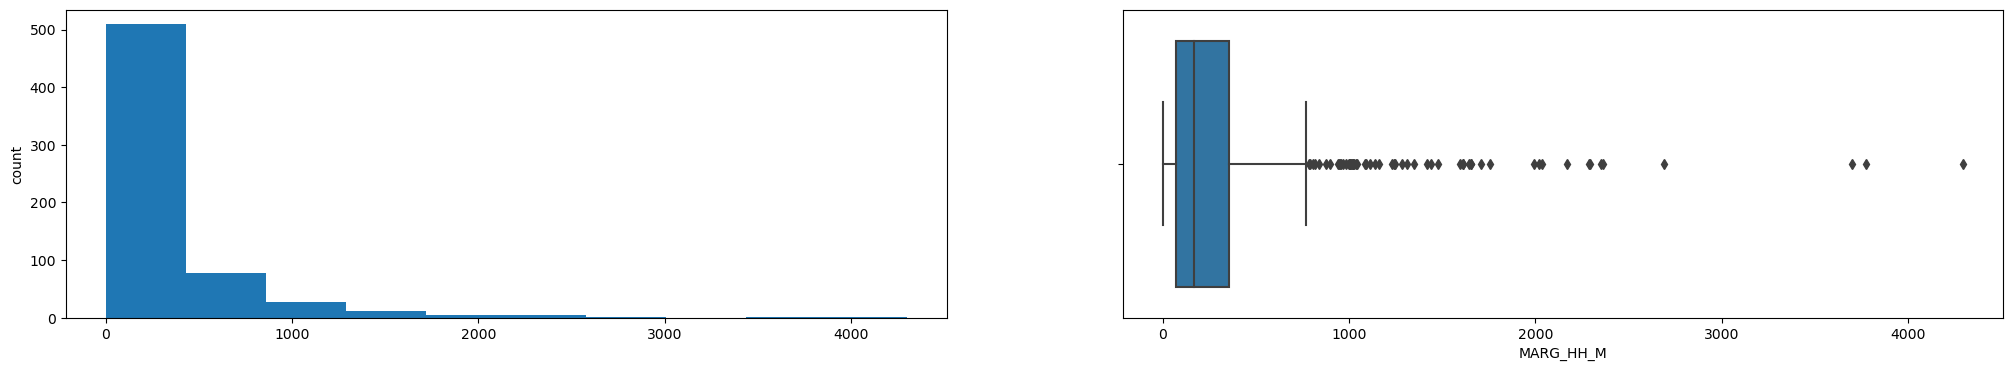

MARG_HH_F


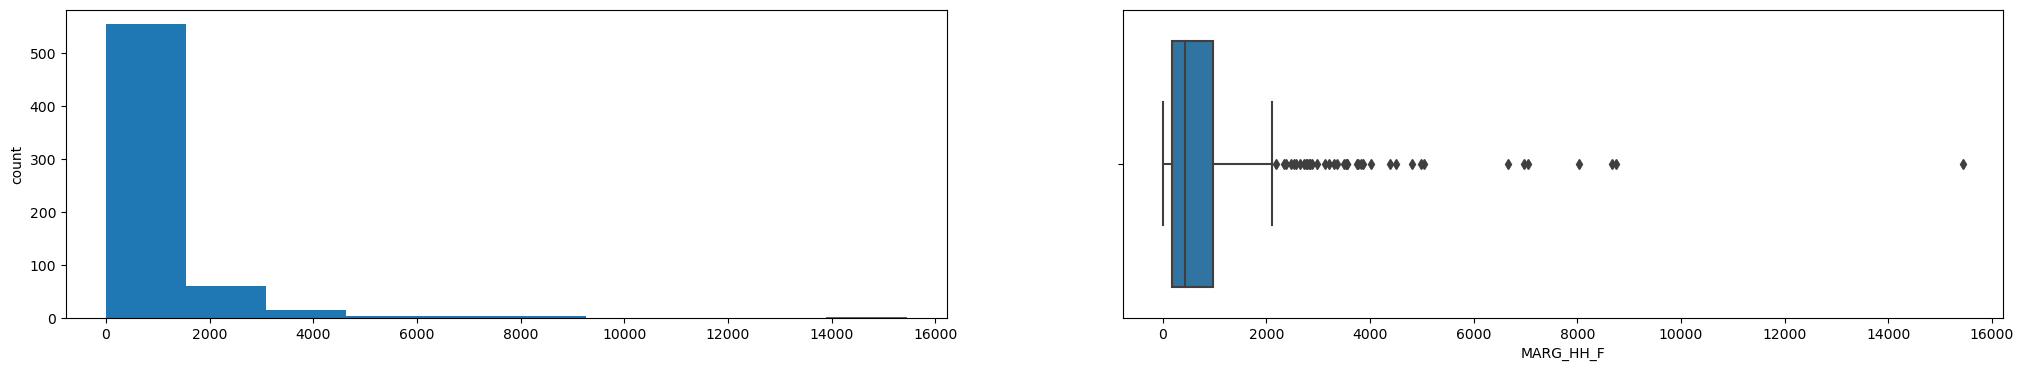

MARG_OT_M


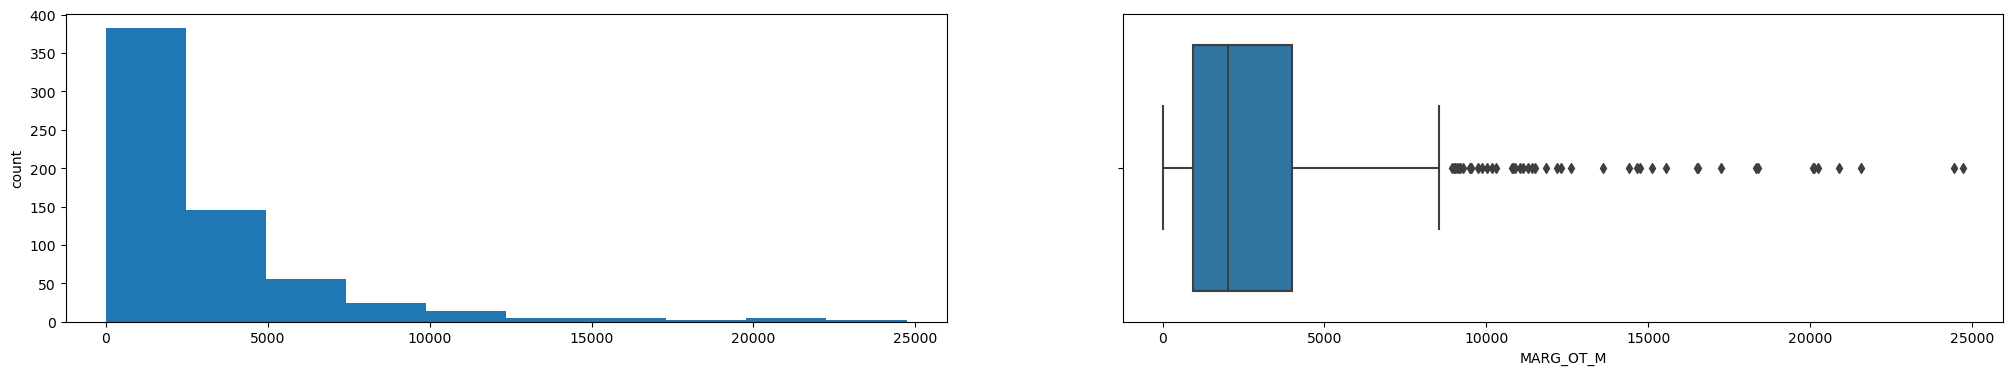

MARG_OT_F


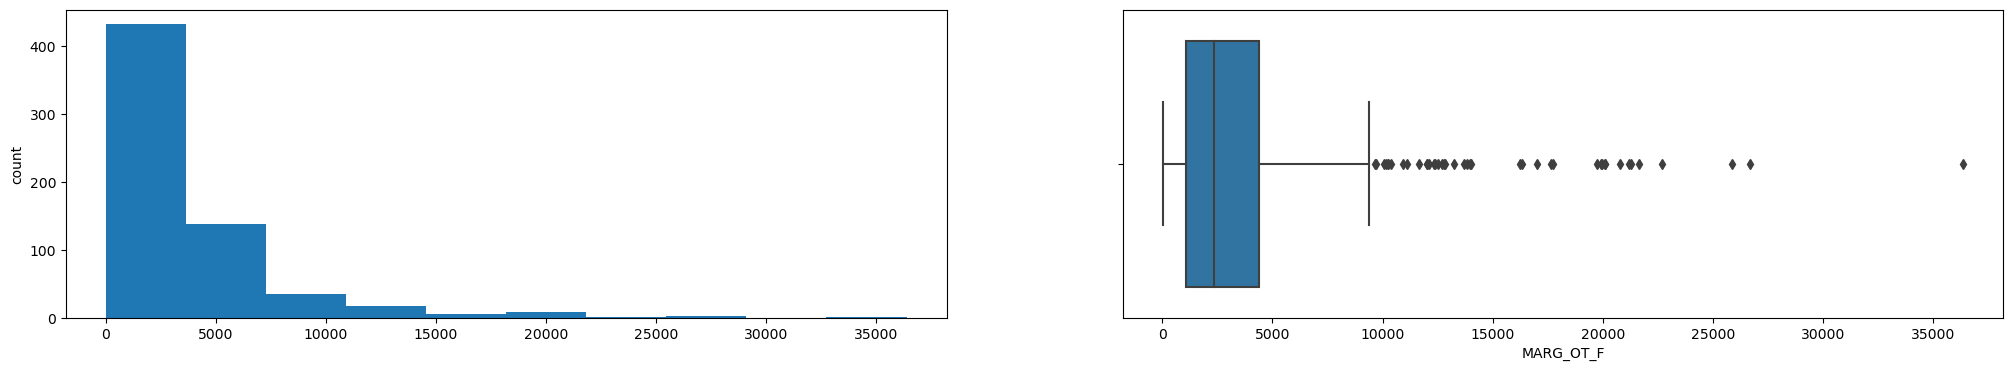

MARGWORK_3_6_M


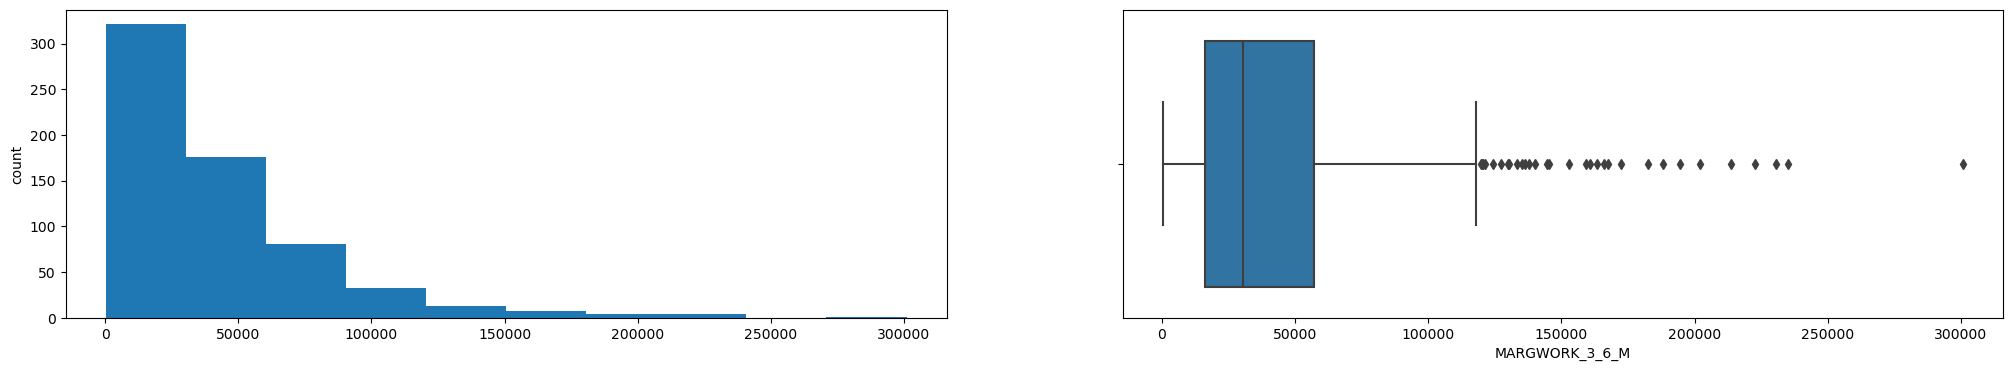

MARGWORK_3_6_F


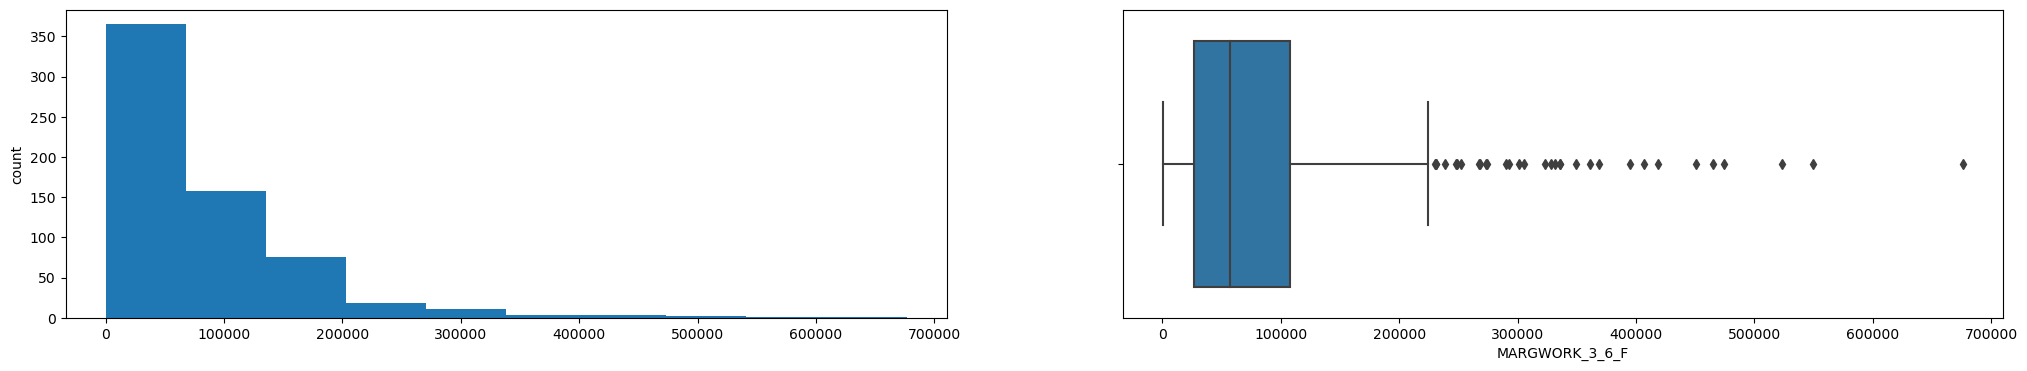

MARG_CL_3_6_M


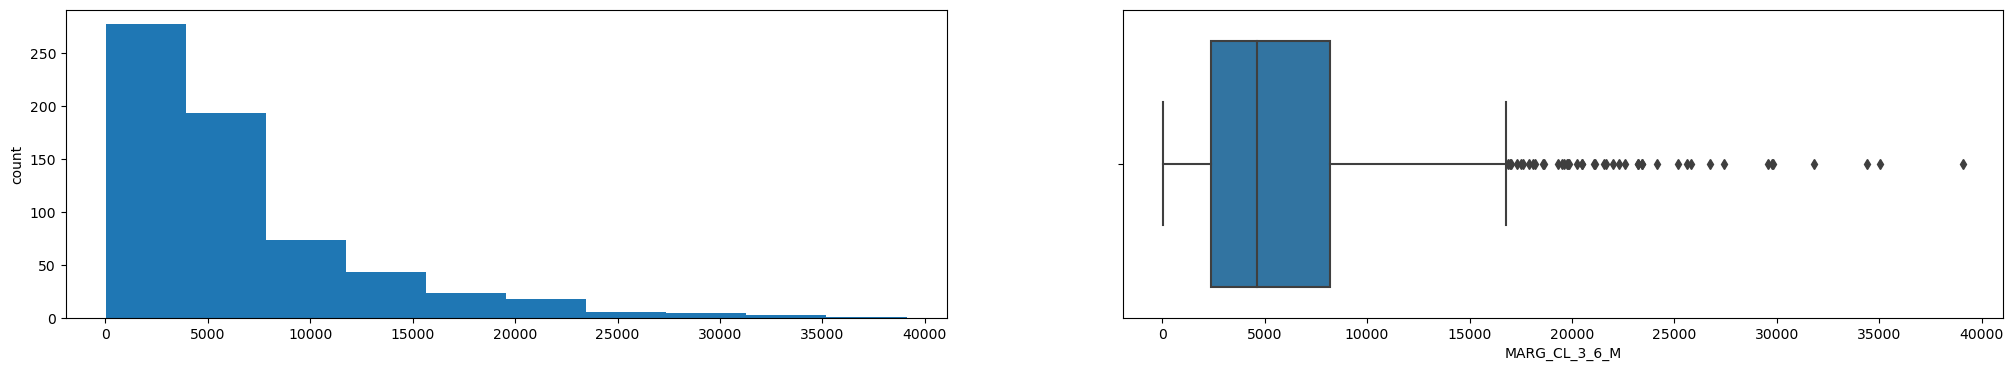

MARG_CL_3_6_F


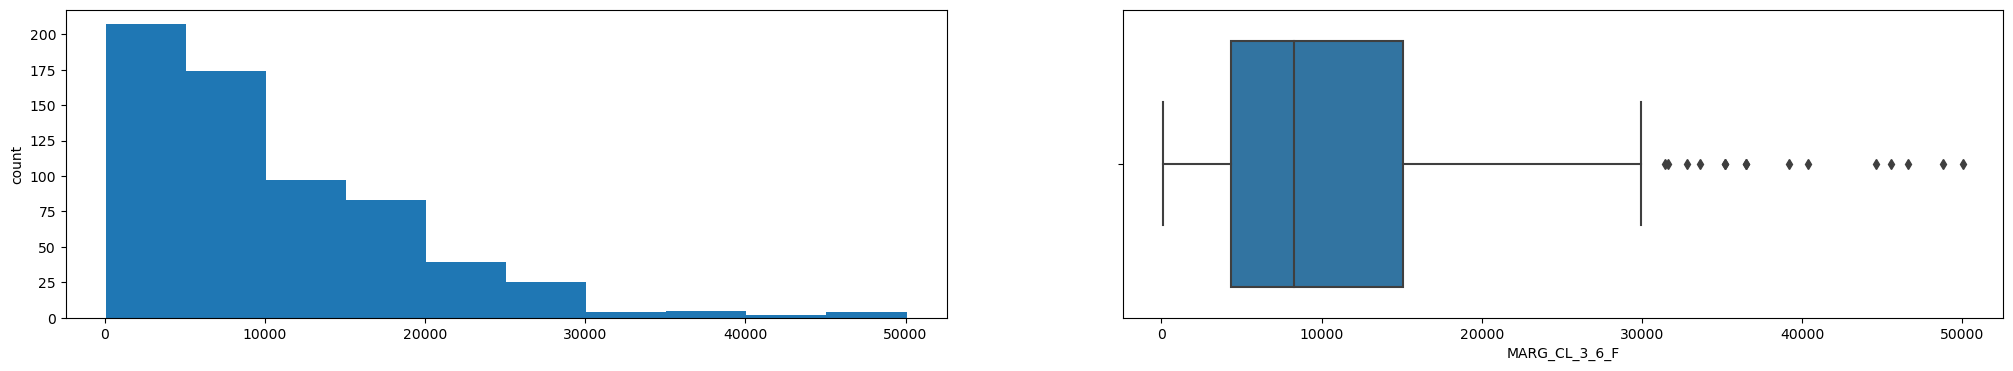

MARG_AL_3_6_M


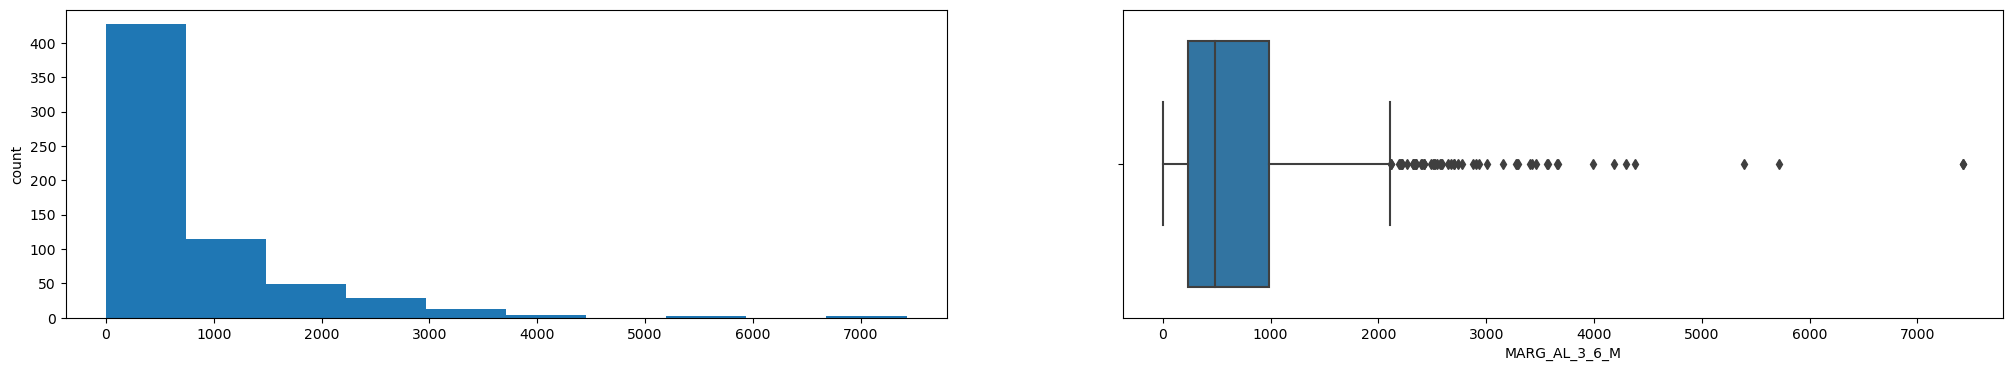

MARG_AL_3_6_F


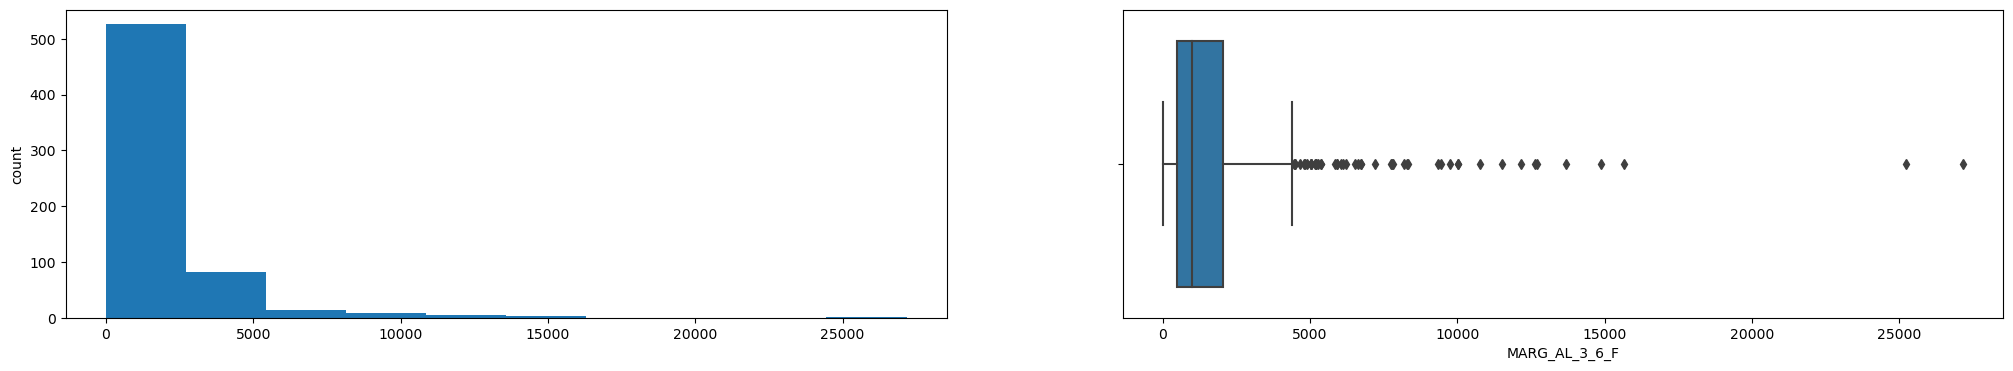

MARG_HH_3_6_M


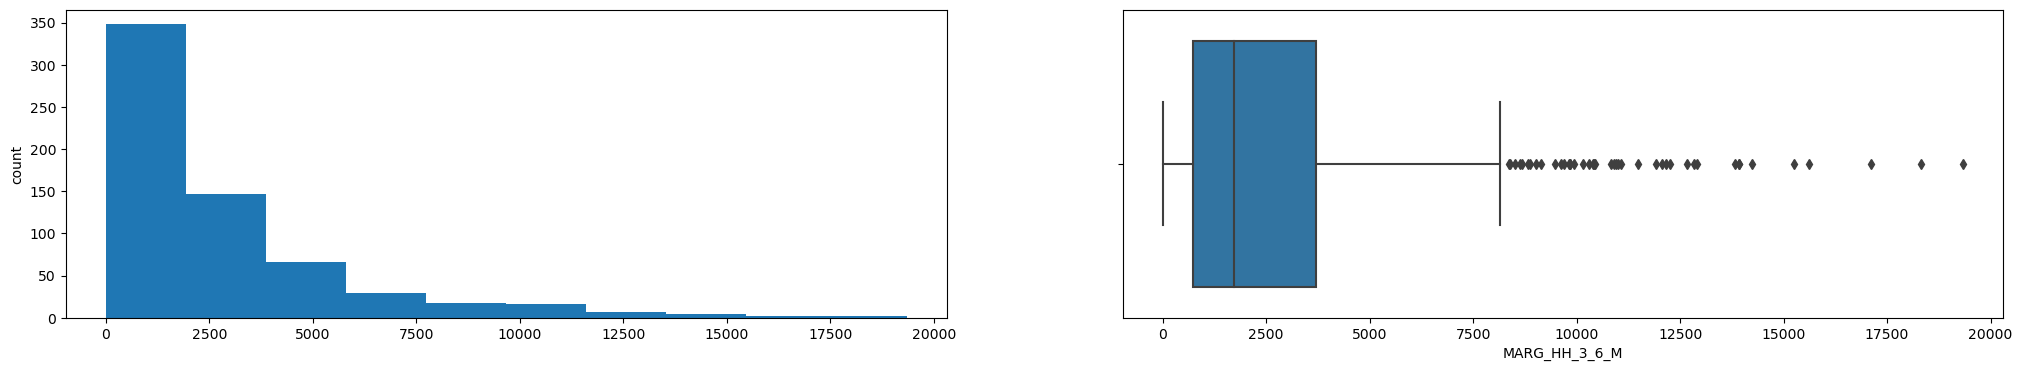

MARG_HH_3_6_F


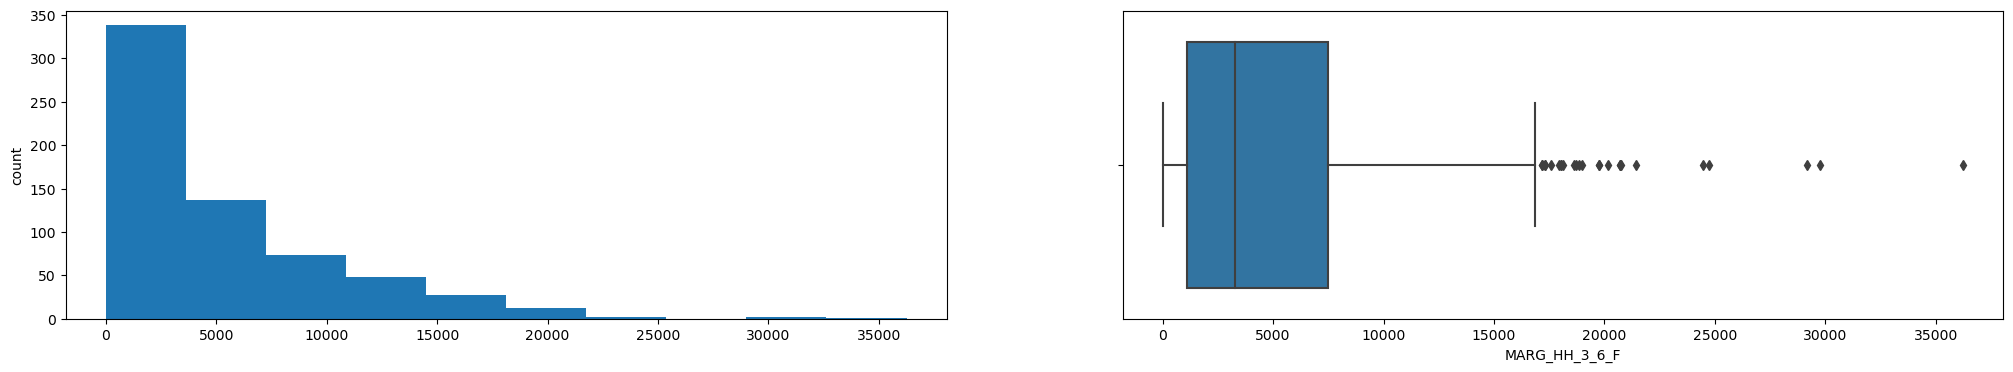

MARG_OT_3_6_M


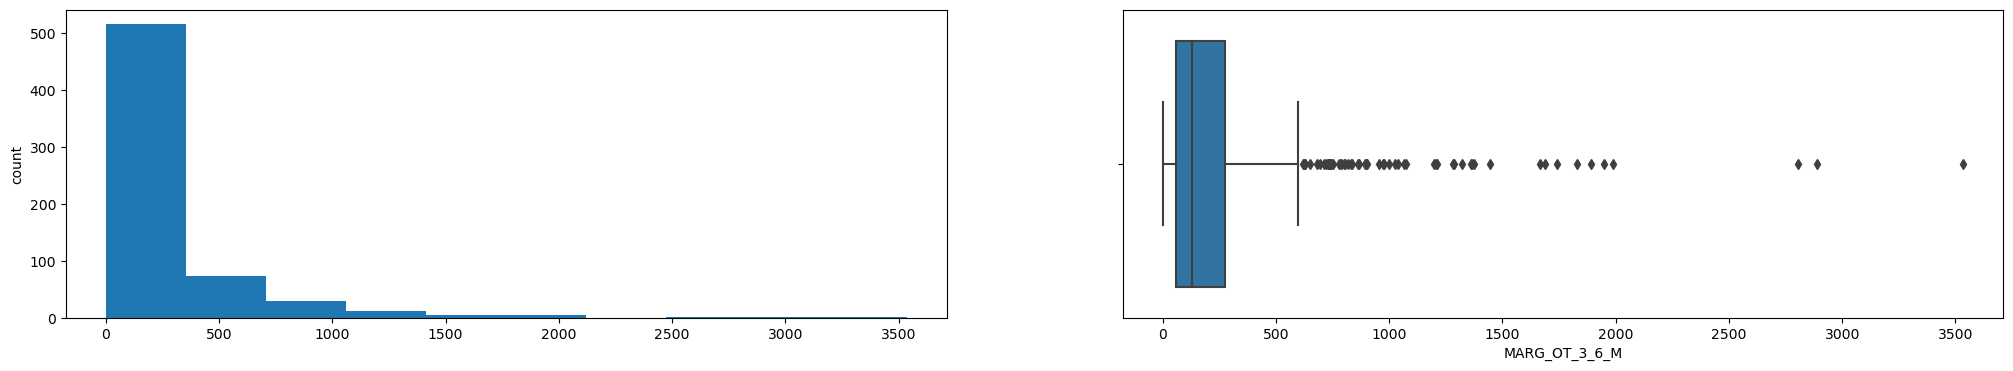

MARG_OT_3_6_F


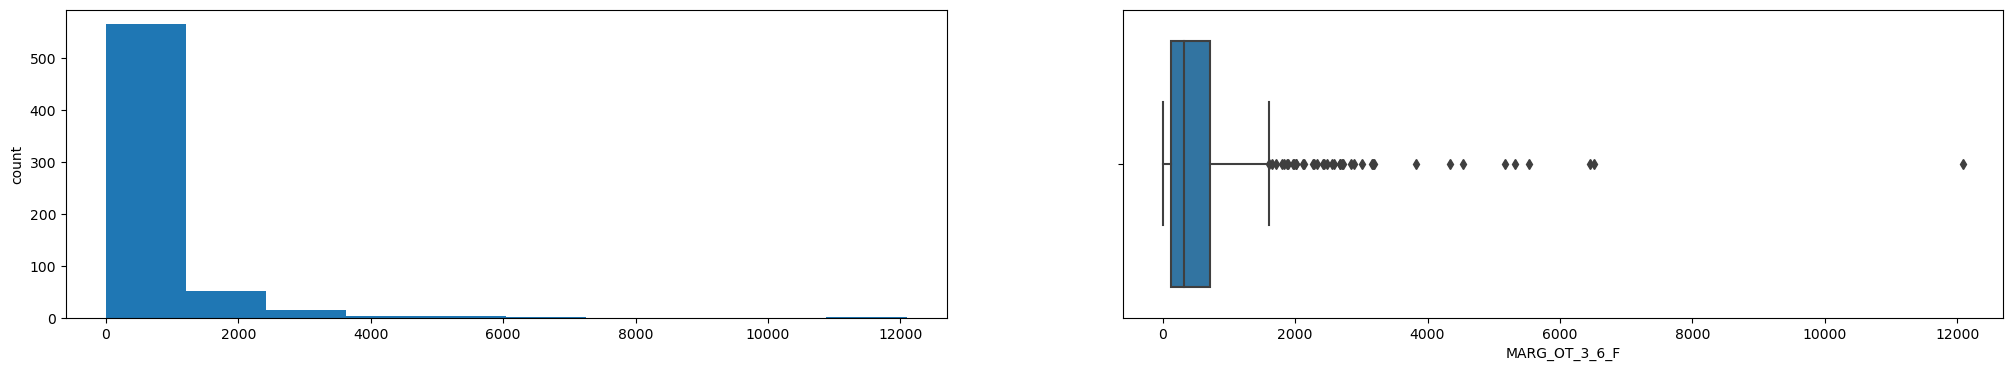

MARGWORK_0_3_M


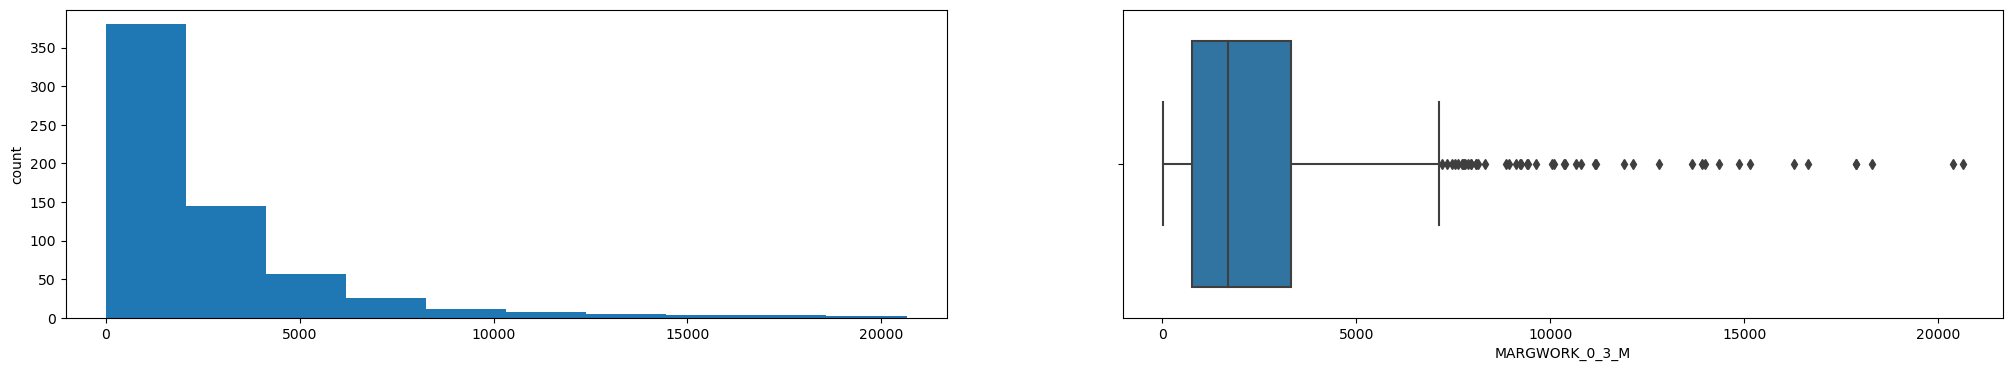

MARGWORK_0_3_F


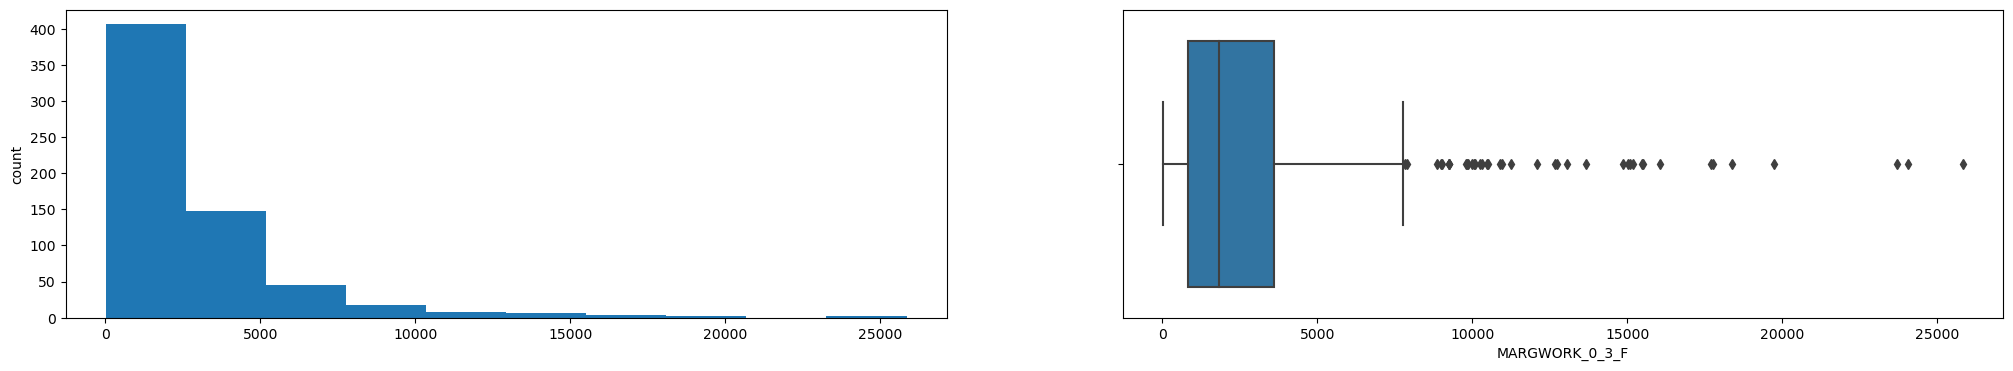

MARG_CL_0_3_M


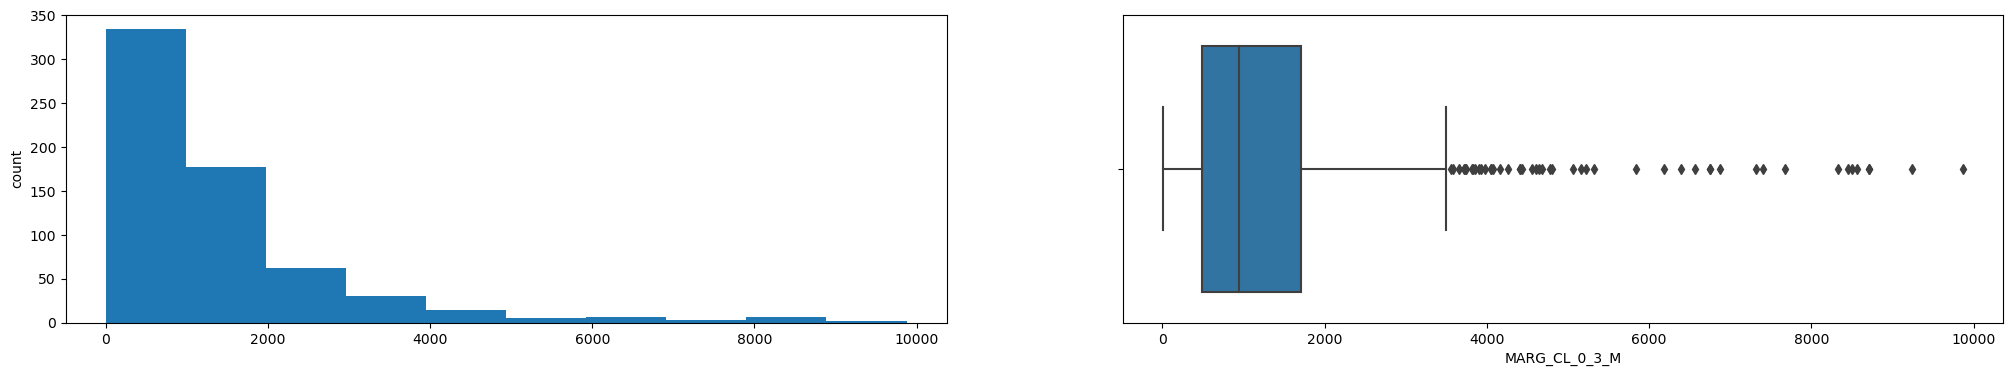

MARG_CL_0_3_F


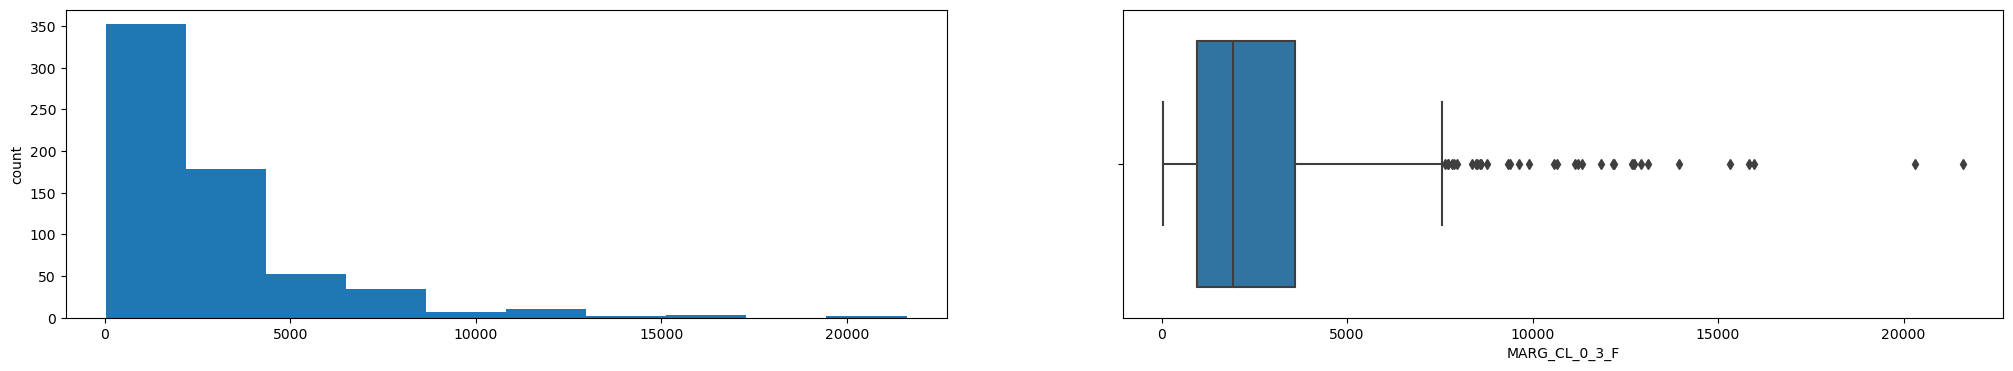

MARG_AL_0_3_M


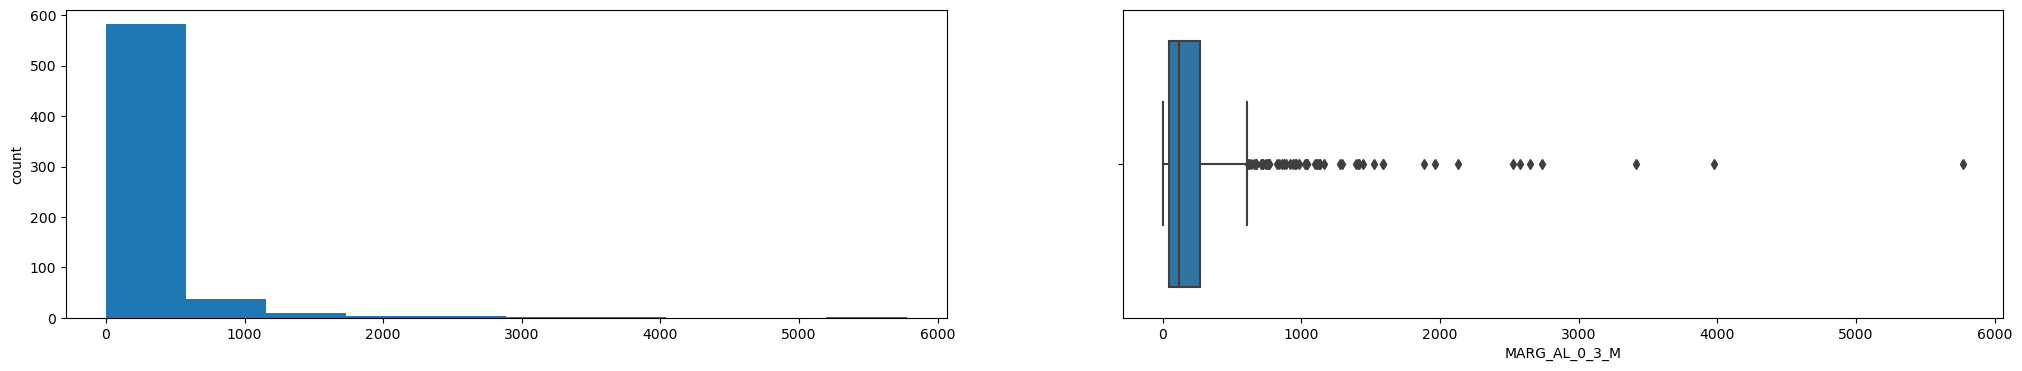

MARG_AL_0_3_F


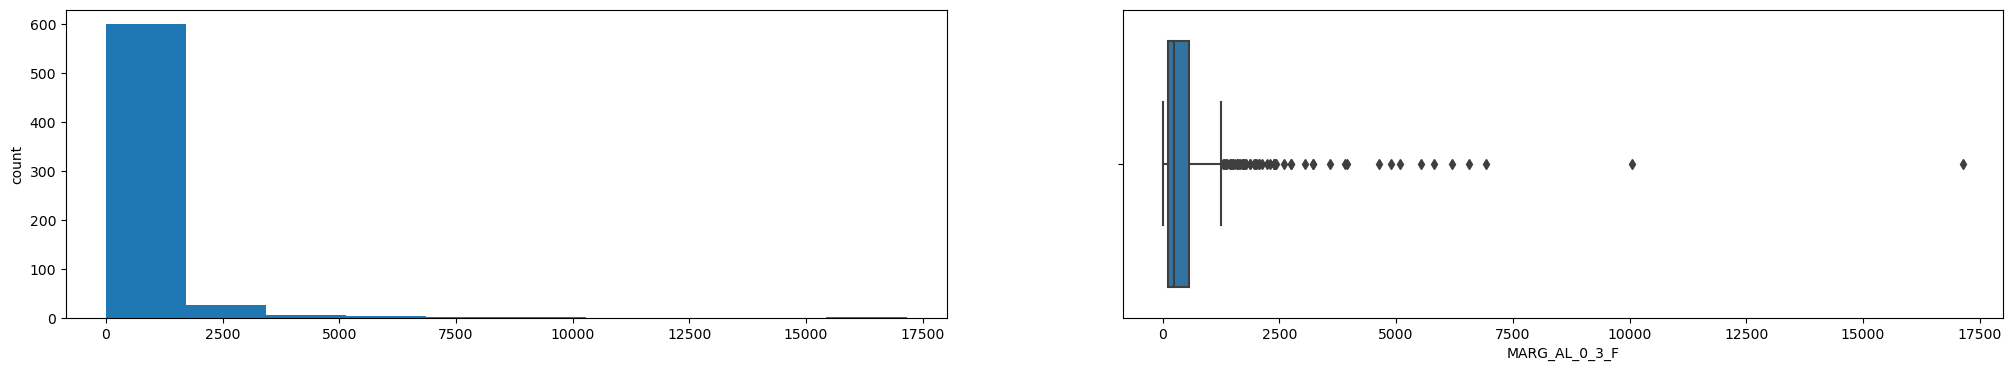

MARG_HH_0_3_M


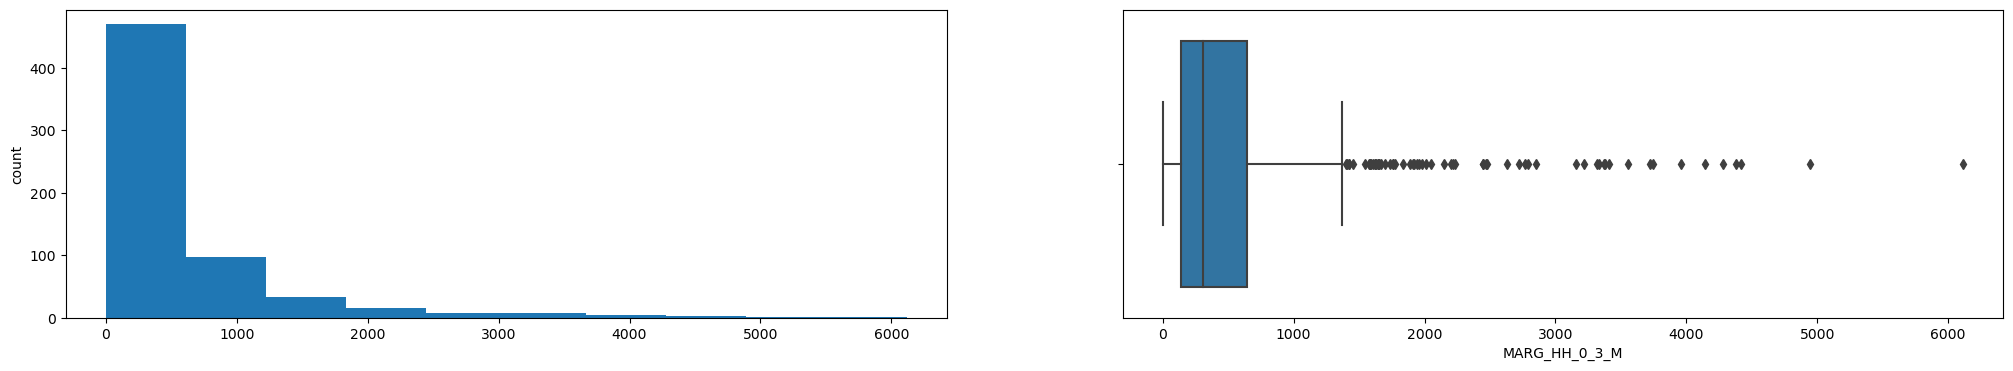

MARG_HH_0_3_F


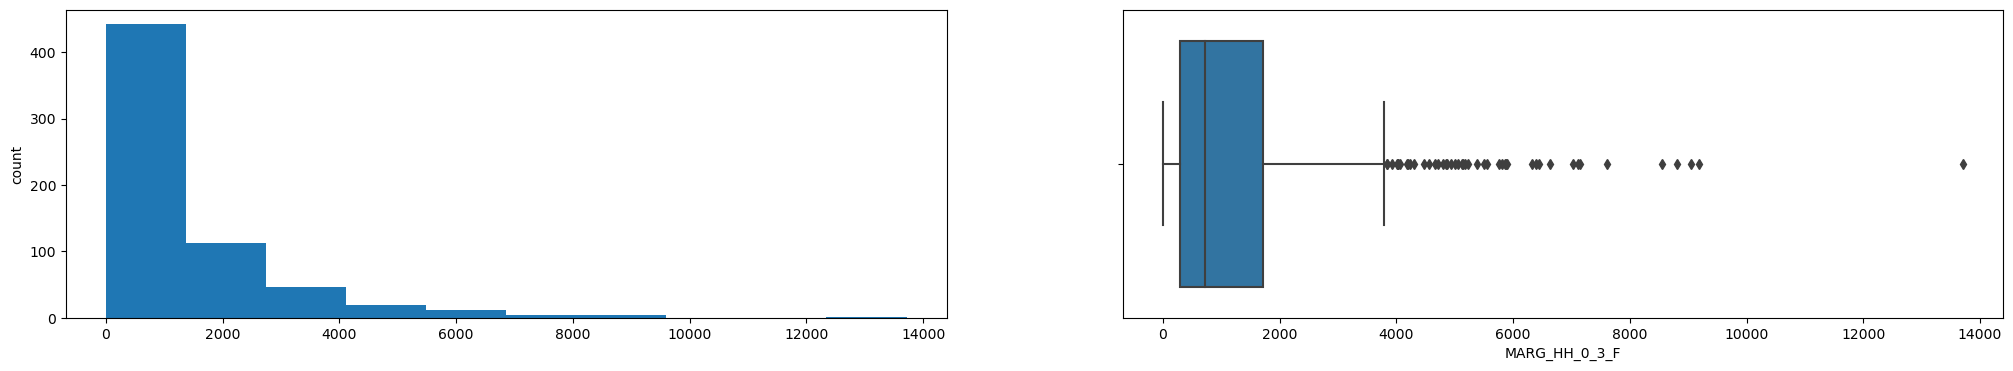

MARG_OT_0_3_M


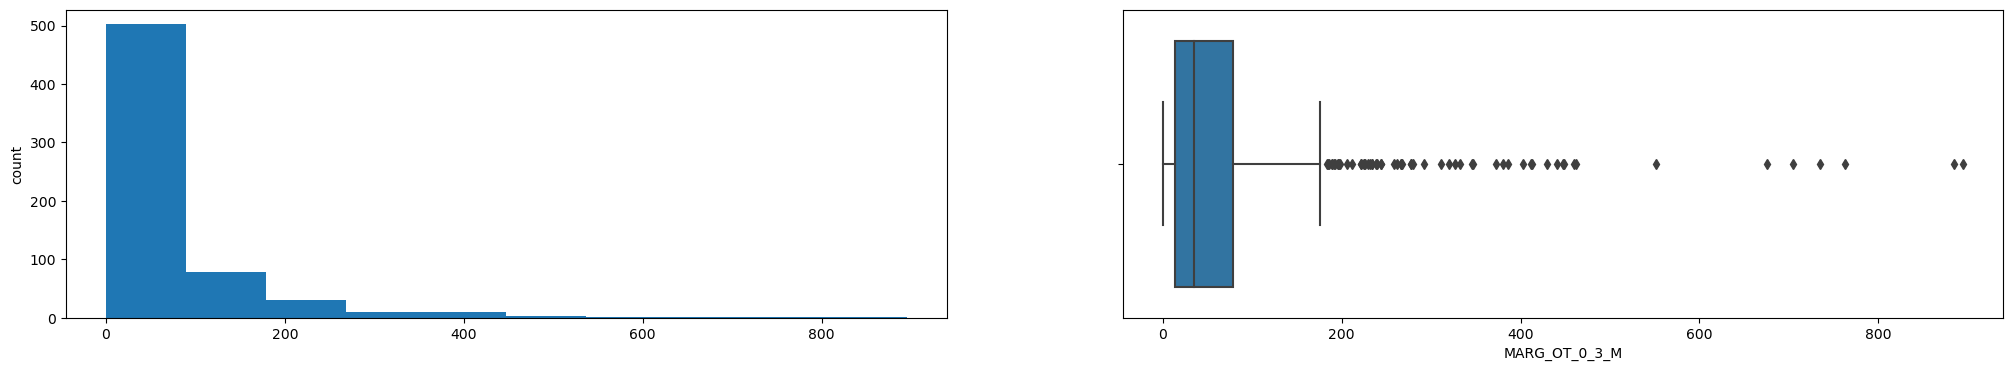

MARG_OT_0_3_F


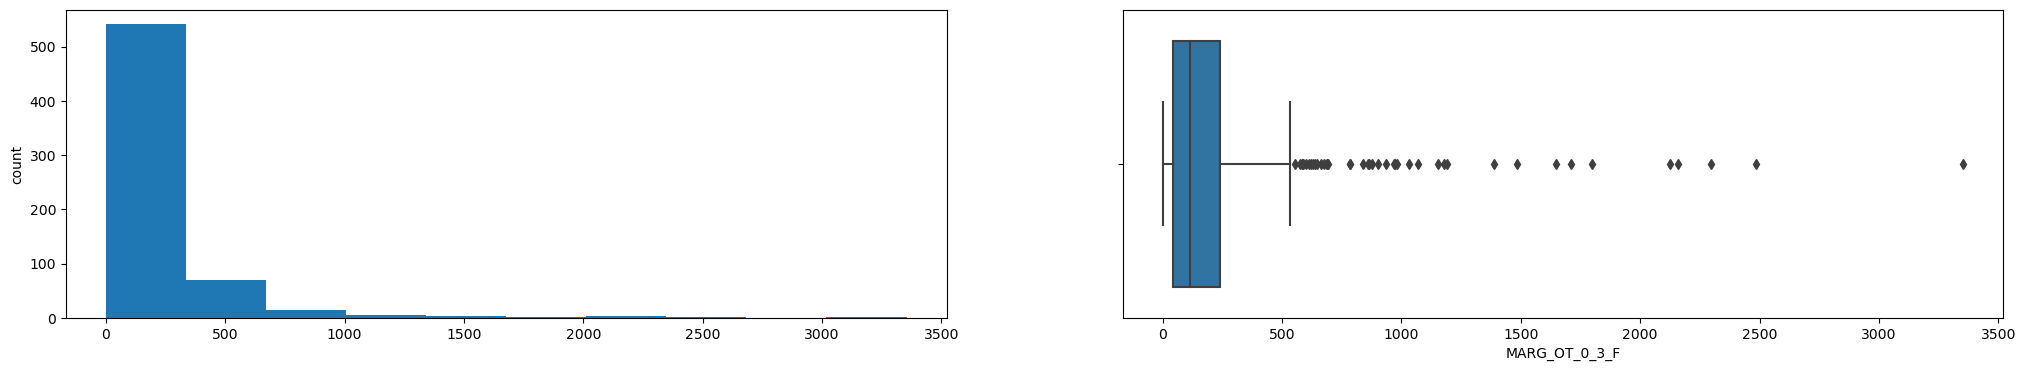

NON_WORK_M


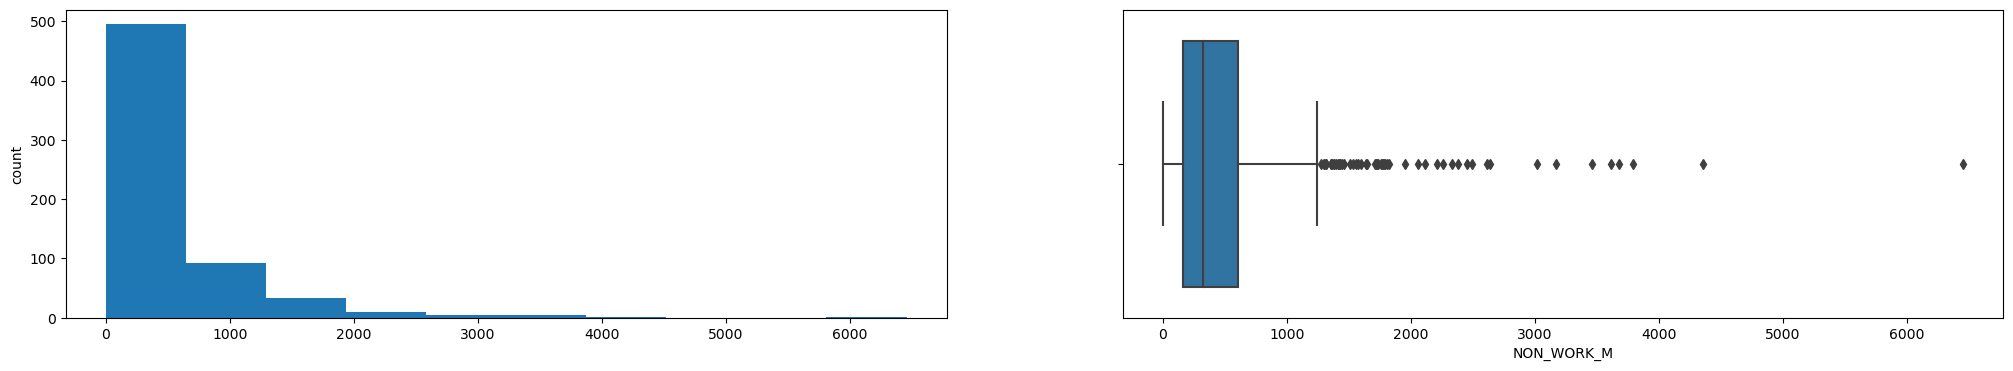

NON_WORK_F


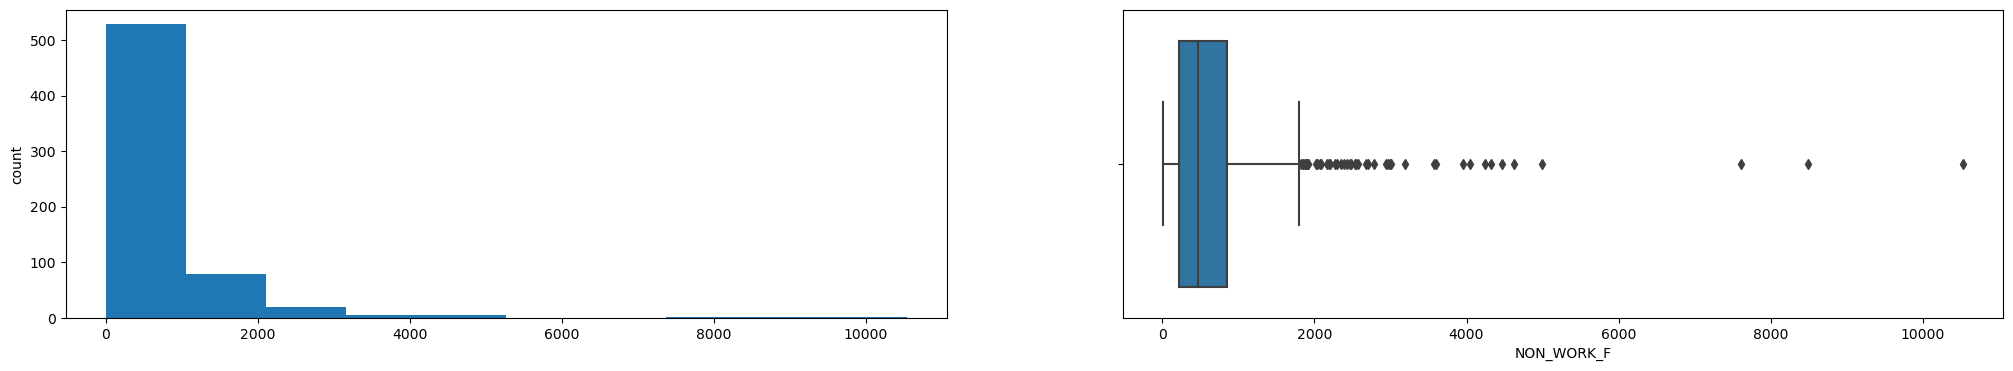

In [139]:
for col in df.columns:
    print(col)
    plt.figure(figsize=(25,4))
    plt.subplot(1,2,1)
    plt.hist(x=df[col], bins=10)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [140]:
#Boxplot technique to treat outliers
def remove_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lower range -13.5 and upper range 46.5


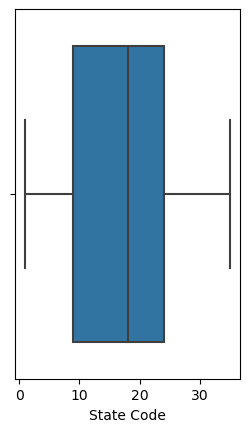

lower range -318.5 and upper range 959.5


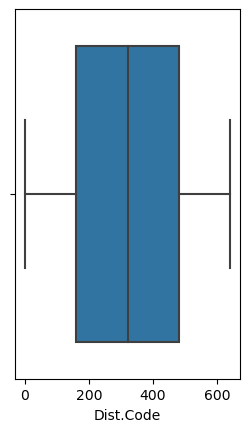

lower range -54628.0 and upper range 143004.0


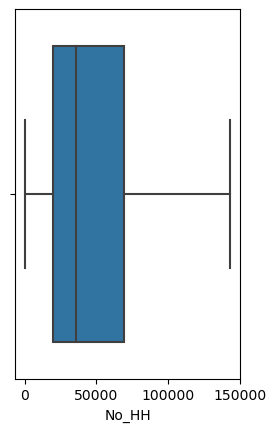

lower range -86307.75 and upper range 224454.25


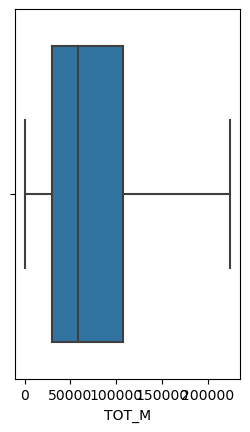

lower range -130083.25 and upper range 340852.75


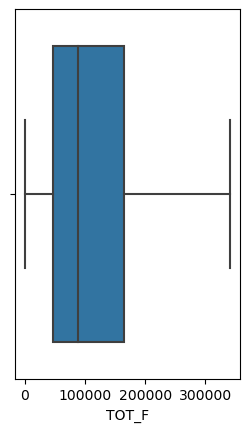

lower range -12946.0 and upper range 34200.0


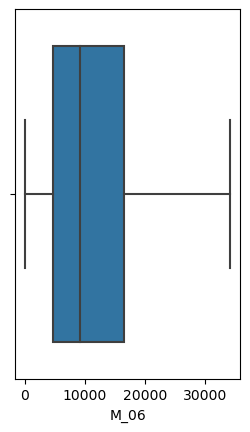

lower range -12172.75 and upper range 32747.25


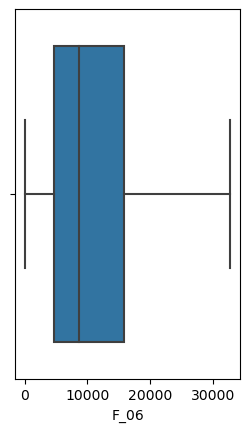

lower range -20479.0 and upper range 43375.0


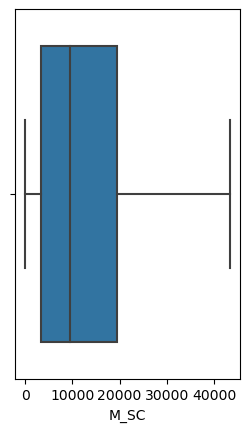

lower range -29761.875 and upper range 64545.125


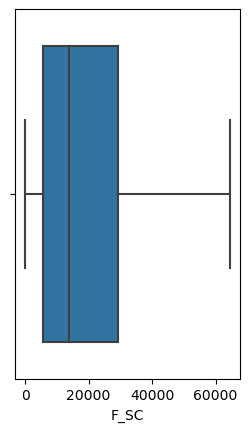

lower range -10752.625 and upper range 18704.375


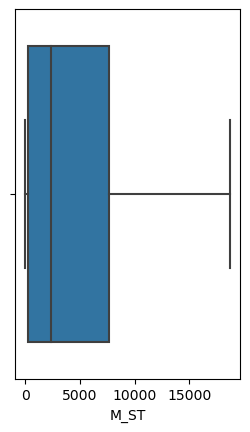

lower range -17646.625 and upper range 30556.375


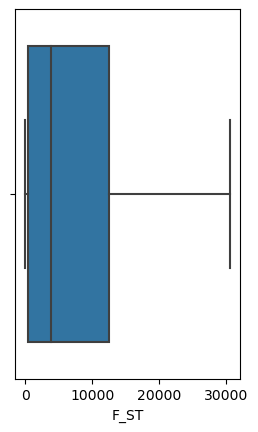

lower range -63739.25 and upper range 163026.75


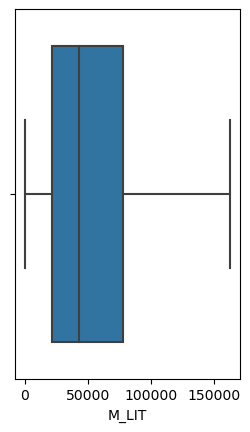

lower range -74869.625 and upper range 180601.375


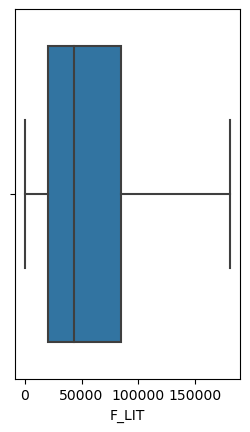

lower range -22793.75 and upper range 60896.25


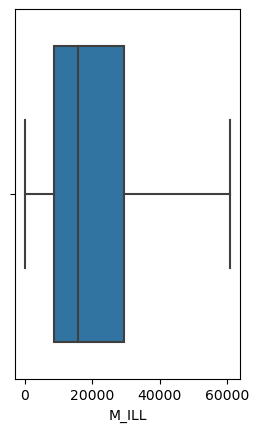

lower range -61789.0 and upper range 162627.0


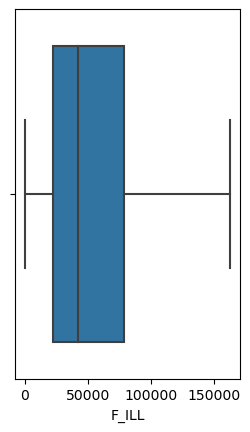

lower range -40956.375 and upper range 104936.625


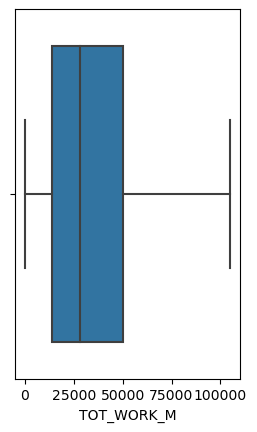

lower range -39607.0 and upper range 108939.0


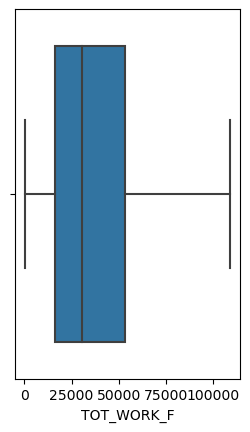

lower range -35711.0 and upper range 85617.0


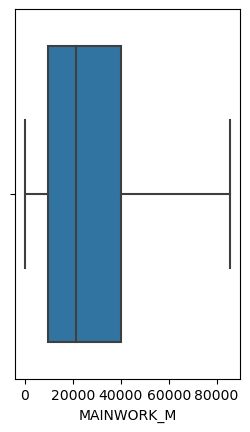

lower range -28839.25 and upper range 73404.75


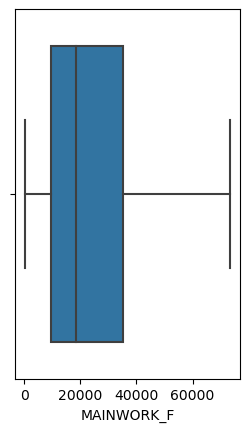

lower range -6483.75 and upper range 16202.25


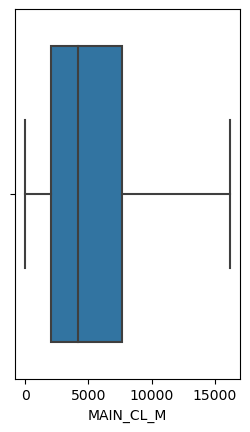

lower range -6128.75 and upper range 15335.25


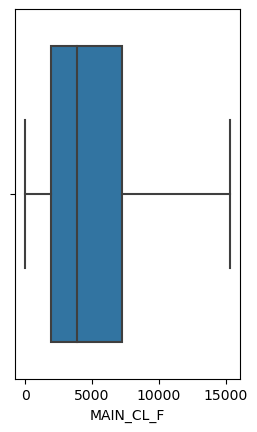

lower range -9425.25 and upper range 18562.75


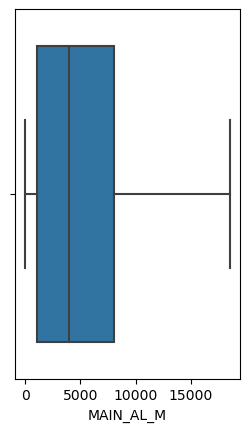

lower range -12404.375 and upper range 24430.625


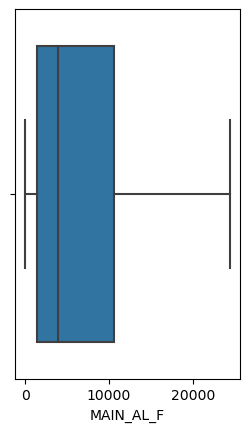

lower range -1180.125 and upper range 2466.875


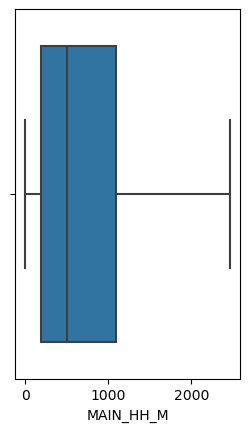

lower range -1531.75 and upper range 3216.25


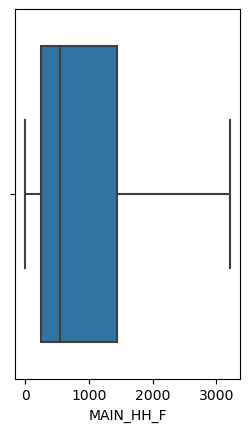

lower range -21880.5 and upper range 47127.5


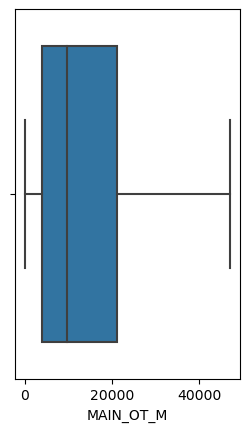

lower range -13696.125 and upper range 31206.875


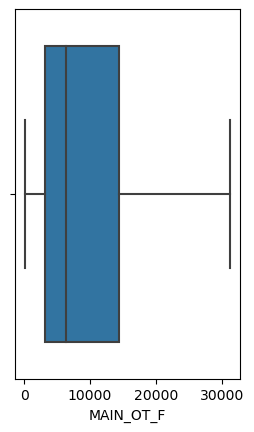

lower range -7356.625 and upper range 20094.375


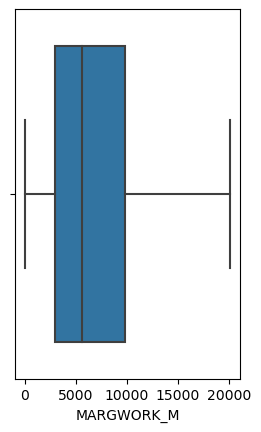

lower range -14757.625 and upper range 39061.375


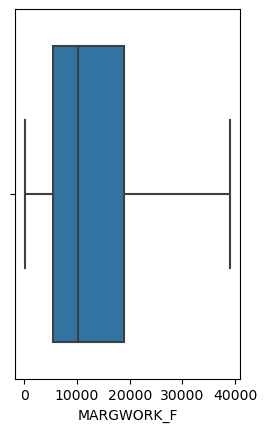

lower range -1142.125 and upper range 2734.875


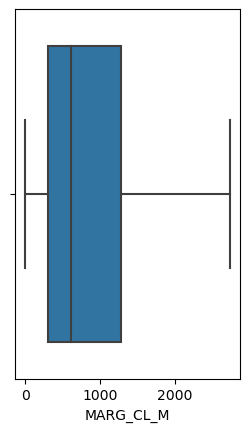

lower range -2413.25 and upper range 5702.75


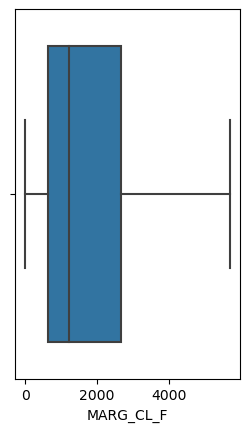

lower range -4267.375 and upper range 9441.625


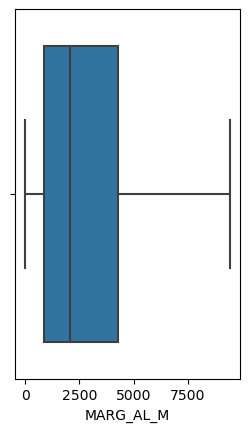

lower range -10127.625 and upper range 20619.375


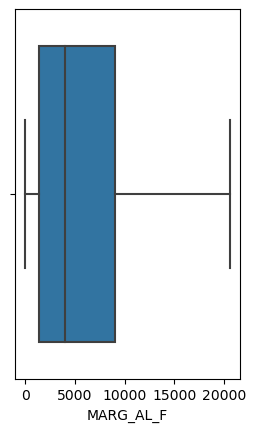

lower range -355.375 and upper range 783.625


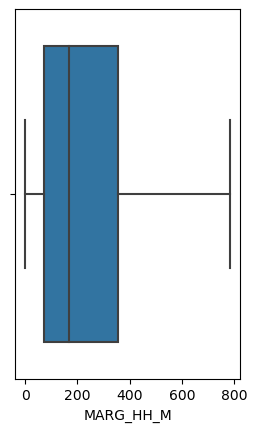

lower range -1014.375 and upper range 2148.625


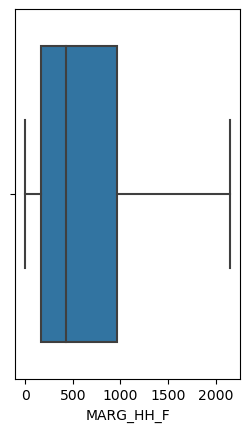

lower range -3639.125 and upper range 8559.875


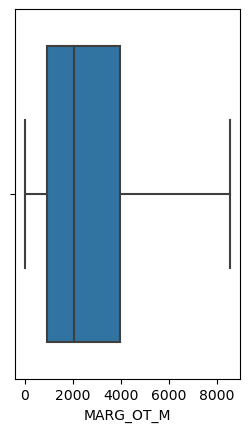

lower range -3921.375 and upper range 9393.625


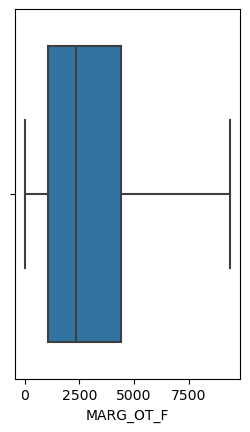

lower range -45307.5 and upper range 118734.5


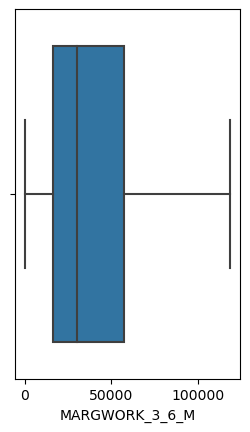

lower range -95337.25 and upper range 229880.75


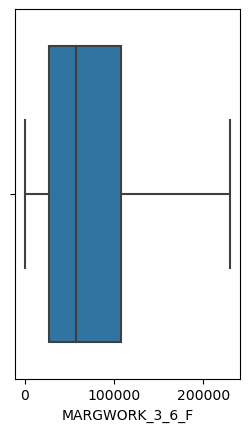

lower range -6320.5 and upper range 16859.5


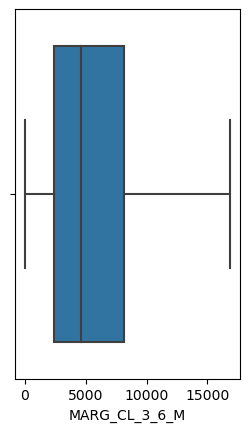

lower range -11774.25 and upper range 31227.75


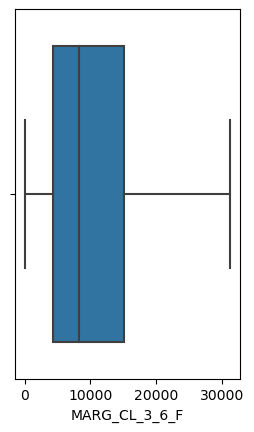

lower range -890.25 and upper range 2111.75


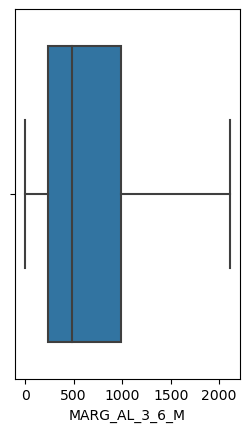

lower range -1845.375 and upper range 4401.625


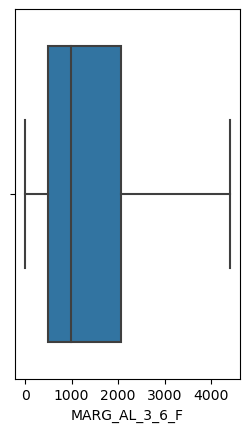

lower range -3756.5 and upper range 8177.5


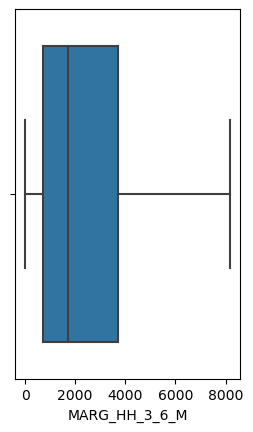

lower range -8469.0 and upper range 17085.0


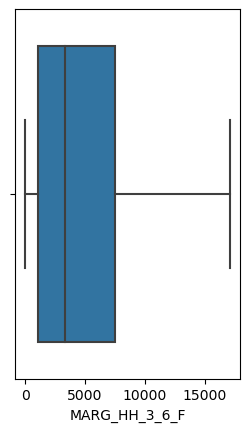

lower range -269.0 and upper range 603.0


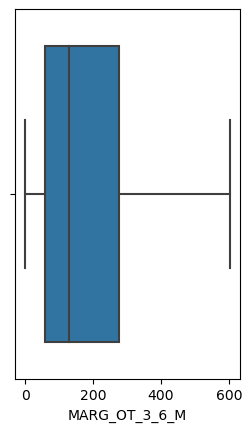

lower range -759.5 and upper range 1606.5


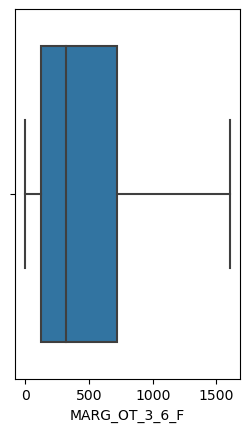

lower range -3092.875 and upper range 7168.125


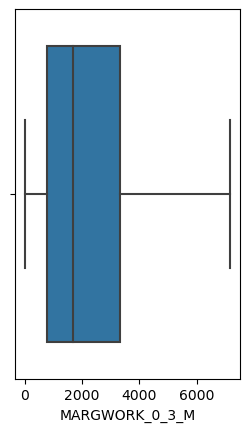

lower range -3332.0 and upper range 7776.0


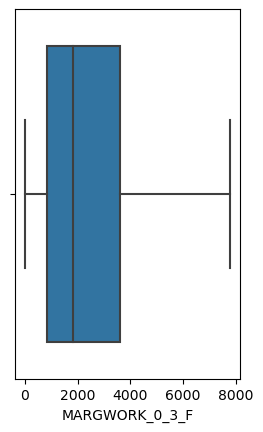

lower range -1347.25 and upper range 3550.75


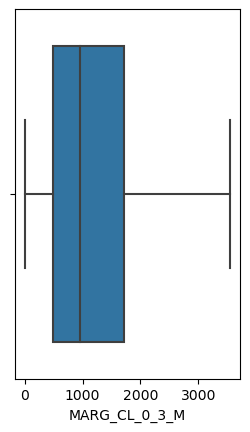

lower range -3006.5 and upper range 7563.5


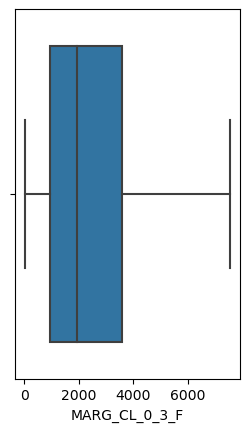

lower range -288.625 and upper range 606.375


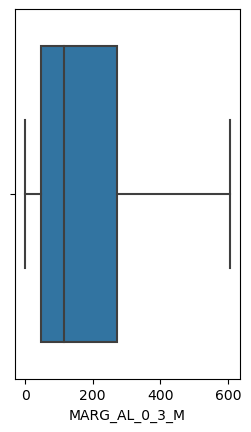

lower range -580.625 and upper range 1258.375


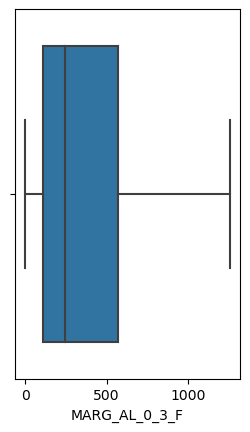

lower range -621.75 and upper range 1400.25


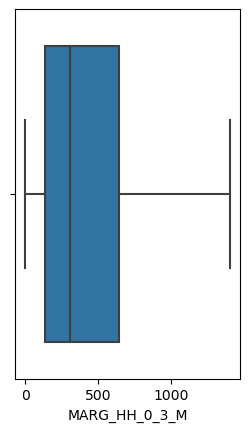

lower range -1821.125 and upper range 3829.875


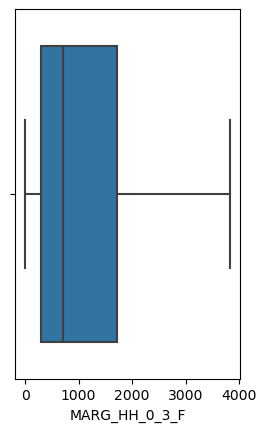

lower range -83.5 and upper range 176.5


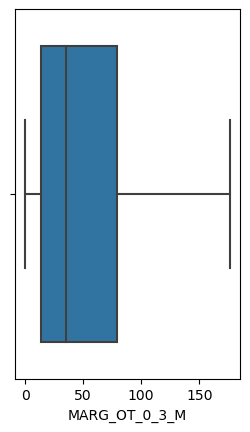

lower range -252.5 and upper range 535.5


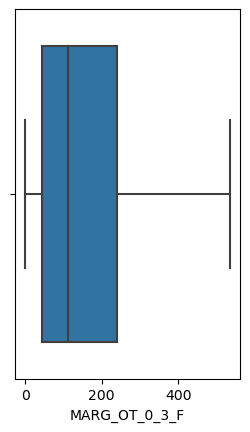

lower range -504.25 and upper range 1269.75


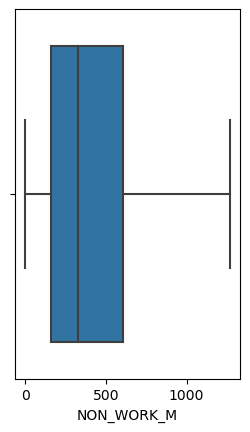

lower range -729.0 and upper range 1803.0


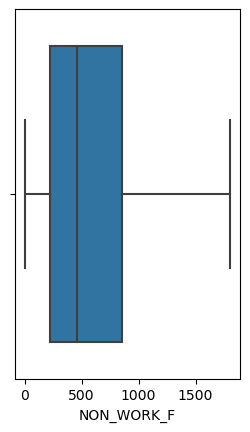

In [141]:
for col in df.columns:
    lr, ur = remove_outliers(df[col])
    print("lower range",lr, "and upper range", ur)
    df[col] = np.where(df[col]> ur,ur,df[col])
    df[col] = np.where(df[col]<lr,lr,df[col])
    plt.subplot(1,2,1)
    sns.boxplot(x=df[col])
    plt.show()

In [126]:
feature_list = df.columns
len(feature_list)

61

In [142]:
#Creating two different variable one for categorical and other for numerical.
df_num = df.select_dtypes(['int64','float64'])
df_cat = df.select_dtypes(['object'])

### Z Score scaling

In [177]:
# scaling the data
from sklearn.preprocessing import StandardScaler
X=StandardScaler()
df_scaled = X.fit_transform(df)
df_pca_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_pca_scaled.head()

State Code  Dist.Code     No_HH     TOT_M     TOT_F      M_06      F_06  \
0   -1.710782  -1.729347 -1.038986 -0.874837 -0.937027 -0.624685 -0.561282   
1   -1.710782  -1.723934 -1.076896 -0.938023 -1.009723 -0.773932 -0.835657   
2   -1.710782  -1.718521 -1.121858 -1.154665 -1.141539 -1.141642 -1.138104   
3   -1.710782  -1.713109 -1.201599 -1.217171 -1.214930 -1.197772 -1.176091   
4   -1.710782  -1.707696 -0.938495 -0.921309 -0.935018 -0.700931 -0.740523   

       M_SC      F_SC      M_ST  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  \
0 -1.080201 -1.079963 -0.510440  ...      -0.093587      -0.860882   
1 -1.079873 -1.079635 -0.771833  ...      -0.719169      -0.877096   
2 -1.080201 -1.079635  0.122588  ...      -1.130551      -1.128423   
3 -1.080447 -1.079963 -0.399531  ...      -1.050477      -1.100286   
4 -1.078807 -1.078160  0.432534  ...      -0.369844      -0.298617   

   MARG_AL_0_3_M  MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  \
0      -0.041800      -0.423378       0.523468      -0.793688      -0.443385   
1      -0.347040      -0.443790      -0.634478      -0.884805       0.358782   
2      -0.770091      -0.800999      -1.063434      -0.984684      -1.026779   
3      -0.679055      -0.701491      -1.039994      -0.970666      -0.953855   
4       1.484398       1.633130      -0.589942      -0.749882      -0.589234   

   MARG_OT_0_3_F  NON_WORK_M  NON_WORK_F  
0      -0.756991   -0.497493   -0.774865  
1       0.088391   -0.813235   -0.880662  
2      -1.025976   -1.008568   -1.074622  
3      -0.987550   -0.877454   -1.078541  
4      -0.379131   -0.706204   -0.257637  

[5 rows x 59 columns]

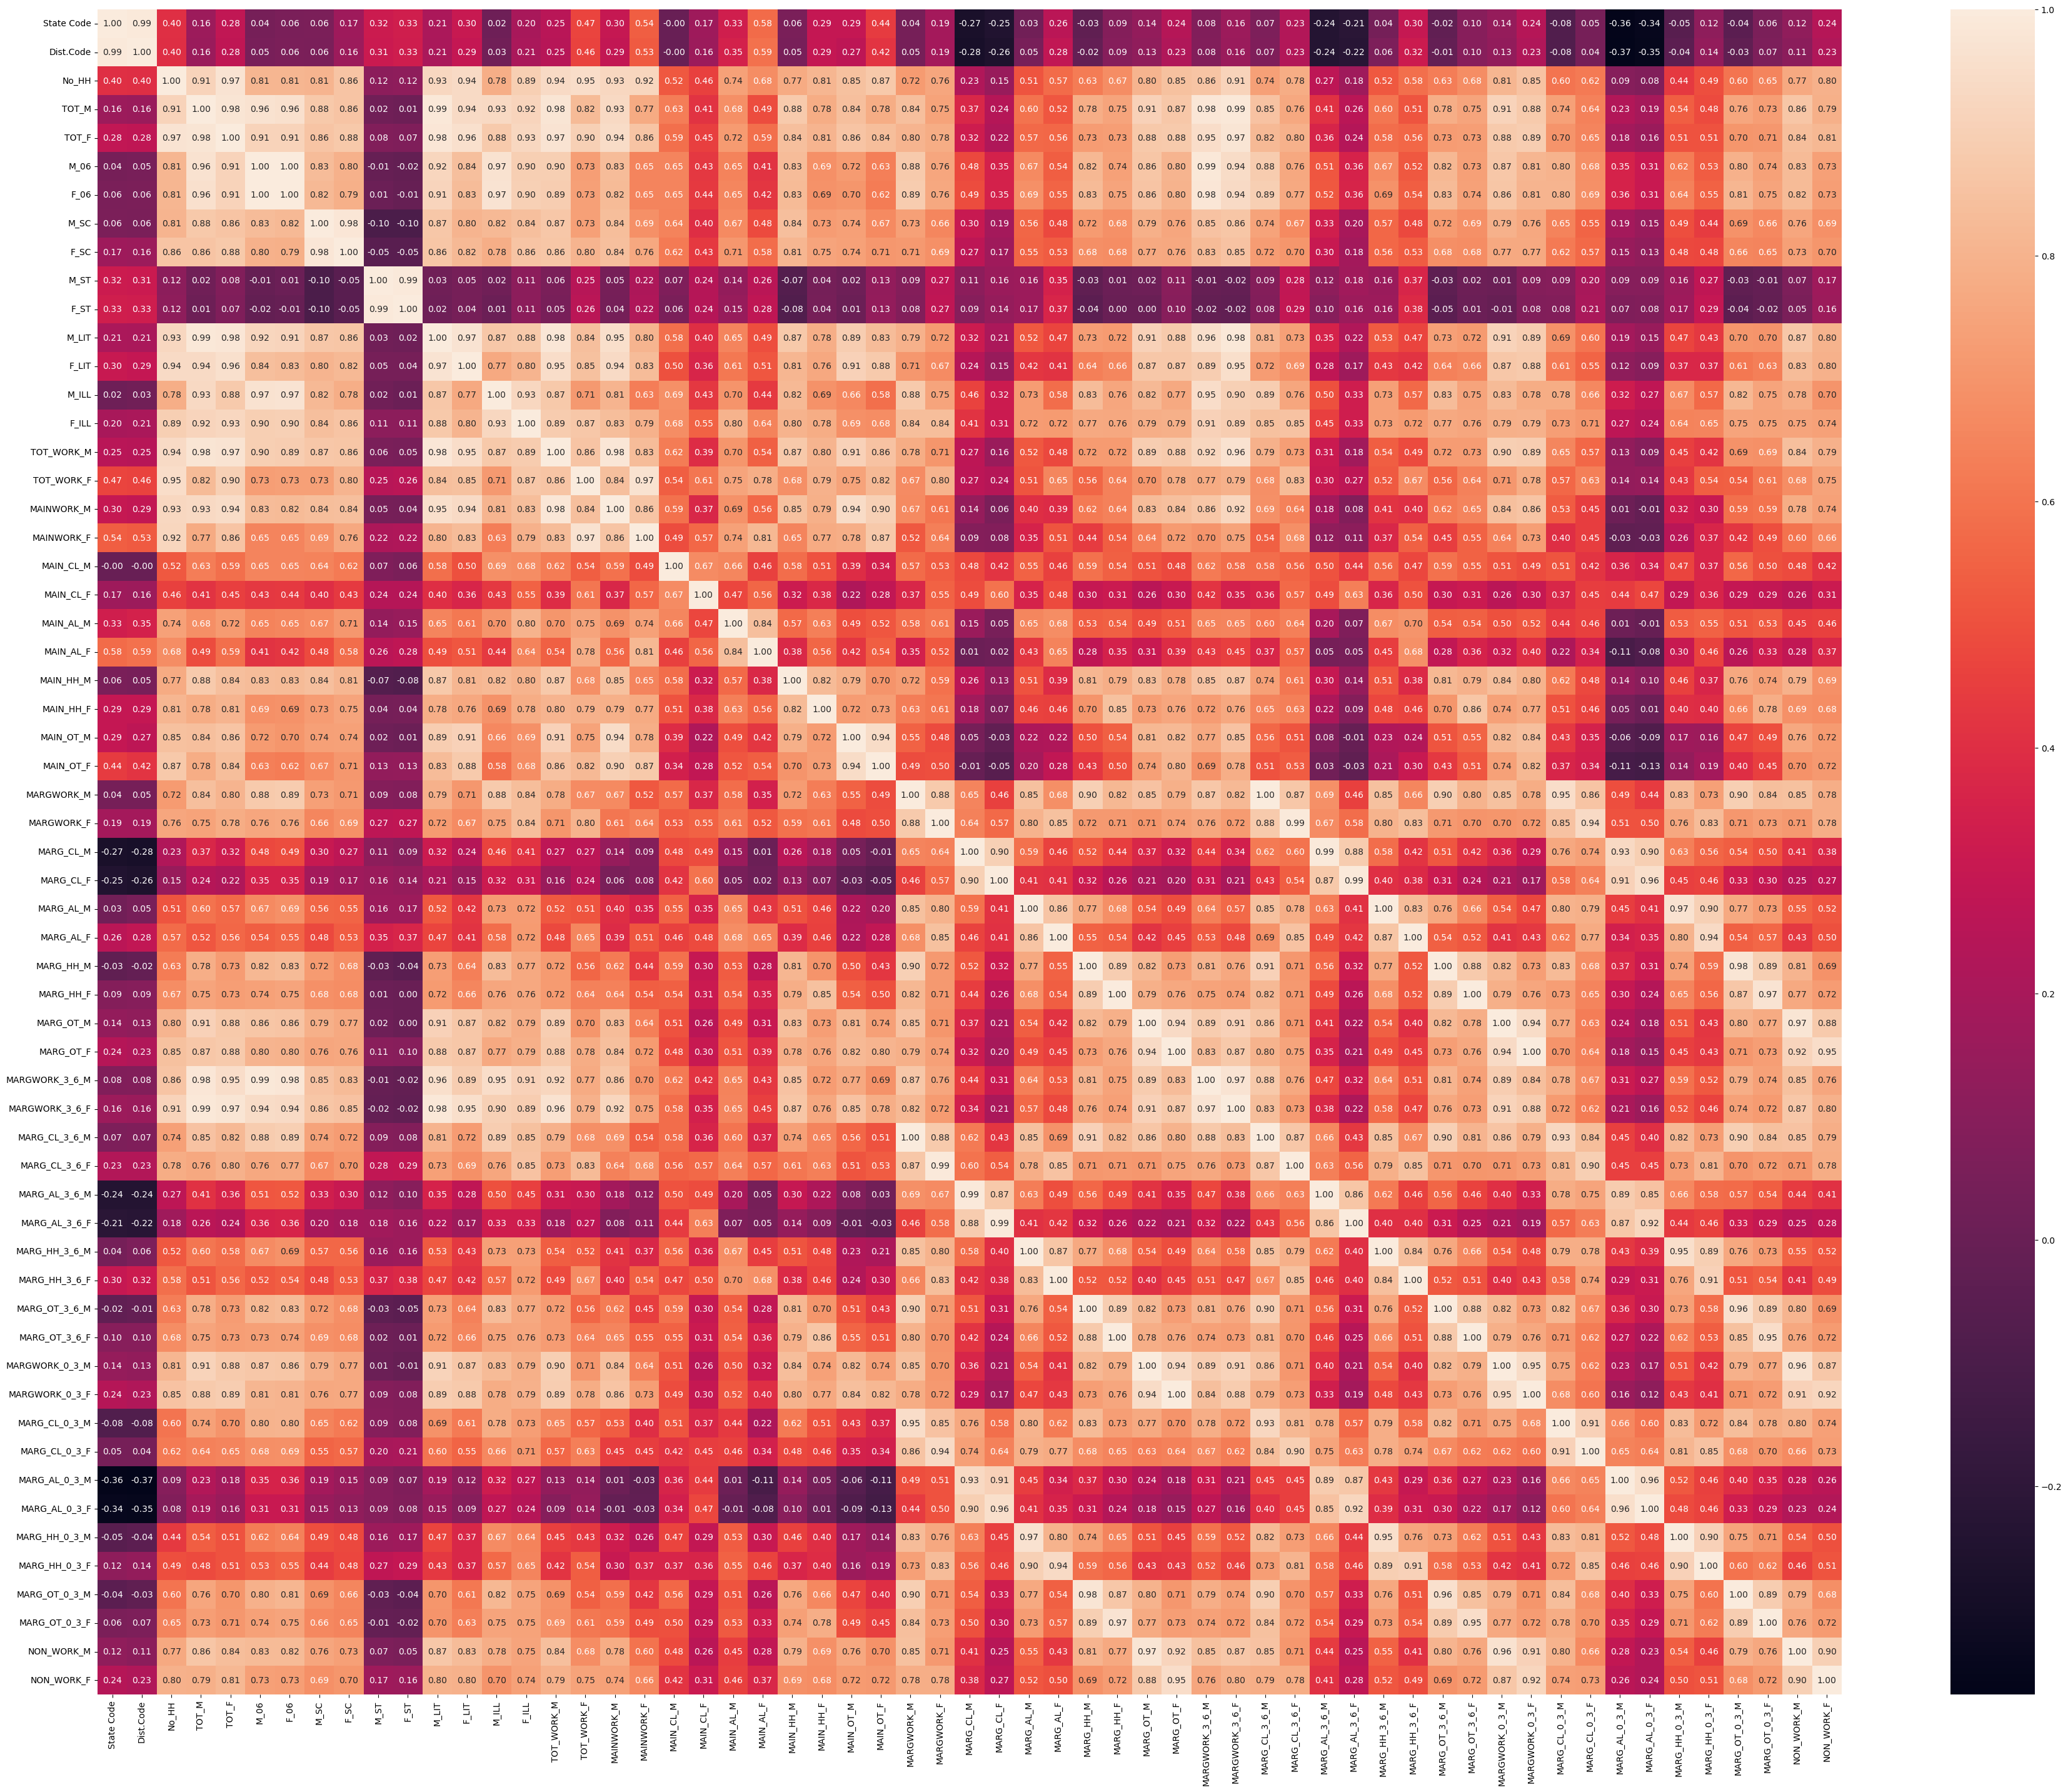

In [178]:
#Check for presence of correlations
plt.figure(figsize = (45,35))
sns.heatmap(df_pca_scaled.corr(), annot=True,fmt='.2f');

In [152]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

In [171]:
#Confirm the adequacy of sample size. 
# Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.9355078191215257

In [172]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [173]:
#Extract eigen vectors
pca.components_

array([[ 3.03688860e-02,  3.03440259e-02,  1.49578258e-01,
         1.59042954e-01,  1.58309967e-01,  1.55991131e-01,
         1.56487962e-01,  1.43090989e-01,  1.43476574e-01,
         1.93807873e-02,  1.84416462e-02,  1.55136723e-01,
         1.45628500e-01,  1.54169234e-01,  1.58234026e-01,
         1.54144405e-01,  1.43017519e-01,  1.42128725e-01,
         1.26412729e-01,  1.11367253e-01,  8.30861699e-02,
         1.19622541e-01,  9.09501914e-02,  1.41586046e-01,
         1.34077902e-01,  1.22996830e-01,  1.17394626e-01,
         1.56268593e-01,  1.48601672e-01,  8.73132497e-02,
         6.44195801e-02,  1.26949621e-01,  1.16038294e-01,
         1.44893506e-01,  1.42057716e-01,  1.50709731e-01,
         1.48056619e-01,  1.57625556e-01,  1.55717155e-01,
         1.57298763e-01,  1.49488236e-01,  9.39879280e-02,
         6.64809183e-02,  1.27883007e-01,  1.14184121e-01,
         1.44646678e-01,  1.40809965e-01,  1.50762632e-01,
         1.47581457e-01,  1.42392766e-01,  1.33439705e-0

In [174]:
#Check the eigen values

pca.explained_variance_

array([35.71084748,  7.98557733,  4.50785903,  2.77867519,  1.9747286 ,
        1.17776767,  1.13039501,  0.72210338,  0.46443167,  0.34677446,
        0.30596347,  0.26836481])

In [175]:
#Check the explained variance for each PC
## Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.60432287, 0.13513729, 0.07628501, 0.0470226 , 0.03341768,
       0.01993097, 0.0191293 , 0.01221992, 0.00785942, 0.00586835,
       0.00517772, 0.00454145])

In [179]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = df_pca_scaled.columns)

In [180]:
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
State Code      0.030369 -0.172197  0.301347  0.000705  0.150191  0.247414   
Dist.Code       0.030344 -0.169017  0.306418 -0.021726  0.134957  0.244015   
No_HH           0.149578 -0.119692  0.068243  0.079420 -0.027566 -0.030230   
TOT_M           0.159043 -0.070203 -0.059847  0.053010 -0.046639 -0.109570   
TOT_F           0.158310 -0.090756  0.002988  0.071231 -0.032287 -0.073523   
M_06            0.155991 -0.008429 -0.083250  0.027788 -0.077506 -0.139006   
F_06            0.156488 -0.003740 -0.074635  0.015675 -0.074457 -0.125977   
M_SC            0.143091 -0.065874 -0.072860  0.011447 -0.176436 -0.079702   
F_SC            0.143477 -0.079867 -0.016494  0.018471 -0.169565 -0.041946   
M_ST            0.019381  0.037398  0.306361  0.096905  0.331960 -0.134892   
F_ST            0.018442  0.034439  0.319022  0.085685  0.327077 -0.140749   
M_LIT           0.155137 -0.096793 -0.055020  0.089137 -0.017307 -0.091842   
F_LIT           0.145628 -0.127600 -0.029119  0.125514  0.026079 -0.071206   
M_ILL           0.154169  0.001441 -0.062727 -0.034341 -0.111431 -0.134860   
F_ILL           0.158234 -0.022848  0.051282 -0.007664 -0.129124 -0.046764   
TOT_WORK_M      0.154144 -0.113606 -0.031537  0.069886 -0.033220 -0.074548   
TOT_WORK_F      0.143018 -0.090170  0.159079  0.115446 -0.042729  0.062782   
MAINWORK_M      0.142129 -0.159209 -0.023820  0.101835 -0.058857 -0.069856   
MAINWORK_F      0.126413 -0.155842  0.160575  0.138102 -0.080746  0.083709   
MAIN_CL_M       0.111367  0.045694  0.010795  0.081520 -0.306660  0.122517   
MAIN_CL_F       0.083086  0.079441  0.171775  0.269795 -0.263532  0.240711   
MAIN_AL_M       0.119623 -0.065751  0.171434 -0.114340 -0.291552 -0.045482   
MAIN_AL_F       0.090950 -0.101185  0.301287 -0.012233 -0.238836  0.088973   
MAIN_HH_M       0.141586 -0.084057 -0.124719 -0.022876 -0.059709  0.060040   
MAIN_HH_F       0.134078 -0.110852 -0.000178 -0.044631 -0.021624  0.321938   
MAIN_OT_M       0.122997 -0.192289 -0.066982  0.147087  0.058316 -0.087619   
MAIN_OT_F       0.117395 -0.205368  0.026629  0.157600  0.086725 -0.024857   
MARGWORK_M      0.156269  0.082534 -0.042072 -0.080774  0.077737 -0.062608   
MARGWORK_F      0.148602  0.096149  0.116855  0.017220  0.066738 -0.030490   
MARG_CL_M       0.087313  0.272350 -0.043324  0.153502  0.018017  0.076851   
MARG_CL_F       0.064420  0.271108  0.013206  0.283131 -0.027852  0.089071   
MARG_AL_M       0.126950  0.147508  0.086998 -0.248980 -0.058694 -0.101722   
MARG_AL_F       0.116038  0.109053  0.253974 -0.148233 -0.050821 -0.093573   
MARG_HH_M       0.144894  0.052744 -0.117574 -0.171015  0.031157  0.138819   
MARG_HH_F       0.142058  0.013620 -0.073269 -0.154159  0.067467  0.332427   
MARG_OT_M       0.150710 -0.060215 -0.122757  0.017705  0.159437 -0.014788   
MARG_OT_F       0.148057 -0.081908 -0.054826  0.057996  0.192706  0.020633   
MARGWORK_3_6_M  0.157626 -0.032138 -0.080215  0.038743 -0.059470 -0.135898   
MARGWORK_3_6_F  0.155717 -0.080931 -0.077205  0.045570 -0.023061 -0.127262   
MARG_CL_3_6_M   0.157299  0.069344 -0.036820 -0.093248  0.069387 -0.060997   
MARG_CL_3_6_F   0.149488  0.075918  0.131155  0.020900  0.049892 -0.015868   
MARG_AL_3_6_M   0.093988  0.261252 -0.036173  0.128132  0.021351  0.082432   
MARG_AL_3_6_F   0.066481  0.260913  0.028120  0.291364 -0.035601  0.101310   
MARG_HH_3_6_M   0.127883  0.140403  0.092167 -0.248474 -0.071079 -0.097106   
MARG_HH_3_6_F   0.114184  0.093242  0.271141 -0.136845 -0.067241 -0.080601   
MARG_OT_3_6_M   0.144647  0.048552 -0.116912 -0.169402  0.028453  0.141586   
MARG_OT_3_6_F   0.140810  0.003398 -0.071981 -0.145102  0.063828  0.344160   
MARGWORK_0_3_M  0.150763 -0.064324 -0.123414  0.016487  0.147414 -0.011522   
MARGWORK_0_3_F  0.147581 -0.093580 -0.062493  0.058185  0.172976  0.020482   
MARG_CL_0_3_M   0.142393  0.141883 -0.063649 -0.021494  0.111892 -0.077048   
MARG_CL_0_3_F   0.133440  0.157693  0.06586

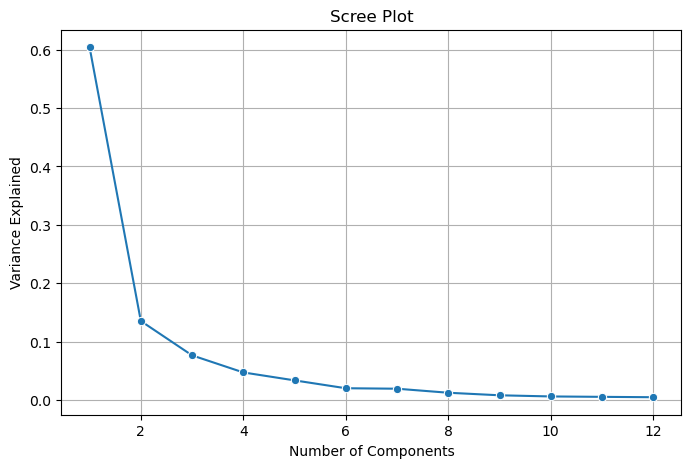

In [181]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [183]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.60432287, 0.73946015, 0.81574516, 0.86276777, 0.89618544,
       0.91611642, 0.93524572, 0.94746564, 0.95532506, 0.96119341,
       0.96637113, 0.97091258])

In [184]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5']]

In [185]:
#Check the selected PCs
df_selected

PC1       PC2       PC3       PC4       PC5
State Code      0.030369 -0.172197  0.301347  0.000705  0.150191
Dist.Code       0.030344 -0.169017  0.306418 -0.021726  0.134957
No_HH           0.149578 -0.119692  0.068243  0.079420 -0.027566
TOT_M           0.159043 -0.070203 -0.059847  0.053010 -0.046639
TOT_F           0.158310 -0.090756  0.002988  0.071231 -0.032287
M_06            0.155991 -0.008429 -0.083250  0.027788 -0.077506
F_06            0.156488 -0.003740 -0.074635  0.015675 -0.074457
M_SC            0.143091 -0.065874 -0.072860  0.011447 -0.176436
F_SC            0.143477 -0.079867 -0.016494  0.018471 -0.169565
M_ST            0.019381  0.037398  0.306361  0.096905  0.331960
F_ST            0.018442  0.034439  0.319022  0.085685  0.327077
M_LIT           0.155137 -0.096793 -0.055020  0.089137 -0.017307
F_LIT           0.145628 -0.127600 -0.029119  0.125514  0.026079
M_ILL           0.154169  0.001441 -0.062727 -0.034341 -0.111431
F_ILL           0.158234 -0.022848  0.051282 -0.007664 -0.129124
TOT_WORK_M      0.154144 -0.113606 -0.031537  0.069886 -0.033220
TOT_WORK_F      0.143018 -0.090170  0.159079  0.115446 -0.042729
MAINWORK_M      0.142129 -0.159209 -0.023820  0.101835 -0.058857
MAINWORK_F      0.126413 -0.155842  0.160575  0.138102 -0.080746
MAIN_CL_M       0.111367  0.045694  0.010795  0.081520 -0.306660
MAIN_CL_F       0.083086  0.079441  0.171775  0.269795 -0.263532
MAIN_AL_M       0.119623 -0.065751  0.171434 -0.114340 -0.291552
MAIN_AL_F       0.090950 -0.101185  0.301287 -0.012233 -0.238836
MAIN_HH_M       0.141586 -0.084057 -0.124719 -0.022876 -0.059709
MAIN_HH_F       0.134078 -0.110852 -0.000178 -0.044631 -0.021624
MAIN_OT_M       0.122997 -0.192289 -0.066982  0.147087  0.058316
MAIN_OT_F       0.117395 -0.205368  0.026629  0.157600  0.086725
MARGWORK_M      0.156269  0.082534 -0.042072 -0.080774  0.077737
MARGWORK_F      0.148602  0.096149  0.116855  0.017220  0.066738
MARG_CL_M       0.087313  0.272350 -0.043324  0.153502  0.018017
MARG_CL_F       0.064420  0.271108  0.013206  0.283131 -0.027852
MARG_AL_M       0.126950  0.147508  0.086998 -0.248980 -0.058694
MARG_AL_F       0.116038  0.109053  0.253974 -0.148233 -0.050821
MARG_HH_M       0.144894  0.052744 -0.117574 -0.171015  0.031157
MARG_HH_F       0.142058  0.013620 -0.073269 -0.154159  0.067467
MARG_OT_M       0.150710 -0.060215 -0.122757  0.017705  0.159437
MARG_OT_F       0.148057 -0.081908 -0.054826  0.057996  0.192706
MARGWORK_3_6_M  0.157626 -0.032138 -0.080215  0.038743 -0.059470
MARGWORK_3_6_F  0.155717 -0.080931 -0.077205  0.045570 -0.023061
MARG_CL_3_6_M   0.157299  0.069344 -0.036820 -0.093248  0.069387
MARG_CL_3_6_F   0.149488  0.075918  0.131155  0.020900  0.049892
MARG_AL_3_6_M   0.093988  0.261252 -0.036173  0.128132  0.021351
MARG_AL_3_6_F   0.066481  0.260913  0.028120  0.291364 -0.035601
MARG_HH_3_6_M   0.127883  0.140403  0.092167 -0.248474 -0.071079
MARG_HH_3_6_F   0.114184  0.093242  0.271141 -0.136845 -0.067241
MARG_OT_3_6_M   0.144647  0.048552 -0.116912 -0.169402  0.028453
MARG_OT_3_6_F   0.140810  0.003398 -0.071981 -0.145102  0.063828
MARGWORK_0_3_M  0.150763 -0.064324 -0.123414  0.016487  0.147414
MARGWORK_0_3_F  0.147581 -0.093580 -0.062493  0.058185  0.172976
MARG_CL_0_3_M   0.142393  0.141883 -0.063649 -0.021494  0.111892
MARG_CL_0_3_F   0.133440  0.157693  0.065860  0.005402  0.113803
MARG_AL_0_3_M   0.062021  0.285051 -0.060232  0.205191  0.016043
MARG_AL_0_3_F   0.055847  0.287935 -0.031841  0.237508 -0.005115
MARG_HH_0_3_M   0.118630  0.176164  0.053648 -0.240100  0.008914
MARG_HH_0_3_F   0.112922  0.157579  0.180037 -0.186374  0.022710
MARG_OT_0_3_M   0.141647  0.064174 -0.114917 -0.171136  0.040111
MARG_OT_0_3_F   0.141068  0.041303 -0.073507 -0.172120  0.075221
NON_WORK_M      0.147434 -0.037538 -0.112205  0.020352  0.204002
NON_WORK_F      0.142143 -0.038683 -0.017943  0.055381  0.251052

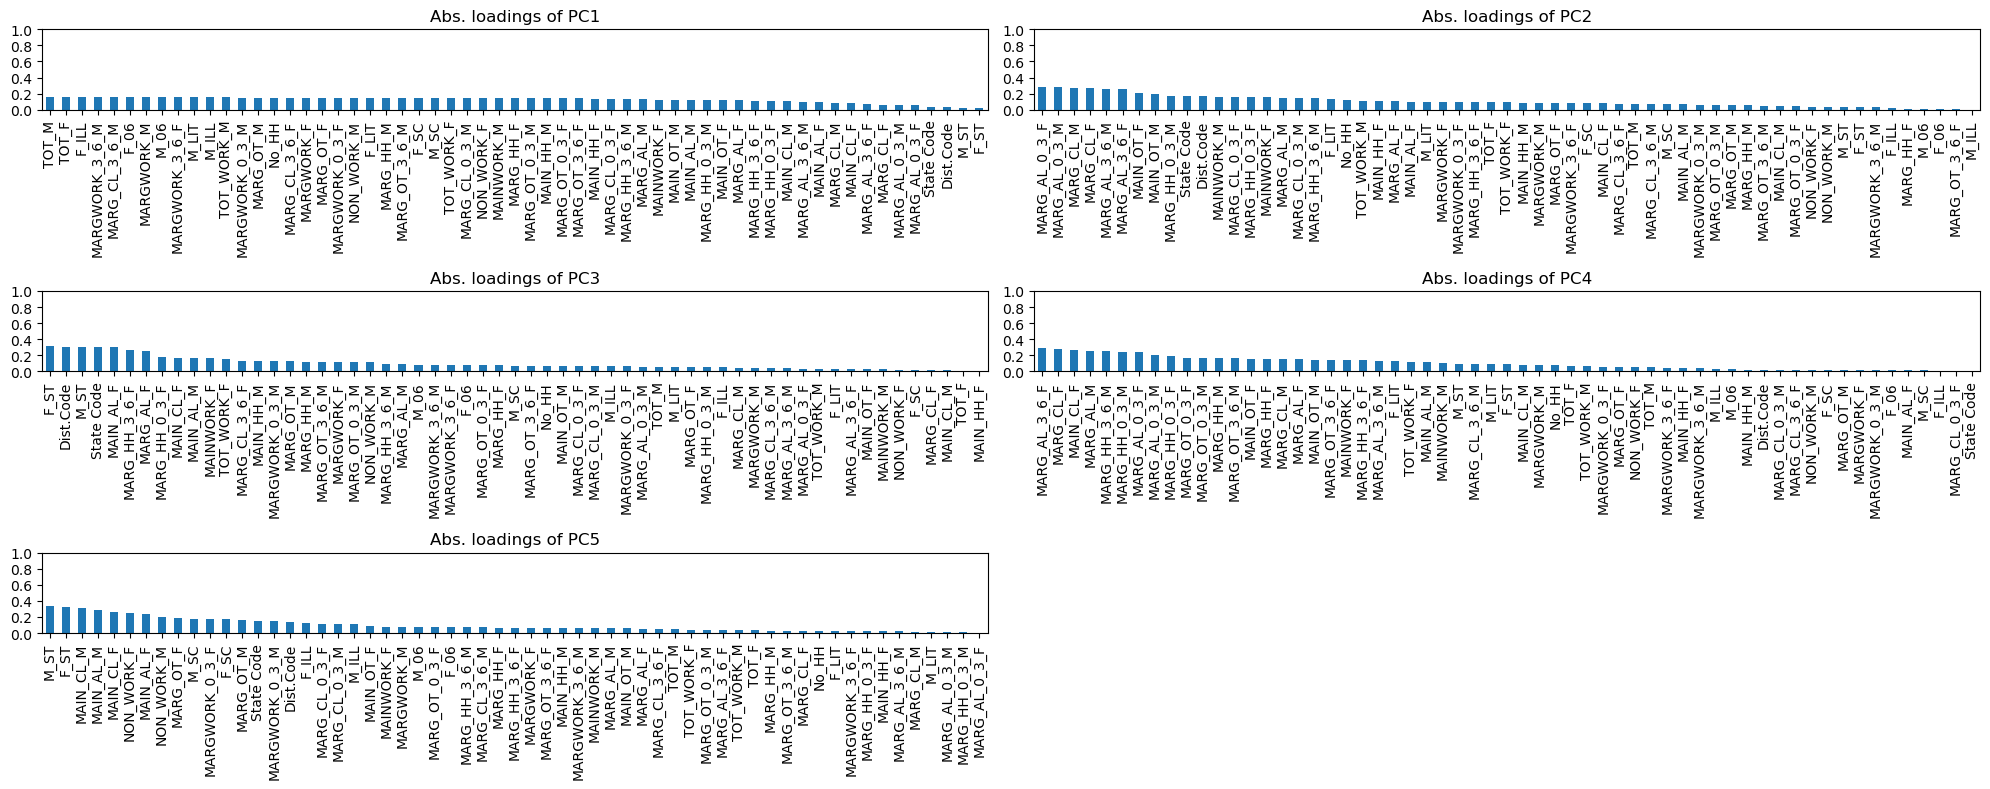

In [186]:
#The original features matter to each PC

plt.figure(figsize = (20,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

In [187]:
#The original scaled features
df_pca_scaled.iloc[0]

State Code       -1.710782
Dist.Code        -1.729347
No_HH            -1.038986
TOT_M            -0.874837
TOT_F            -0.937027
M_06             -0.624685
F_06             -0.561282
M_SC             -1.080201
F_SC             -1.079963
M_ST             -0.510440
F_ST             -0.574198
M_LIT            -0.939617
F_LIT            -0.965904
M_ILL            -0.644588
F_ILL            -0.837035
TOT_WORK_M       -1.012439
TOT_WORK_F       -1.155832
MAINWORK_M       -1.066369
MAINWORK_F       -1.124355
MAIN_CL_M        -1.144964
MAIN_CL_F        -1.180238
MAIN_AL_M        -0.948406
MAIN_AL_F        -0.898818
MAIN_HH_M        -0.917053
MAIN_HH_F        -0.895765
MAIN_OT_M        -0.923768
MAIN_OT_F        -0.989318
MARGWORK_M       -0.570019
MARGWORK_F       -1.039881
MARG_CL_M        -0.347274
MARG_CL_F        -0.759467
MARG_AL_M        -0.331878
MARG_AL_F        -0.934181
MARG_HH_M        -0.465296
MARG_HH_F        -0.661238
MARG_OT_M        -0.665594
MARG_OT_F        -0.797562
M

In [188]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-5.631179 1.054583 -2.122208 -1.281663 0.159367 

In [189]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=5, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [190]:
#Create a dataframe out of fit_transformed scaled data above

pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5
0 -5.631179  1.054583 -2.122208 -1.281663  0.159367
1 -5.594732  0.578636 -2.685313 -1.763864 -0.097387
2 -7.571692  0.296892 -1.127515  0.030012  0.133312
3 -8.016147 -0.094147 -1.561080 -0.718211 -0.084905
4 -5.281560  2.835422 -1.484287  1.051511  0.911266
5 -3.760598  5.120606 -1.602512  3.266920  1.290043
6 -6.278620  0.365406 -2.059577 -0.115730 -0.412113
7 -5.538649  0.876988 -2.310383 -1.171557  0.065324
8 -6.199632  0.628554 -2.225355 -1.544837  0.203576
9 -5.069771 -1.255059 -2.745676 -0.679534  0.361225

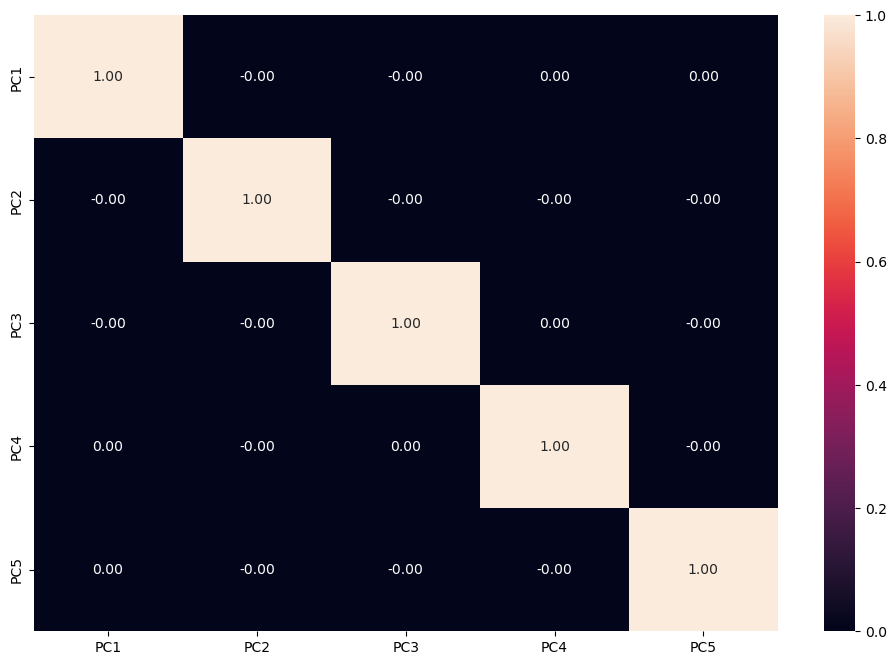

In [191]:
#Check for presence of correlations among the PCs
plt.figure(figsize = (12,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

### With help of PCA we have been able to reduce 58 numeric features into 5 components which is able to explain 90% of variance in the data. With help of reduced components, we have been able to observe some patterns. Using some rules around business context. Using the components additional rules can be derived and analysed. Unsupervised learning like clustering can further be applied on the data to segment the customers based on the components created and further analysed.